In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
warnings.filterwarnings('ignore', '.*do not.*', )
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## Análisis general

Importaciones de fertilizantes (2015-2022)

In [ ]:
importaciones = pd.read_excel("/content/drive/MyDrive/Agrobanco/Fertilizantes/importaciones 2015-2022.xlsx", parse_dates=True, index_col='Fecha')
importaciones.head()

Total  Nitrato de amonio  Sulfato de amonio       Urea
Fecha                                                                     
2015-01-31  107453.849500           10887.08       24430.514500  20142.518
2015-02-28   80187.485591               0.00       27865.295591  34887.990
2015-03-31   93405.833000               0.00        7013.950000  63697.800
2015-04-30   82563.778929           30705.66        4751.748929  32069.080
2015-05-31   63602.246120            8979.23       11672.289281  24125.110

Importaciones por año

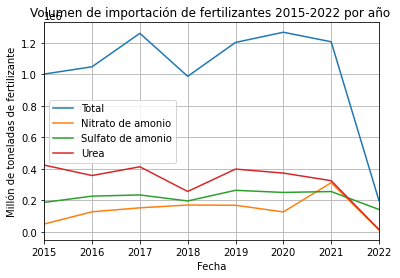

In [ ]:
importaciones.resample('Y').sum().plot(grid=True)
plt.title('Volumen de importación de fertilizantes 2015-2022 por año ')
plt.xlabel('Fecha')
plt.ylabel('Millón de toneladas de fertilizante')
plt.legend(loc ="best")
plt.show()

Importaciones por trimestre

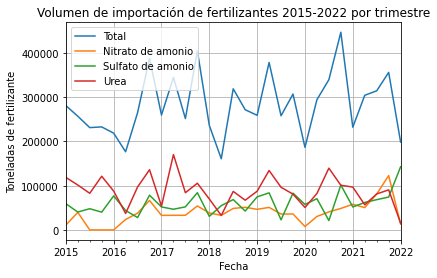

In [ ]:
importaciones.resample('Q').sum().plot(grid=True)
plt.title('Volumen de importación de fertilizantes 2015-2022 por trimestre')
plt.xlabel('Fecha')
plt.ylabel('Toneladas de fertilizante')
plt.legend(loc ="best")
plt.show()

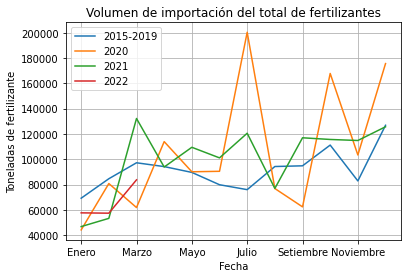

In [ ]:
importaciones_total = pd.read_excel("/content/drive/MyDrive/Agrobanco/Fertilizantes/importaciones 2015-2022.xlsx", parse_dates=True, index_col='Fecha', sheet_name='serie_total')
importaciones_total.plot(grid=True)
plt.title('Volumen de importación del total de fertilizantes')
plt.xlabel('Fecha')
plt.ylabel('Toneladas de fertilizante')
plt.show()

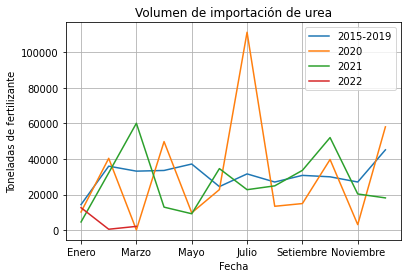

In [ ]:
importaciones_urea = pd.read_excel("/content/drive/MyDrive/Agrobanco/Fertilizantes/importaciones 2015-2022.xlsx", parse_dates=True, index_col='Fecha', sheet_name='serie_urea')
importaciones_urea.plot(grid=True)
plt.title('Volumen de importación de urea')
plt.xlabel('Fecha')
plt.ylabel('Toneladas de fertilizante')
plt.show()

### Avance de campaña (Agosto 2019 - Marzo 2022)  - ACTUAL

### **Arroz**

In [ ]:
siembra_arroz = pd.read_excel("/content/drive/MyDrive/Agrobanco/Fertilizantes/avance_campaña.xlsx", sheet_name='arroz', parse_dates=True, index_col='Fecha',  )
print(siembra_arroz.tail())

            campaña_grande  intencion_siembra  superficie_sembrada
Fecha                                                             
2022-03-31               1              26105             31716.15
2022-04-30               1              19768                  NaN
2022-05-31               1              17685                  NaN
2022-06-30               1              22565                  NaN
2022-07-31               1              20979                  NaN


In [ ]:
siembra_arroz = siembra_arroz.dropna()
from statsmodels.tsa.stattools import coint
coint(siembra_arroz['intencion_siembra'],siembra_arroz['superficie_sembrada'] )

(-5.215433851307792,
 6.487616025689404e-05,
 array([-4.28461471, -3.5403299 , -3.18409329]))

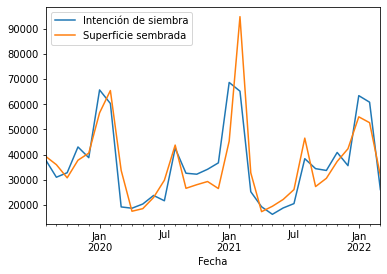

In [ ]:
siembra_arroz['intencion_siembra'].plot()
siembra_arroz['superficie_sembrada'].plot()
plt.legend(['Intención de siembra','Superficie sembrada'])
plt.show()

Correlación de la variación porcentual

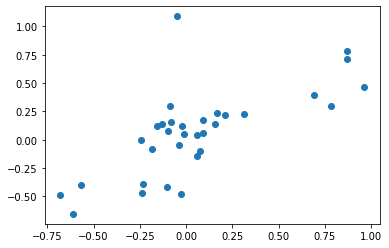


La correlación de la variación porcentual es 0.7013896461794706


In [ ]:
siembra_arroz['var_por_intencion_siembra'] = siembra_arroz['intencion_siembra'].pct_change()
siembra_arroz['var_por_superficie_sembrada'] = siembra_arroz['superficie_sembrada'].pct_change(limit=1)
plt.scatter(siembra_arroz['var_por_intencion_siembra'],siembra_arroz['var_por_superficie_sembrada'])
plt.show()

corr = siembra_arroz['var_por_intencion_siembra'].corr(siembra_arroz['var_por_superficie_sembrada'])
print('')
print(f'La correlación de la variación porcentual es {corr}')

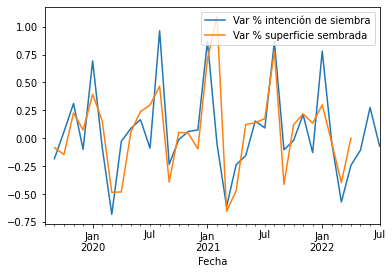

In [ ]:
siembra_arroz['var_por_intencion_siembra'].plot()
siembra_arroz['var_por_superficie_sembrada'].plot()
plt.legend(['Var % intención de siembra','Var % superficie sembrada'])
plt.show()

### **Maiz Amarillo Duro**

In [ ]:
siembra_mad = pd.read_excel("/content/drive/MyDrive/Agrobanco/Fertilizantes/avance_campaña.xlsx", sheet_name='mad', parse_dates=True, index_col='Fecha',  )
print(siembra_mad.head())

            campaña_grande  intencion_siembra  superficie_sembrada
Fecha                                                             
2019-08-31               1              27853              30144.7
2019-09-30               1              37314              38518.2
2019-10-31               1              29567              30212.5
2019-11-30               0              15223              15638.5
2019-12-31               0              13572              13670.0


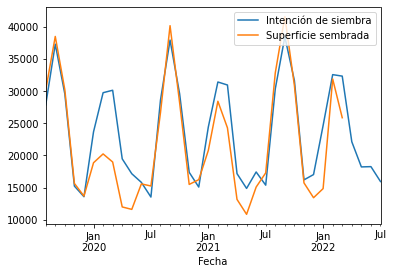

In [ ]:
siembra_mad['intencion_siembra'].plot()
siembra_mad['superficie_sembrada'].plot()
plt.legend(['Intención de siembra','Superficie sembrada'])
plt.show()

Correlación de la variación porcentual

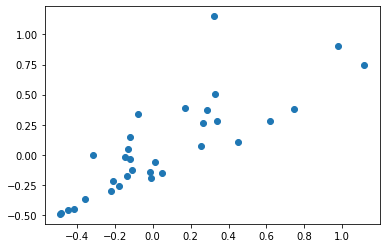


La correlación de la variación porcentual es 0.8183521815323613


In [ ]:
siembra_mad['var_por_intencion_siembra'] = siembra_mad['intencion_siembra'].pct_change()
siembra_mad['var_por_superficie_sembrada'] = siembra_mad['superficie_sembrada'].pct_change(limit=1)
plt.scatter(siembra_mad['var_por_intencion_siembra'],siembra_mad['var_por_superficie_sembrada'])
plt.show()

corr = siembra_mad['var_por_intencion_siembra'].corr(siembra_mad['var_por_superficie_sembrada'])
print('')
print(f'La correlación de la variación porcentual es {corr}')

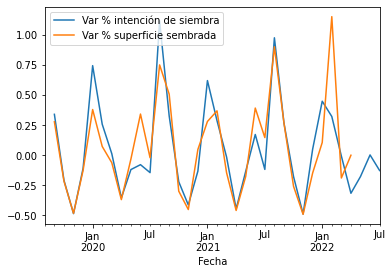

In [ ]:
siembra_mad['var_por_intencion_siembra'].plot()
siembra_mad['var_por_superficie_sembrada'].plot()
plt.legend(['Var % intención de siembra','Var % superficie sembrada'])
plt.show()

### **Papa**

In [ ]:
siembra_papa = pd.read_excel("/content/drive/MyDrive/Agrobanco/Fertilizantes/avance_campaña.xlsx", sheet_name='papa', parse_dates=True, index_col='Fecha')
print(siembra_papa.head())

            campaña_grande  intencion_siembra  superficie_sembrada
Fecha                                                             
2019-08-31               1              29054              25089.0
2019-09-30               1              53539              48792.5
2019-10-31               1              98969             102846.6
2019-11-30               0              65807              73443.0
2019-12-31               0              12580              17570.0


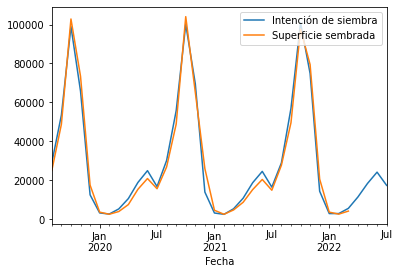

In [ ]:
siembra_papa['intencion_siembra'].plot()
siembra_papa['superficie_sembrada'].plot()
plt.legend(['Intención de siembra','Superficie sembrada'])
plt.show()

Correlación de la variación porcentual

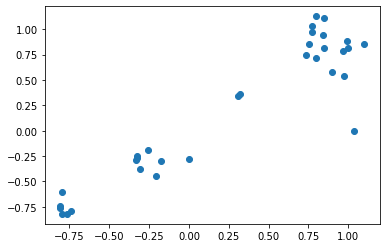


La correlación de la variación porcentual es 0.9334817483862915


In [ ]:
siembra_papa['var_por_intencion_siembra'] = siembra_papa['intencion_siembra'].pct_change()
siembra_papa['var_por_superficie_sembrada'] = siembra_papa['superficie_sembrada'].pct_change(limit=1)
plt.scatter(siembra_papa['var_por_intencion_siembra'],siembra_papa['var_por_superficie_sembrada'])
plt.show()

corr = siembra_papa['var_por_intencion_siembra'].corr(siembra_papa['var_por_superficie_sembrada'])
print('')
print(f'La correlación de la variación porcentual es {corr}')

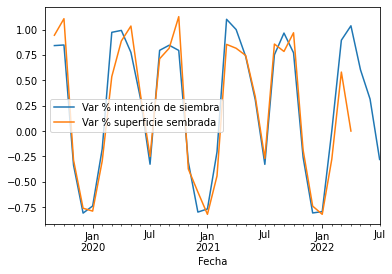

In [ ]:
siembra_papa['var_por_intencion_siembra'].plot()
siembra_papa['var_por_superficie_sembrada'].plot()
plt.legend(['Var % intención de siembra','Var % superficie sembrada'])
plt.show()

### Proyecciones de avance de campaña (De Marzo 2022 en adelante) - POTENCIAL

### **Arroz**

In [ ]:
#Añadir una constante para el modelo de regresión lineal
siembra_arroz = sm.add_constant(siembra_arroz)

#Eliminar valores nulos
siembra_arroz = siembra_arroz.dropna()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
#Modelo de regresión lineal para la variación porcentual de la superficie sembrada e intención de siembra del arroz
reg = sm.OLS(siembra_arroz['var_por_superficie_sembrada'],siembra_arroz[['const','var_por_intencion_siembra']] ).fit()
print(reg.summary())

                                 OLS Regression Results                                
Dep. Variable:     var_por_superficie_sembrada   R-squared:                       0.495
Model:                                     OLS   Adj. R-squared:                  0.478
Method:                          Least Squares   F-statistic:                     28.48
Date:                         Fri, 06 May 2022   Prob (F-statistic):           9.95e-06
Time:                                 16:14:30   Log-Likelihood:                -3.9463
No. Observations:                           31   AIC:                             11.89
Df Residuals:                               29   BIC:                             14.76
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

### **Maiz Amarillo Duro**

In [ ]:
#Añadir una constante para el modelo de regresión lineal
siembra_mad = sm.add_constant(siembra_mad)

#Eliminar valores nulos
siembra_mad = siembra_mad.dropna()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
#Modelo de regresión lineal
reg = sm.OLS(siembra_mad['var_por_superficie_sembrada'],siembra_mad[['const','var_por_intencion_siembra']] ).fit()
print(reg.summary())

                                 OLS Regression Results                                
Dep. Variable:     var_por_superficie_sembrada   R-squared:                       0.682
Model:                                     OLS   Adj. R-squared:                  0.671
Method:                          Least Squares   F-statistic:                     62.16
Date:                         Fri, 06 May 2022   Prob (F-statistic):           1.08e-08
Time:                                 16:14:38   Log-Likelihood:                 2.0718
No. Observations:                           31   AIC:                           -0.1436
Df Residuals:                               29   BIC:                             2.724
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

### **Papa**

In [ ]:
#Añadir una constante para el modelo de regresión lineal
siembra_papa = sm.add_constant(siembra_papa)

#Eliminar valores nulos
siembra_papa = siembra_papa.dropna()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
#Modelo de regresión lineal
reg = sm.OLS(siembra_papa['var_por_superficie_sembrada'],siembra_papa[['const','var_por_intencion_siembra']] ).fit()
print(reg.summary())

                                 OLS Regression Results                                
Dep. Variable:     var_por_superficie_sembrada   R-squared:                       0.935
Model:                                     OLS   Adj. R-squared:                  0.932
Method:                          Least Squares   F-statistic:                     414.4
Date:                         Fri, 06 May 2022   Prob (F-statistic):           1.02e-18
Time:                                 16:14:44   Log-Likelihood:                 10.211
No. Observations:                           31   AIC:                            -16.42
Df Residuals:                               29   BIC:                            -13.55
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

### Modelos Autoregresivos

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd
from itertools import product
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### AUTO ARIMA

### Arroz: 

Producción

In [ ]:
! pip install pmdarima

     |████████████████████████████████| 1.4 MB 5.2 MB/s 
     |████████████████████████████████| 9.8 MB 39.7 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from pmdarima.arima import auto_arima
from sklearn.model_selection import train_test_split

In [ ]:
arroz = pd.read_excel("/content/drive/MyDrive/Agrobanco/Fertilizantes/cultivos 2015-2022_drive.xlsx", parse_dates=True, index_col='fecha', sheet_name='arroz')
#arroz.drop(columns=['intencion_siembra','superficie_sembrada'], inplace=True)
arroz.dropna(inplace=True)
arroz.tail()

produccion  sup_cosechada  rendimiento  precio_chacra  \
fecha                                                               
2021-11-30  151290.420        21952.4     6.891749       1.039436   
2021-12-31  329898.530        40734.0     8.098849       1.212339   
2022-01-31  203108.432        26830.0     7.570199       1.263330   
2022-02-28  190486.280        24034.0     7.925700       1.172837   
2022-03-31  269387.619        28156.0     9.567681       1.196148   

            camp_grande  intencion_siembra  superficie_sembrada   colocacion  \
fecha                                                                          
2021-11-30            1            40852.0             37286.50  10180025.32   
2021-12-31            1            35605.0             42326.50  11571268.24   
2022-01-31            1            63412.0             54994.00  13059172.80   
2022-02-28            1            60812.0             52677.30  16634713.23   
2022-03-31            1            26105.0             31716.15  18731571.41   

            provision    interes  tipo_cambio  fertil_importacion  \
fecha                                                               
2021-11-30  351001.09   77396.46       4.0538       103379.531000   
2021-12-31  355786.80  199726.78       3.9852       175380.944000   
2022-01-31  300158.01  267531.87       3.8370        57584.662206   
2022-02-28  391849.05  112032.93       3.7730        57323.496000   
2022-03-31  403213.25  116669.47       3.6760        83691.735500   

            urea_importacion  nitrato_importaciones  sulf_importacion   
fecha                                                                   
2021-11-30         20340.780              41365.280          16368.991  
2021-12-31         18137.200              59836.440          25993.802  
2022-01-31         12634.890               1010.000          31217.990  
2022-02-28           528.650                  0.025          46381.100  
2022-03-31          2135.441              11929.880          65133.850

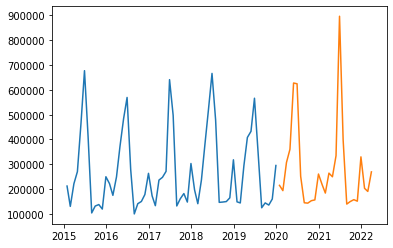

In [ ]:
#Dividimos en test de entrenamiento y validación
train, test = train_test_split(arroz['produccion'], shuffle=False, test_size=0.3)
plt.plot(train)
plt.plot(test)

In [ ]:
arroz['superficie_sembrada'].head()

fecha
2019-08-31    39332.1
2019-09-30    36002.0
2019-10-31    30776.6
2019-11-30    37773.5
2019-12-31    40581.4
Name: superficie_sembrada, dtype: float64

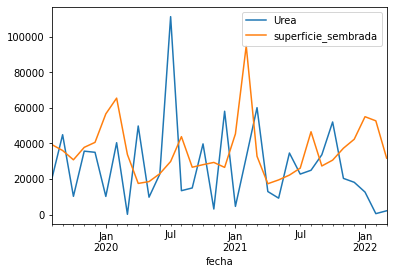

In [ ]:
#Pruebita
importaciones['Urea']['2019-08-31':'2022-03-31'].plot()
arroz['superficie_sembrada'].dropna().plot()
plt.legend()

In [ ]:
arima_model = auto_arima(train, start_p=0, d=1, start_q=0, max_p=12, max_d=4, max_q=4, start_P=0, D=1, start_Q=0, max_P=4, max_D=4,max_Q=4, m=12, seasonal=True, error_action='warn', trace=True, supress_warnings=True, stepwise=True,random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1205.269, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1194.752, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1194.223, Time=0.13 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1204.704, Time=0.04 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1195.874, Time=0.24 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1195.719, Time=0.40 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1194.913, Time=0.12 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=1197.688, Time=0.60 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1198.460, Time=0.10 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1192.767, Time=0.21 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1201.402, Time=0.09 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=1194.322, Time=0.37 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=1194.214, Time=1.00 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=1192.940, Time=0.84 sec
 ARIMA(1,1,1)(1,1,2

In [ ]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   60
Model:             SARIMAX(2, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -586.873
Date:                            Wed, 11 May 2022   AIC                           1183.746
Time:                                    20:59:14   BIC                           1192.997
Sample:                                         0   HQIC                          1187.227
                                             - 60                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3629      0.310      1.170      0.242      -0.245       0.971
ar.L2         -0.4009      0.215     -1.868      0.062      -0.821       0.020
ma.L1         -0.5920      0.271     -2.188      0.029      -1.122      -0.062
ma.S.L12      -0.3946      0.168     -2.347      0.019      -0.724      -0.065
sigma2      5.386e+09   7.74e-12   6.96e+20      0.000    5.39e+09    5.39e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 8.06
Prob(Q):                              0.83   Prob(JB):                         0.02
Heteroskedasticity (H):               0.50   Skew:                             0.77
Prob(H) (two-sided):                  0.17   Kurtosis:                         4.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.8e+37. Standard errors may be unstable.
"""

In [ ]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 27),index=test.index)
prediction.columns = ['pred_produccion']
prediction

pred_produccion
fecha                      
2020-01-31    150447.957781
2020-02-29    127300.505510
2020-03-31    258937.505752
2020-04-30    370151.337803
2020-05-31    427731.649218
2020-06-30    583299.362595
2020-07-31    377800.230694
2020-08-31    117523.372462
2020-09-30    134432.070800
2020-10-31    131985.805292
2020-11-30    147923.867465
2020-12-31    286455.618215
2021-01-31    145941.990243
2021-02-28    122935.158498
2021-03-31    252970.373032
2021-04-30    363546.497779
2021-05-31    421537.533435
2021-06-30    577509.970555
2021-07-31    371993.062090
2021-08-31    111547.496058
2021-09-30    128402.092470
2021-10-31    126003.827878
2021-11-30    141981.000682
2021-12-31    280507.701887
2022-01-31    139976.561609
2022-02-28    116965.398564
2022-03-31    247006.061941

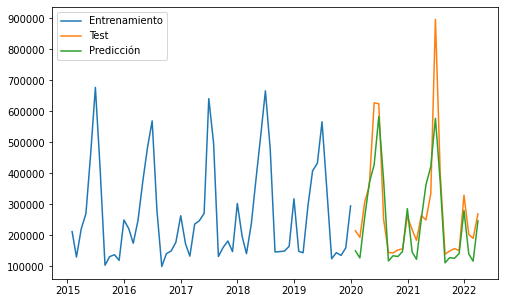

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(train,label="Entrenamiento")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicción")
plt.legend()
plt.show()

In [ ]:
def mape ( actual , pred ):
    actual, pred = np.array (actual), np.array (pred)
    return np.mean (np.abs ((actual - pred) / actual)) * 100

In [ ]:
#Calcular indicadores del modelo

#Error cuadrático medio (RMSE)
from sklearn.metrics import mean_squared_error
rms = mean_squared_error(test, prediction, squared=False)
print('Error cuadrático medio (RMSE)', rms)

#Error absoluto medio (MAE)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test, prediction)
print('Error absoluto medio (MAE)', mae)

#Porcentaje de error absoluto medio (MAPE)
mape = mape(test, prediction)*100
print('Porcentaje de error absoluto medio (MAPE)', mape)

#R2 Score
from sklearn.metrics import r2_score
r2 = r2_score(test, prediction)
print('R2 Score', r2)

Error cuadrático medio (RMSE) 89763.74164643852
Error absoluto medio (MAE) 60659.58201997611
Porcentaje de error absoluto medio (MAPE) 6028.594185067839
R2 Score 0.7361353799331303


In [ ]:
from sklearn.metrics import r2_score
r2_score(test, prediction)

0.7361353799331303

Rendimiento

In [ ]:
arroz = pd.read_excel("/content/drive/MyDrive/Agrobanco/Fertilizantes/cultivos 2015-2022.xlsx", parse_dates=True, index_col='fecha', sheet_name='arroz')
arroz.drop(columns=['intencion_siembra','superficie_sembrada'], inplace=True)
arroz.dropna(inplace=True)
arroz.tail()

produccion  sup_cosechada  rendimiento  precio_chacra  \
fecha                                                               
2021-11-30  151290.420        21952.4     6.891749       1.039436   
2021-12-31  329898.530        40734.0     8.098849       1.212339   
2022-01-31  203108.432        26830.0     7.570199       1.263330   
2022-02-28  190486.280        24034.0     7.925700       1.172837   
2022-03-31  269387.619        28156.0     9.567681       1.196148   

            camp_grande   colocacion  provision    interes  tipo_cambio  \
fecha                                                                     
2021-11-30            1  10180025.32  351001.09   77396.46       4.0538   
2021-12-31            1  11571268.24  355786.80  199726.78       3.9852   
2022-01-31            1  13059172.80  300158.01  267531.87       3.8370   
2022-02-28            1  16634713.23  391849.05  112032.93       3.7730   
2022-03-31            1  18731571.41  403213.25  116669.47       3.6760   

            fertil_importacion  urea_importacion  nitrato_importaciones  \
fecha                                                                     
2021-11-30       103379.531000         20340.780              41365.280   
2021-12-31       175380.944000         18137.200              59836.440   
2022-01-31        57584.662206         12634.890               1010.000   
2022-02-28        57323.496000           528.650                  0.025   
2022-03-31        83691.735500          2135.441              11929.880   

            sulf_importacion   
fecha                          
2021-11-30          16368.991  
2021-12-31          25993.802  
2022-01-31          31217.990  
2022-02-28          46381.100  
2022-03-31          65133.850

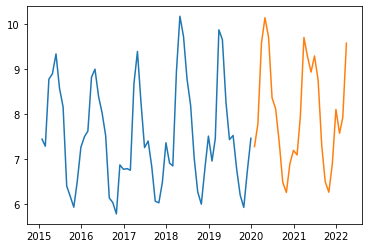

In [ ]:
#Dividimos en test de entrenamiento y validación
train, test = train_test_split(arroz['rendimiento'], shuffle=False, test_size=0.3)
plt.plot(train)
plt.plot(test)

In [ ]:
arima_model = auto_arima(train, start_p=0, d=1, start_q=0, max_p=12, max_d=4, max_q=4, start_P=0, D=1, start_Q=0, max_P=4, max_D=4,max_Q=4, m=12, seasonal=True, error_action='warn', trace=True, supress_warnings=True, stepwise=True,random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=75.907, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=72.745, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=72.066, Time=0.15 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=77.894, Time=0.03 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=73.787, Time=0.28 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=73.447, Time=0.40 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=72.691, Time=0.08 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=2.10 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=70.156, Time=0.08 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=71.933, Time=0.21 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=71.737, Time=0.25 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=70.794, Time=0.06 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=1.32 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=72.119, Time=0.13 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=

In [ ]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   60
Model:             SARIMAX(0, 1, 0)x(0, 1, [1], 12)   Log Likelihood                 -33.078
Date:                              Wed, 11 May 2022   AIC                             70.156
Time:                                      21:07:37   BIC                             73.856
Sample:                                           0   HQIC                            71.548
                                               - 60                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.4950      0.170     -2.920      0.004      -0.827      -0.163
sigma2         0.2227      0.055      4.050      0.000       0.115       0.331
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 1.40
Prob(Q):                              0.82   Prob(JB):                         0.50
Heteroskedasticity (H):               0.82   Skew:                            -0.36
Prob(H) (two-sided):                  0.70   Kurtosis:                         2.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 27),index=test.index)
prediction.columns = ['pred_rendimiento']
prediction

pred_rendimiento
fecha                       
2020-01-31          7.083066
2020-02-29          7.316597
2020-03-31          9.459282
2020-04-30          9.767251
2020-05-31          8.781364
2020-06-30          7.942332
2020-07-31          7.804340
2020-08-31          6.880625
2020-09-30          6.291089
2020-10-31          6.050782
2020-11-30          6.805954
2020-12-31          7.505112
2021-01-31          7.129321
2021-02-28          7.362853
2021-03-31          9.505538
2021-04-30          9.813507
2021-05-31          8.827620
2021-06-30          7.988588
2021-07-31          7.850596
2021-08-31          6.926881
2021-09-30          6.337345
2021-10-31          6.097038
2021-11-30          6.852210
2021-12-31          7.551368
2022-01-31          7.175577
2022-02-28          7.409108
2022-03-31          9.551794

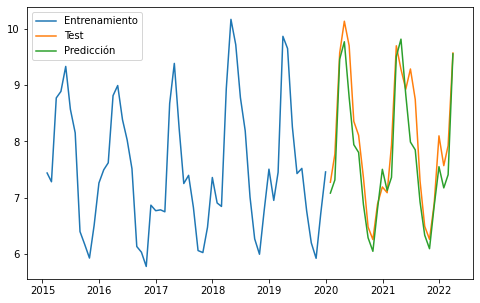

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(train,label="Entrenamiento")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicción")
plt.legend()
plt.show()

In [ ]:
#Calcular indicadores del modelo

#Error cuadrático medio (RMSE)
from sklearn.metrics import mean_squared_error
rms = mean_squared_error(test, prediction, squared=False)
print('Error cuadrático medio (RMSE)', rms)

#Error absoluto medio (MAE)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test, prediction)
print('Error absoluto medio (MAE)', mae)

#Porcentaje de error absoluto medio (MAPE)
mape = mape(test, prediction)*100
print('Porcentaje de error absoluto medio (MAPE)', mape)

#R2 Score
from sklearn.metrics import r2_score
r2 = r2_score(test, prediction)
print('R2 Score', r2)

Error cuadrático medio (RMSE) 0.4698286017515884
Error absoluto medio (MAE) 0.3653449030701826
Porcentaje de error absoluto medio (MAPE) 1641.8563957918013
R2 Score 0.835806094017023


In [ ]:
from sklearn.metrics import r2_score
r2_score(test, prediction)

0.835806094017023

# Arroz

In [ ]:
import pandas as pd

In [ ]:
arroz = pd.read_excel("/content/drive/MyDrive/Agrobanco/Fertilizantes/cultivos 2015-2022.xlsx", parse_dates=True, index_col='fecha', sheet_name='arroz')
arroz.drop(columns=['intencion_siembra','superficie_sembrada'], inplace=True)
arroz.dropna(inplace=True)
arroz.tail()

produccion  sup_cosechada  rendimiento  precio_chacra  \
fecha                                                               
2021-11-30  151290.420        21952.4     6.891749       1.039436   
2021-12-31  329898.530        40734.0     8.098849       1.212339   
2022-01-31  203108.432        26830.0     7.570199       1.263330   
2022-02-28  190486.280        24034.0     7.925700       1.172837   
2022-03-31  269387.619        28156.0     9.567681       1.196148   

            camp_grande   colocacion  provision    interes  tipo_cambio  \
fecha                                                                     
2021-11-30            1  10180025.32  351001.09   77396.46       4.0538   
2021-12-31            1  11571268.24  355786.80  199726.78       3.9852   
2022-01-31            1  13059172.80  300158.01  267531.87       3.8370   
2022-02-28            1  16634713.23  391849.05  112032.93       3.7730   
2022-03-31            1  18731571.41  403213.25  116669.47       3.6760   

            fertil_importacion  urea_importacion  nitrato_importaciones  \
fecha                                                                     
2021-11-30       103379.531000         20340.780              41365.280   
2021-12-31       175380.944000         18137.200              59836.440   
2022-01-31        57584.662206         12634.890               1010.000   
2022-02-28        57323.496000           528.650                  0.025   
2022-03-31        83691.735500          2135.441              11929.880   

            sulf_importacion   
fecha                          
2021-11-30          16368.991  
2021-12-31          25993.802  
2022-01-31          31217.990  
2022-02-28          46381.100  
2022-03-31          65133.850

## Producción

In [ ]:
plt.plot(arroz['produccion'])

NameError: ignored

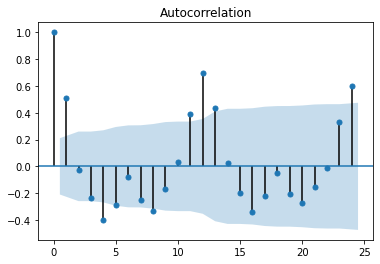

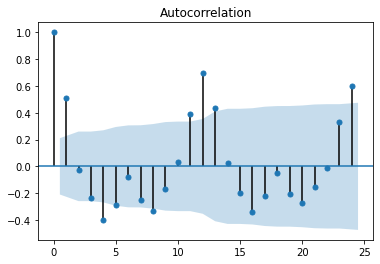

In [ ]:
#Función de autocorrelación para la producción
from statsmodels.graphics.tsaplots import plot_acf 
plot_acf(arroz['produccion'], lags=24, alpha=0.05)

In [ ]:
from statsmodels.tsa.stattools import adfuller
test_adfuller = adfuller(arroz['produccion'])
print("The p-value for the ADF test is ", test_adfuller[1])

The p-value for the ADF test is  0.2741462892135943


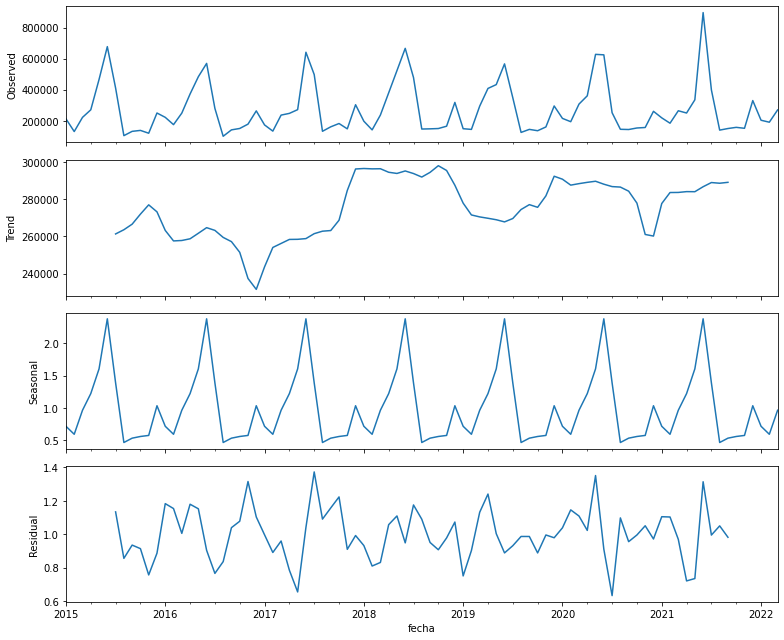

In [ ]:
#Descomposición estacional
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

decomposition = sm.tsa.seasonal_decompose(arroz['produccion'], model='multiplicative')
fig = decomposition.plot()
plt.show()

In [ ]:
rcParams['figure.figsize'] = 6, 4

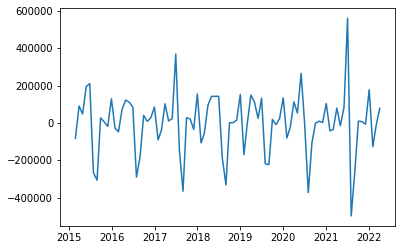

In [ ]:
#Ajustamos la producción para eliminar su estacionalidad
prod_ajustado = arroz['produccion'].diff()
prod_ajustado.dropna(inplace=True)
plt.plot(prod_ajustado)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
test_adfuller = adfuller(prod_ajustado)
print("The p-value for the ADF test is ", test_adfuller[1])

The p-value for the ADF test is  3.298675264348016e-23


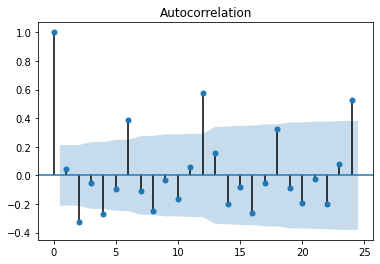

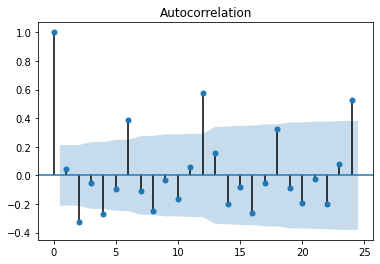

In [ ]:
#Función de autocorrelación para la producción con retraso
from statsmodels.graphics.tsaplots import plot_acf 
plot_acf(prod_ajustado, lags=24, alpha=0.05)

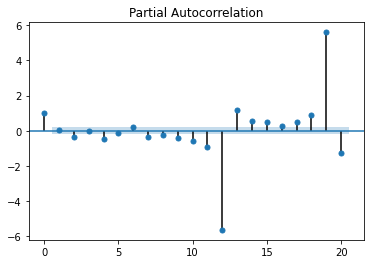

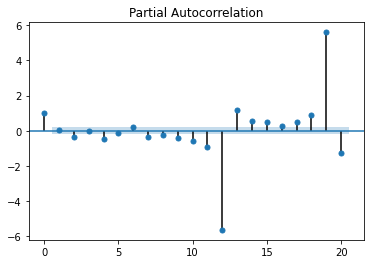

In [ ]:
#Función de autocorrelación parcial para la producción con retraso
from statsmodels.graphics.tsaplots import plot_pacf 
plot_pacf(prod_ajustado, lags=20, alpha=0.05)

In [ ]:
def optimize_SARIMA(parameters_list, d, D, s, exog):
    """
        Return dataframe with parameters, corresponding AIC and SSE
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order
        D - seasonal integration order
        s - length of season
        exog - the exogenous variable
    """
    
    results = []
    
    for param in tqdm_notebook(parameters_list):
        try: 
            model = SARIMAX(exog, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
            
        aic = model.aic
        results.append([param, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)x(P,Q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [ ]:
p = range(0, 4, 1)
d = 1
q = range(0, 4, 1)
P = range(0, 4, 1)
D = 1
Q = range(0, 4, 1)
s = 12
parameters = product(p, q, P, Q)
parameters_list = list(parameters)
print(len(parameters_list))


256


In [ ]:
result_df = optimize_SARIMA(parameters_list, 1, 1, 12, arroz['produccion'])
result_df

In [ ]:
#Gráfico de residuos
best_model.plot_diagnostics(figsize=(15,12))

Hipótesis 1: Modelo considerando el efecto de la guerra

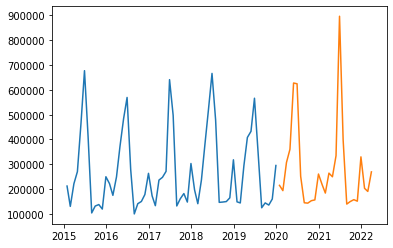

In [ ]:
#Dividimos en test de entrenamiento y validación
train, test = train_test_split(arroz['produccion'], shuffle=False, test_size=0.3)
plt.plot(train)
plt.plot(test)

In [ ]:
#Aplicamos AUTO ARIMA
arima_model = auto_arima(train, start_p=0, d=1, start_q=0, max_p=12, max_d=4, max_q=4, start_P=0, D=1, start_Q=0, max_P=4, max_D=4,max_Q=4, m=12, seasonal=True, error_action='warn', trace=True, supress_warnings=True, stepwise=True,random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1205.269, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1194.752, Time=0.12 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1194.223, Time=0.18 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1204.704, Time=0.04 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1195.874, Time=0.33 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=inf, Time=nan sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1194.913, Time=0.17 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=nan sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1198.460, Time=0.13 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1192.767, Time=0.29 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1201.402, Time=0.11 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=1194.322, Time=0.49 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=inf, Time=nan sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=1192.940, Time=0.31 sec
 ARIMA(1,1,1)(1,1,2)[12]             

In [ ]:
best_model = SARIMAX(arroz['produccion'], order=(2, 1, 1), seasonal_order=(0, 1, 1, 12)).fit(dis=-1)
print(best_model.summary())

                                 Statespace Model Results                                 
Dep. Variable:                         produccion   No. Observations:                   87
Model:             SARIMAX(2, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -942.315
Date:                            Wed, 11 May 2022   AIC                           1894.631
Time:                                    16:43:50   BIC                           1906.151
Sample:                                01-31-2015   HQIC                          1899.226
                                     - 03-31-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1229      0.264      0.466      0.641      -0.394       0.640
ar.L2         -0.2960      0.223   

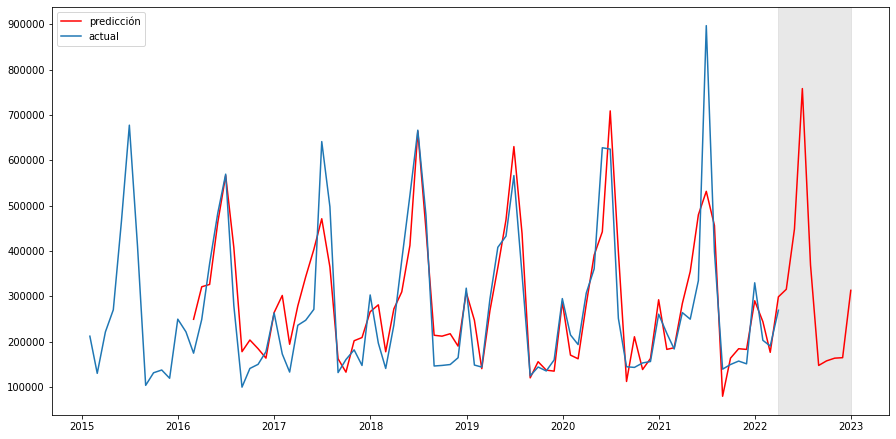

In [ ]:
arroz['arima_model'] = best_model.fittedvalues
arroz['arima_model'][:s+d] = np.NaN
forecast = best_model.predict(start=arroz.shape[0], end=arroz.shape[0] + 8)
forecast = arroz['arima_model'].append(forecast)
plt.figure(figsize=(15, 7.5))
plt.plot(forecast, color='r', label='predicción')
plt.axvspan(arroz.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
plt.plot(arroz['produccion'], label='actual')
plt.legend()
plt.show()

In [ ]:
best_model = SARIMAX(arroz['produccion'], order=(2, 1, 3), seasonal_order=(0, 1, 1, 12)).fit(dis=-1)
print(best_model.summary())

                                 Statespace Model Results                                 
Dep. Variable:                         produccion   No. Observations:                   87
Model:             SARIMAX(2, 1, 3)x(0, 1, 1, 12)   Log Likelihood                -939.227
Date:                            Fri, 13 May 2022   AIC                           1892.454
Time:                                    16:46:19   BIC                           1908.583
Sample:                                01-31-2015   HQIC                          1898.888
                                     - 03-31-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5426      0.202     -7.632      0.000      -1.939      -1.146
ar.L2         -0.7088      0.214   

In [ ]:
pred_guerra = best_model.predict(start='2022-04-30', end='2022-12-31' )
print(pred_guerra)

2022-04-30    356801.428206
2022-05-31    432495.931231
2022-06-30    764033.344010
2022-07-31    372967.086099
2022-08-31    153205.038485
2022-09-30    170895.821219
2022-10-31    162529.398932
2022-11-30    180689.390717
2022-12-31    311831.422312
Freq: M, dtype: float64


Hipótesis 2: Sin considerar el efecto de la guerra

In [ ]:
sin_guerra = arroz['produccion'].drop(['2022-02-28','2022-03-31'])
sin_guerra.tail()

fecha
2021-09-30    149761.608
2021-10-31    157350.079
2021-11-30    151290.420
2021-12-31    329898.530
2022-01-31    203108.432
Name: produccion, dtype: float64

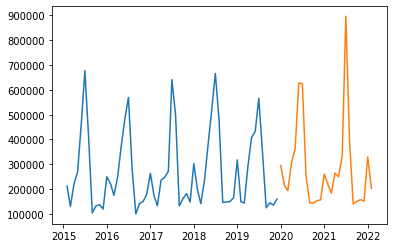

In [ ]:
#Dividimos en test de entrenamiento y validación
train, test = train_test_split(sin_guerra, shuffle=False, test_size=0.3)
plt.plot(train)
plt.plot(test)

In [ ]:
#Aplicamos AUTO ARIMA
arima_model = auto_arima(train, start_p=0, d=1, start_q=0, max_p=12, max_d=4, max_q=4, start_P=0, D=1, start_Q=0, max_P=4, max_D=4,max_Q=4, m=12, seasonal=True, error_action='warn', trace=True, supress_warnings=True, stepwise=True,random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1180.673, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1170.399, Time=0.13 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1169.952, Time=0.20 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1180.138, Time=0.04 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1171.609, Time=0.34 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=inf, Time=nan sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1170.615, Time=0.18 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=nan sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1200.167, Time=0.14 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1168.576, Time=0.28 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1176.952, Time=0.11 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=1170.133, Time=0.63 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=inf, Time=nan sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=1168.723, Time=0.74 sec
 ARIMA(1,1,1)(1,1,2)[12]             

In [ ]:
best_model = SARIMAX(sin_guerra, order=(2, 1, 1), seasonal_order=(0, 1, 1, 12)).fit(dis=-1)
print(best_model.summary())

                                 Statespace Model Results                                 
Dep. Variable:                         produccion   No. Observations:                   85
Model:             SARIMAX(2, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -917.789
Date:                            Wed, 11 May 2022   AIC                           1845.578
Time:                                    16:44:15   BIC                           1856.961
Sample:                                01-31-2015   HQIC                          1850.110
                                     - 01-31-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1225      0.271      0.452      0.651      -0.408       0.653
ar.L2         -0.2995      0.228   

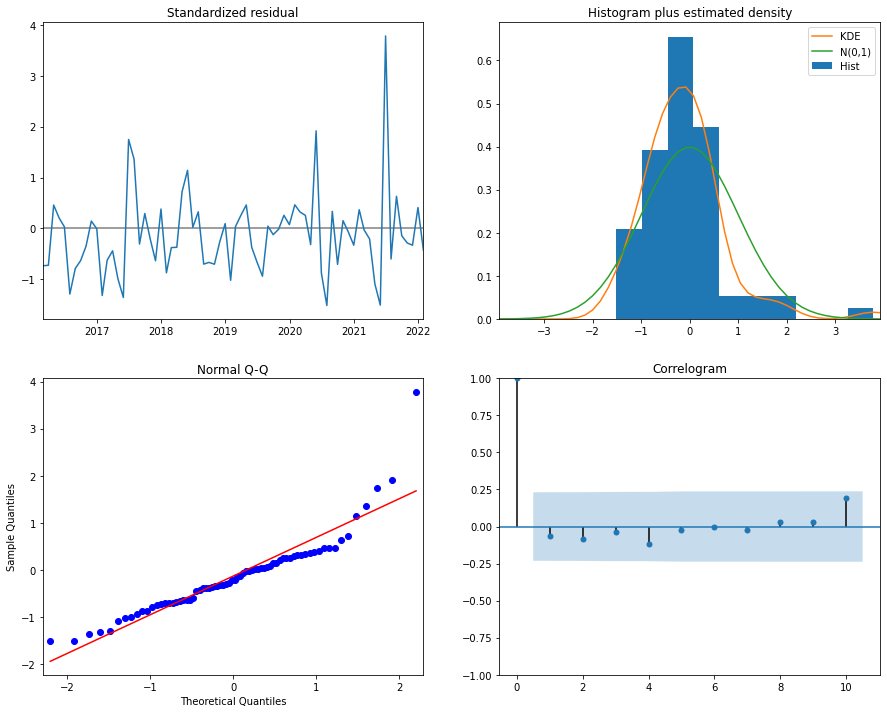

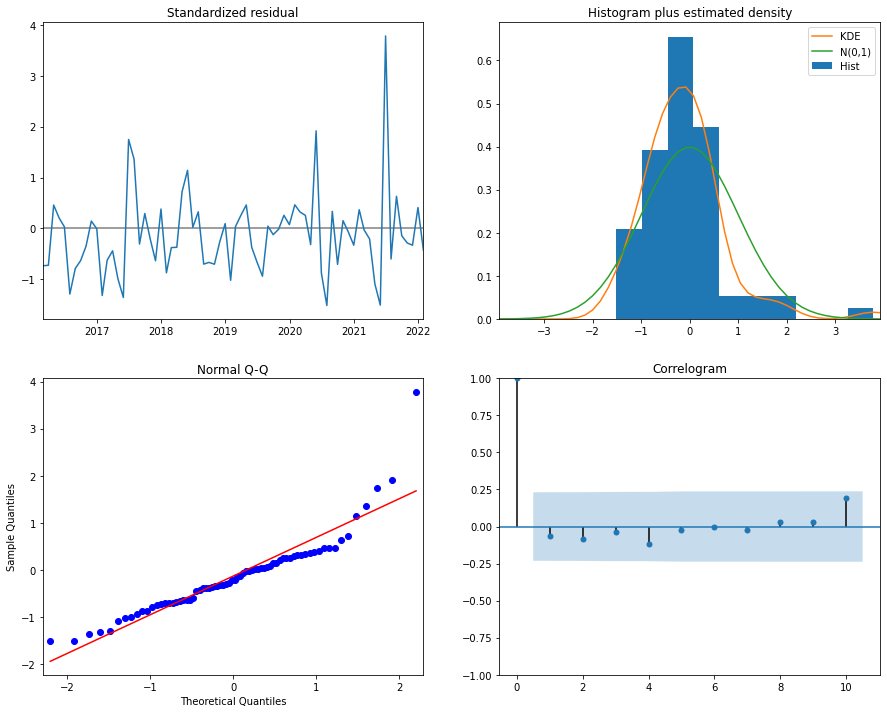

In [ ]:
#Gráfico de residuos
best_model.plot_diagnostics(figsize=(15,12))

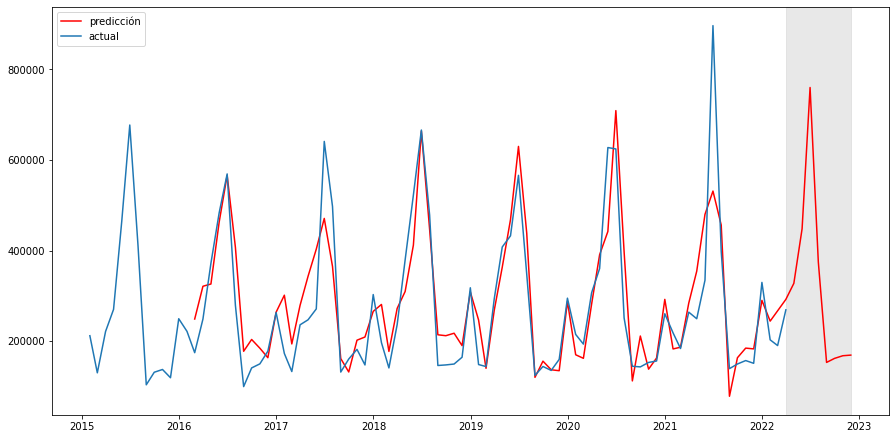

In [ ]:
sin_guerra['arima_model'] = best_model.fittedvalues
sin_guerra['arima_model'][:s+d] = np.NaN
forecast = best_model.predict(start=sin_guerra.shape[0], end=sin_guerra.shape[0] + 8)
forecast = sin_guerra['arima_model'].append(forecast)
plt.figure(figsize=(15, 7.5))
plt.plot(forecast, color='r', label='predicción')
plt.axvspan(arroz.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
plt.plot(arroz['produccion'], label='actual')
plt.legend()
plt.show()

In [ ]:
#Impacto real en la producción
pred_sin_guerra_feb_mar = best_model.predict(start='2022-02-28', end='2022-03-31' )
pred_sin_guerra_feb_mar =pd.DataFrame(pred_sin_guerra_feb_mar, columns=['Producción Estimada sin guerra'])
pred_sin_guerra = best_model.predict(start='2022-04-30', end='2022-12-31' )
feb_mar = pd.DataFrame({'Producción Real':[190486.28, 269387.619]}, index=['2022-02-28','2022-03-31'])
feb_mar.index = pd.to_datetime(feb_mar.index)
tabla = pd.concat([feb_mar,pred_sin_guerra_feb_mar], axis=1)
tabla['diferencia'] =  tabla['Producción Real'] - tabla['Producción Estimada sin guerra']
print(tabla)

            Producción Real  Producción Estimada sin guerra    diferencia
2022-02-28       190486.280                   176445.031012  14041.248988
2022-03-31       269387.619                   292429.407586 -23041.788586


In [ ]:
tabla.to_excel('Impacto real en la Producción arroz.xlsx')
print('File successfully exported into Excel File')

File successfully exported into Excel File


In [ ]:
#Impacto potencial en la producción
tabla = pd.concat([pred_guerra, pred_sin_guerra], axis=1)
tabla.columns = ['Con guerra', 'Sin guerra']
tabla['diferencia'] = tabla['Con guerra'] - tabla['Sin guerra']
print(tabla)

               Con guerra     Sin guerra    diferencia
2022-04-30  315578.635407  327832.614092 -12253.978684
2022-05-31  448387.070994  448307.229141     79.841854
2022-06-30  758072.125094  760230.116082  -2157.990988
2022-07-31  369431.446944  374960.989427  -5529.542483
2022-08-31  147713.652105  153254.407130  -5540.755025
2022-09-30  157784.501989  162157.830766  -4373.328777
2022-10-31  163766.236074  168002.536129  -4236.300055
2022-11-30  164837.502591  169380.729890  -4543.227299
2022-12-31  313228.693265  317935.324716  -4706.631451


In [ ]:
tabla.to_excel('Impacto Potencial en la producción arroz.xlsx')
print('File exported into Excel File')

File exported into Excel File


## Rendimiento

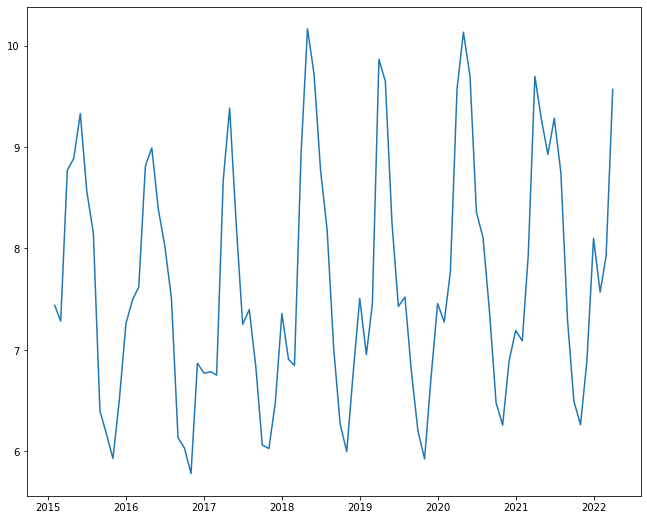

In [ ]:
plt.plot(arroz['rendimiento'])

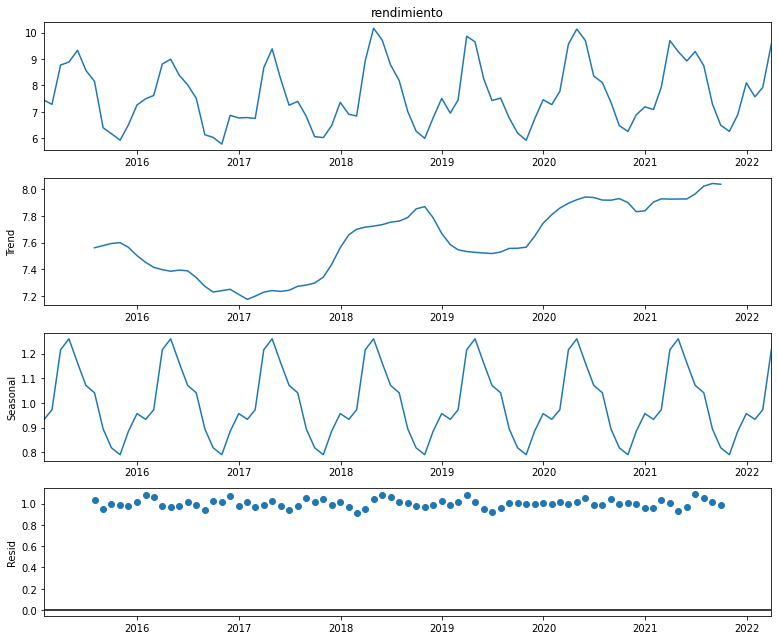

In [ ]:
#Descomposición estacional
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

decomposition = sm.tsa.seasonal_decompose(arroz['rendimiento'], model='multiplicative')
fig = decomposition.plot()
plt.show()

In [ ]:
rcParams['figure.figsize'] = 6, 4

In [ ]:
#Función de autocorrelación para el rendimiento
from statsmodels.graphics.tsaplots import plot_acf 
plot_acf(arroz['rendimiento'], lags=24, alpha=0.05)

In [ ]:
#Ajustamos el rendimiento en para eliminar su estacionalidad
rend_ajustado = arroz['rendimiento'].diff()
rend_ajustado.dropna(inplace=True)
plt.plot(rend_ajustado)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
test_adfuller = adfuller(rend_ajustado)
print("The p-value for the ADF test is ", test_adfuller[1])

The p-value for the ADF test is  0.0003905000643051408


In [ ]:
#Función de autocorrelación para el rendimiento con retraso 12
from statsmodels.graphics.tsaplots import plot_acf 
plot_acf(rend_ajustado, lags=24, alpha=0.05)

In [ ]:
#Función de autocorrelación parcial para el rendimiento
from statsmodels.graphics.tsaplots import plot_pacf 
plot_pacf(rend_ajustado, lags=20, alpha=0.05)

Hipótesis 1: Modelo considerando el efecto de la guerra

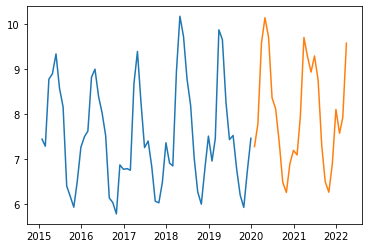

In [ ]:
#Dividimos en test de entrenamiento y validación
train, test = train_test_split(arroz['rendimiento'], shuffle=False, test_size=0.3)
plt.plot(train)
plt.plot(test)

In [ ]:
#Aplicamos AUTO ARIMA
arima_model = auto_arima(train, start_p=0, d=1, start_q=0, max_p=12, max_d=4, max_q=4, start_P=0, D=1, start_Q=0, max_P=4, max_D=4,max_Q=4, m=12, seasonal=True, error_action='warn', trace=True, supress_warnings=True, stepwise=True,random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=75.907, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=72.745, Time=0.11 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=72.066, Time=0.21 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=77.894, Time=0.03 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=73.787, Time=0.35 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=inf, Time=nan sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=72.691, Time=0.12 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=nan sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=70.156, Time=0.12 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=71.933, Time=0.27 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=inf, Time=nan sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=70.794, Time=0.07 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=nan sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=72.119, Time=0.17 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.92 sec
 

In [ ]:
best_model = SARIMAX(arroz['rendimiento'], order=(0, 1, 0), seasonal_order=(0, 1, 1, 12)).fit(dis=-1)
print(best_model.summary())

                                 Statespace Model Results                                 
Dep. Variable:                        rendimiento   No. Observations:                   87
Model:             SARIMAX(0, 1, 0)x(0, 1, 1, 12)   Log Likelihood                 -48.862
Date:                            Wed, 11 May 2022   AIC                            101.724
Time:                                    02:02:55   BIC                            106.333
Sample:                                01-31-2015   HQIC                           103.563
                                     - 03-31-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.8171      0.235     -3.480      0.001      -1.277      -0.357
sigma2         0.1851      0.043   

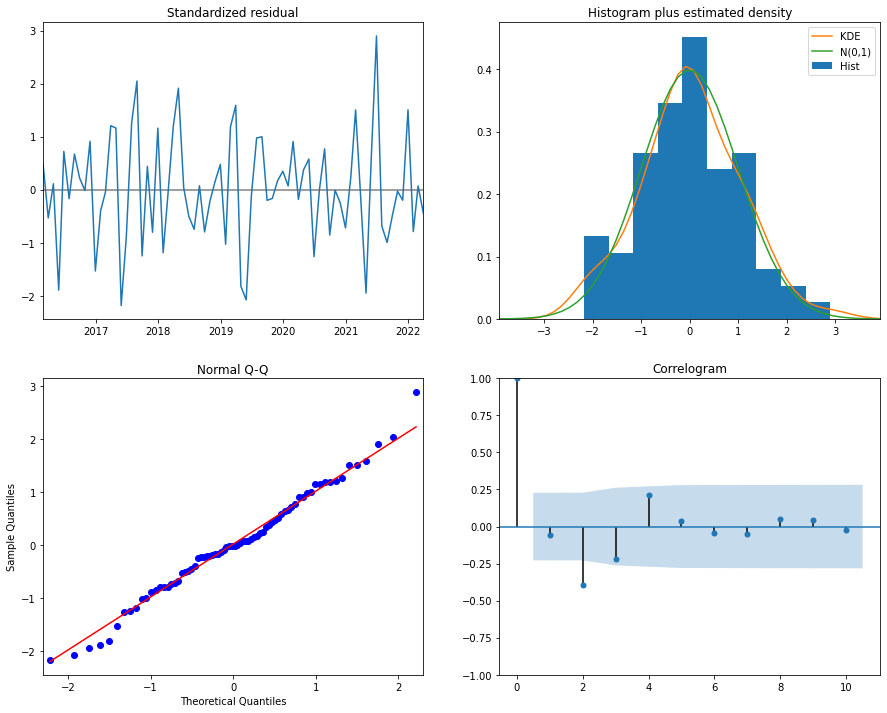

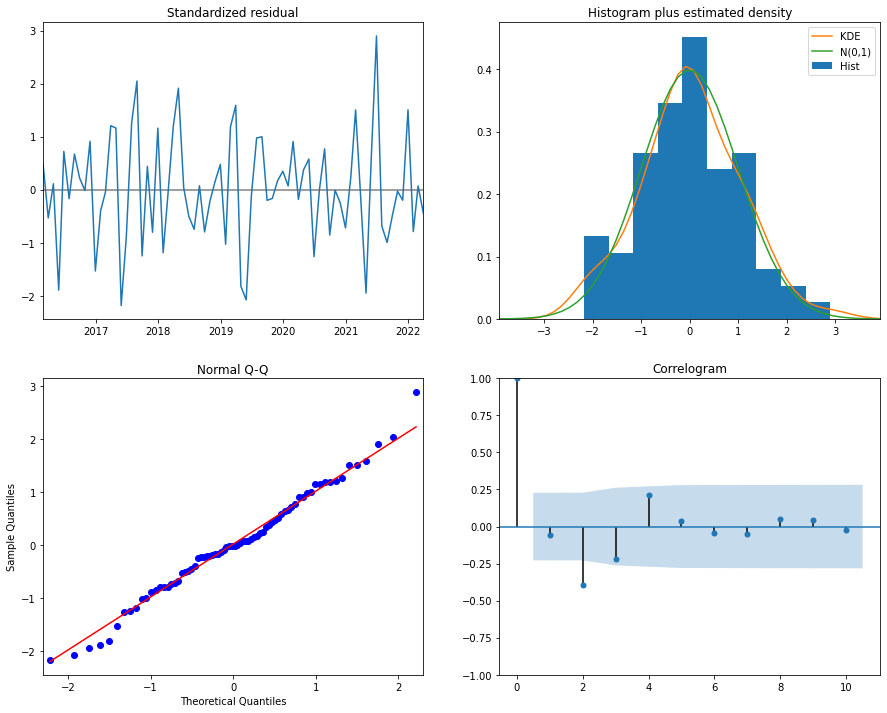

In [ ]:
#Gráfico de residuos
best_model.plot_diagnostics(figsize=(15,12))

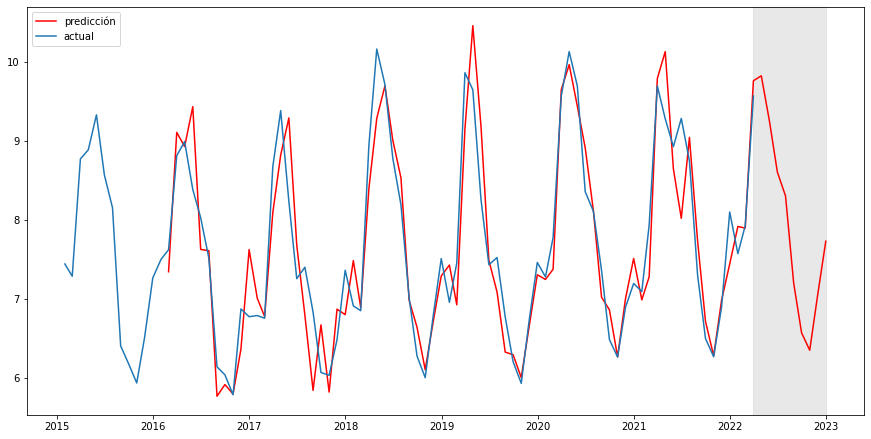

In [ ]:
arroz['arima_model'] = best_model.fittedvalues
arroz['arima_model'][:s+d] = np.NaN
forecast = best_model.predict(start=arroz.shape[0], end=arroz.shape[0] + 8)
forecast = arroz['arima_model'].append(forecast)
plt.figure(figsize=(15, 7.5))
plt.plot(forecast, color='r', label='predicción')
plt.axvspan(arroz.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
plt.plot(arroz['rendimiento'], label='actual')
plt.legend()
plt.show()

In [ ]:
pred_guerra = best_model.predict(start='2022-04-30', end='2022-12-31' )
print(pred_guerra)

2022-04-30    9.825029
2022-05-31    9.249989
2022-06-30    8.605082
2022-07-31    8.302564
2022-08-31    7.198052
2022-09-30    6.567510
2022-10-31    6.345454
2022-11-30    7.042018
2022-12-31    7.727935
Freq: M, dtype: float64


Hipótesis 2: Sin considerar el efecto de la guerra

In [ ]:
rend_sin_guerra = arroz['rendimiento'].drop(['2022-02-28','2022-03-31'])
rend_sin_guerra.tail()

fecha
2021-09-30    6.494573
2021-10-31    6.263487
2021-11-30    6.891749
2021-12-31    8.098849
2022-01-31    7.570199
Name: rendimiento, dtype: float64

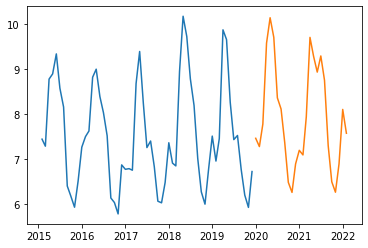

In [ ]:
#Dividimos en test de entrenamiento y validación
train, test = train_test_split(rend_sin_guerra, shuffle=False, test_size=0.3)
plt.plot(train)
plt.plot(test)

In [ ]:
#Aplicamos AUTO ARIMA
arima_model = auto_arima(train, start_p=0, d=1, start_q=0, max_p=12, max_d=4, max_q=4, start_P=0, D=1, start_Q=0, max_P=4, max_D=4,max_Q=4, m=12, seasonal=True, error_action='warn', trace=True, supress_warnings=True, stepwise=True,random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=75.324, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=72.352, Time=0.23 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=71.689, Time=0.16 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=77.311, Time=0.04 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=73.430, Time=0.30 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=inf, Time=nan sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=72.302, Time=0.11 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=nan sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=69.780, Time=0.13 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=71.575, Time=0.24 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=inf, Time=nan sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=70.397, Time=0.07 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=nan sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=71.743, Time=0.18 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.16 sec
 

In [ ]:
best_model = SARIMAX(rend_sin_guerra, order=(0, 1, 0), seasonal_order=(0, 1, 1, 12)).fit(dis=-1)
print(best_model.summary())

                                 Statespace Model Results                                 
Dep. Variable:                        rendimiento   No. Observations:                   85
Model:             SARIMAX(0, 1, 0)x(0, 1, 1, 12)   Log Likelihood                 -48.569
Date:                            Wed, 11 May 2022   AIC                            101.137
Time:                                    02:08:06   BIC                            105.691
Sample:                                01-31-2015   HQIC                           102.950
                                     - 01-31-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.7841      0.210     -3.732      0.000      -1.196      -0.372
sigma2         0.1936      0.043   

In [ ]:
#Gráfico de residuos
best_model.plot_diagnostics(figsize=(15,12))

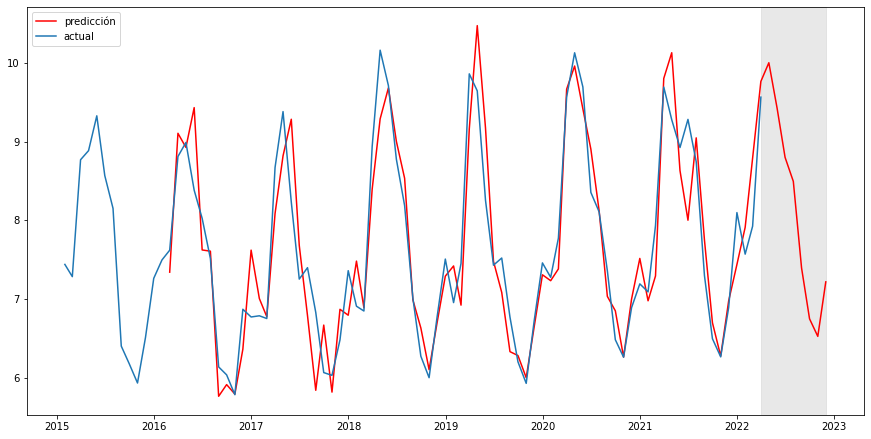

In [ ]:
rend_sin_guerra['arima_model'] = best_model.fittedvalues
rend_sin_guerra['arima_model'][:s+d] = np.NaN
forecast = best_model.predict(start=rend_sin_guerra.shape[0], end=rend_sin_guerra.shape[0] + 8)
forecast = rend_sin_guerra['arima_model'].append(forecast)
plt.figure(figsize=(15, 7.5))
plt.plot(forecast, color='r', label='predicción')
plt.axvspan(arroz.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
plt.plot(arroz['rendimiento'], label='actual')
plt.legend()
plt.show()

In [ ]:
#Impacto real en el rendimiento
pred_sin_guerra_feb_mar = best_model.predict(start='2022-02-28', end='2022-03-31' )
pred_sin_guerra_feb_mar =pd.DataFrame(pred_sin_guerra_feb_mar, columns=['Rendimiento Estimado sin guerra'])
pred_sin_guerra = best_model.predict(start='2022-04-30', end='2022-12-31' )
feb_mar = pd.DataFrame({'Rendimiento Real':[7.9257, 9.5677]}, index=['2022-02-28','2022-03-31'])
feb_mar.index = pd.to_datetime(feb_mar.index)
tabla = pd.concat([feb_mar,pred_sin_guerra_feb_mar], axis=1)
tabla['diferencia'] =  tabla['Rendimiento Real'] - tabla['Rendimiento Estimado sin guerra']
print(tabla)

            Rendimiento Real  Rendimiento Estimado sin guerra  diferencia
2022-02-28            7.9257                         7.922377    0.003323
2022-03-31            9.5677                         9.767292   -0.199592


In [ ]:
tabla.to_excel('Impacto real en el rendimiento del arroz.xlsx')
print('File successfully exported into Excel File')

File successfully exported into Excel File


In [ ]:
#Impacto potencial en el rendimiento
tabla = pd.concat([pred_guerra, pred_sin_guerra], axis=1)
tabla.columns = ['Con guerra', 'Sin guerra']
tabla['diferencia'] = tabla['Con guerra'] - tabla['Sin guerra']
print(tabla)

            Con guerra  Sin guerra  diferencia
2022-04-30    9.825029   10.005009   -0.179980
2022-05-31    9.249989    9.427500   -0.177511
2022-06-30    8.605082    8.801444   -0.196362
2022-07-31    8.302564    8.495693   -0.193129
2022-08-31    7.198052    7.394254   -0.196202
2022-09-30    6.567510    6.747459   -0.179949
2022-10-31    6.345454    6.524299   -0.178844
2022-11-30    7.042018    7.217518   -0.175500
2022-12-31    7.727935    7.918070   -0.190136


In [ ]:
tabla.to_excel('Impacto potencial en el rendimiento del arroz.xlsx')
print('File successfully exported into Excel File')

File successfully exported into Excel File


# Cacao

In [ ]:
cacao = pd.read_excel("/content/drive/MyDrive/Agrobanco/Fertilizantes/cultivos 2015-2022_drive.xlsx", parse_dates=True, index_col='fecha', sheet_name='cacao')
cacao.dropna(inplace=True)
cacao.head()

produccion  precio_chacra   colocacion  provision       interes  \
fecha                                                                         
2015-01-31    4882.415       6.546359  36517139.42  436694.31  159928.98741   
2015-02-28    5984.313       6.580982  37739941.18  449020.64  102349.02920   
2015-03-31    6398.482       6.612238  39767840.67  484711.22   70875.99512   
2015-04-30    7712.817       6.750506  43346366.58  535543.37  124294.60000   
2015-05-31   10546.177       6.963075  44518356.26  553999.42  236572.02300   

            tipo_cambio  fertil_importacion  urea_importacion  \
fecha                                                           
2015-01-31       3.0610       107453.849500         20142.518   
2015-02-28       3.0930        80187.485591         34887.990   
2015-03-31       3.0832        93405.833000         63697.800   
2015-04-30       3.1210        82563.778929         32069.080   
2015-05-31       3.1434        63602.246120         24125.110   

            nitrato_importaciones  sulf_importacion   
fecha                                                 
2015-01-31               10887.08       24430.514500  
2015-02-28                   0.00       27865.295591  
2015-03-31                   0.00        7013.950000  
2015-04-30               30705.66        4751.748929  
2015-05-31                8979.23       11672.289281

## Producción

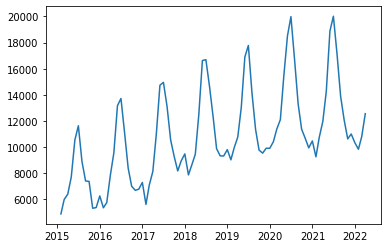

In [ ]:
plt.plot(cacao['produccion'])

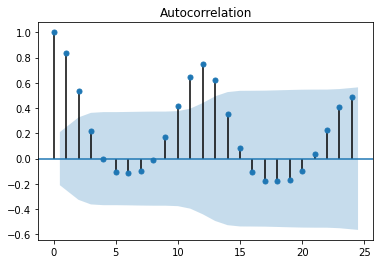

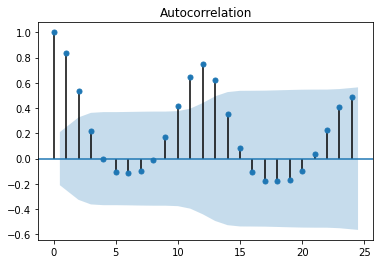

In [ ]:
#Función de autocorrelación para la producción
from statsmodels.graphics.tsaplots import plot_acf 
plot_acf(cacao['produccion'], lags=24, alpha=0.05)

In [ ]:
from statsmodels.tsa.stattools import adfuller
test_adfuller = adfuller(cacao['produccion'])
print("The p-value for the ADF test is ", test_adfuller[1])

The p-value for the ADF test is  0.2571867965617928


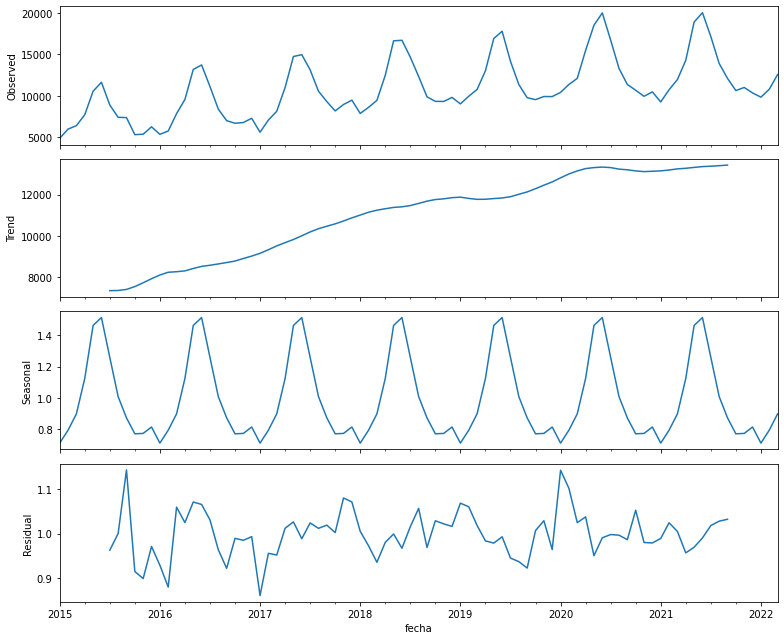

In [ ]:
#Descomposición estacional
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

decomposition = sm.tsa.seasonal_decompose(cacao['produccion'], model='multiplicative')
fig = decomposition.plot()
plt.show()

In [ ]:
rcParams['figure.figsize'] = 6, 4

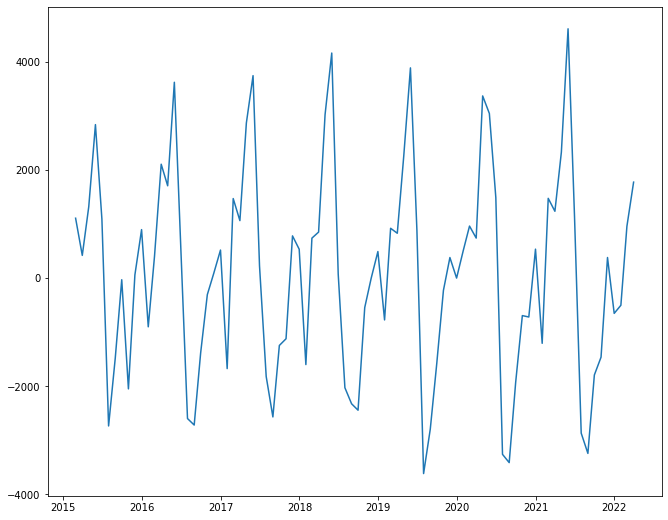

In [ ]:
#Ajustamos la producción para eliminar su estacionalidad
prod_ajustado = cacao['produccion'].diff()
prod_ajustado.dropna(inplace=True)
plt.plot(prod_ajustado)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
test_adfuller = adfuller(prod_ajustado)
print("The p-value for the ADF test is ", test_adfuller[1])

The p-value for the ADF test is  0.13111058769518935


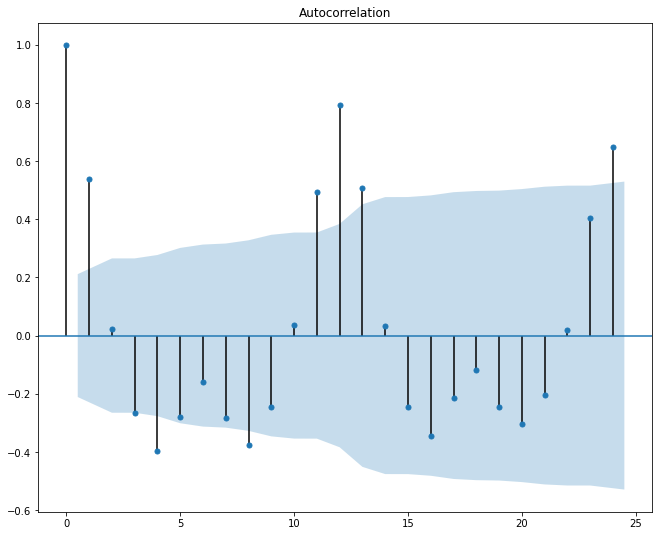

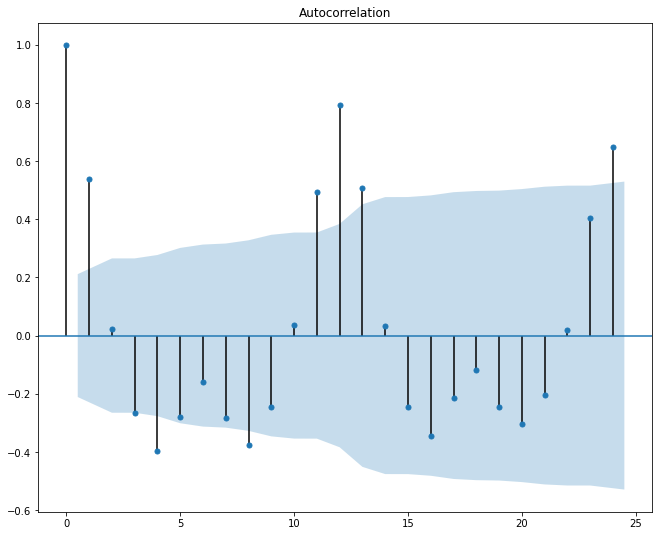

In [ ]:
#Función de autocorrelación para la producción con retraso
from statsmodels.graphics.tsaplots import plot_acf 
plot_acf(prod_ajustado, lags=24, alpha=0.05)

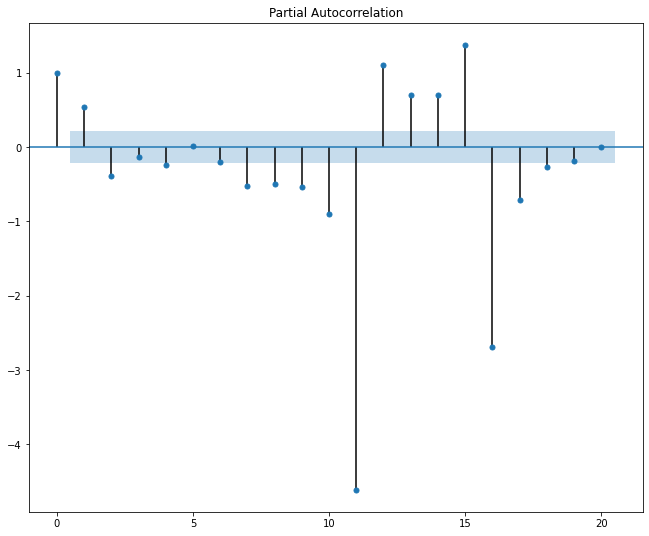

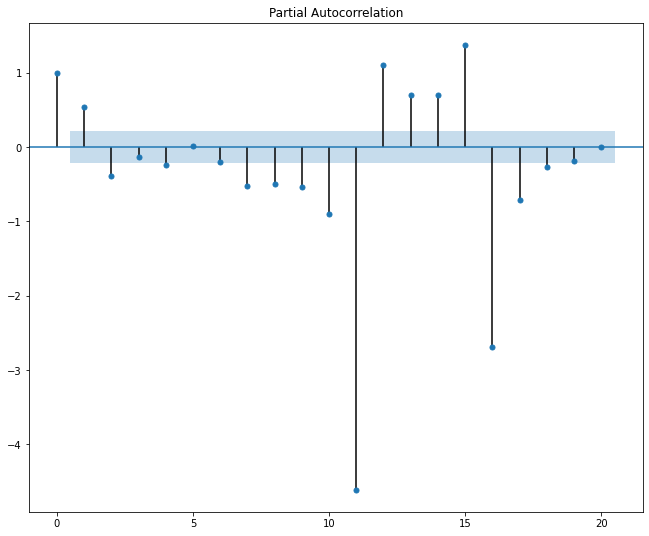

In [ ]:
#Función de autocorrelación parcial para la producción con retraso
from statsmodels.graphics.tsaplots import plot_pacf 
plot_pacf(prod_ajustado, lags=20, alpha=0.05)

In [ ]:
p = range(0, 4, 1)
d = 1
q = range(0, 4, 1)
P = range(0, 4, 1)
D = 1
Q = range(0, 4, 1)
s = 12
parameters = product(p, q, P, Q)
parameters_list = list(parameters)
print(len(parameters_list))


256


Hipótesis 1: Modelo considerando el efecto de la guerra

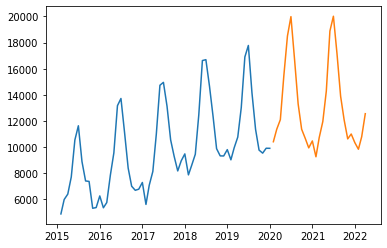

In [ ]:
#Dividimos en test de entrenamiento y validación
train, test = train_test_split(cacao['produccion'], shuffle=False, test_size=0.3)
plt.plot(train)
plt.plot(test)

In [ ]:
#Aplicamos AUTO ARIMA
arima_model = auto_arima(train, start_p=0, d=1, start_q=0, max_p=12, max_d=4, max_q=4, start_P=0, D=1, start_Q=0, max_P=4, max_D=4,max_Q=4, m=12, seasonal=True, error_action='warn', trace=True, supress_warnings=True, stepwise=True,random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=757.500, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=758.170, Time=0.19 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=756.164, Time=0.25 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=754.804, Time=0.07 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=756.206, Time=0.24 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=758.068, Time=0.62 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=752.232, Time=0.14 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=753.007, Time=0.19 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=752.892, Time=0.16 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=754.743, Time=0.37 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=757.444, Time=0.03 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=753.574, Time=0.23 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=753.702, Time=0.19 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=751.848, Time=0.11 sec
 ARIMA(0,1,2)(1,1,0)[12]         

In [ ]:
best_model = SARIMAX(cacao['produccion'], order=(0, 1, 2), seasonal_order=(0, 1, 0, 12)).fit(dis=-1)
print(best_model.summary())

                                 Statespace Model Results                                 
Dep. Variable:                         produccion   No. Observations:                   87
Model:             SARIMAX(0, 1, 2)x(0, 1, 0, 12)   Log Likelihood                -591.935
Date:                            Wed, 11 May 2022   AIC                           1189.870
Time:                                    03:01:41   BIC                           1196.782
Sample:                                01-31-2015   HQIC                          1192.627
                                     - 03-31-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3789      0.104     -3.632      0.000      -0.583      -0.174
ma.L2         -0.0133      0.107   

In [ ]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 27),index=test.index)
prediction.columns = ['pred_rendimiento']
prediction

pred_rendimiento
fecha                       
2020-01-31       9129.738531
2020-02-29      10138.055417
2020-03-31      10961.591417
2020-04-30      13215.034417
2020-05-31      17098.030417
2020-06-30      17976.175417
2020-07-31      14354.396417
2020-08-31      11555.274417
2020-09-30       9966.500417
2020-10-31       9733.684417
2020-11-30      10108.191417
2020-12-31      10102.803417
2021-01-31       9327.605948
2021-02-28      10335.922834
2021-03-31      11159.458834
2021-04-30      13412.901834
2021-05-31      17295.897834
2021-06-30      18174.042834
2021-07-31      14552.263834
2021-08-31      11753.141834
2021-09-30      10164.367834
2021-10-31       9931.551834
2021-11-30      10306.058834
2021-12-31      10300.670834
2022-01-31       9525.473365
2022-02-28      10533.790250
2022-03-31      11357.326250

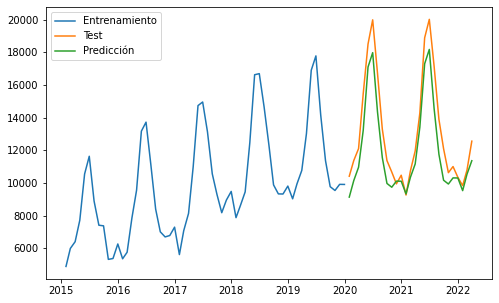

In [ ]:
#Gráfica de predicción
prediction = pd.DataFrame(arima_model.predict(n_periods = 27),index=test.index)
prediction.columns = ['pred_rendimiento']
plt.figure(figsize=(8,5))
plt.plot(train,label="Entrenamiento")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicción")
plt.legend()
plt.show()

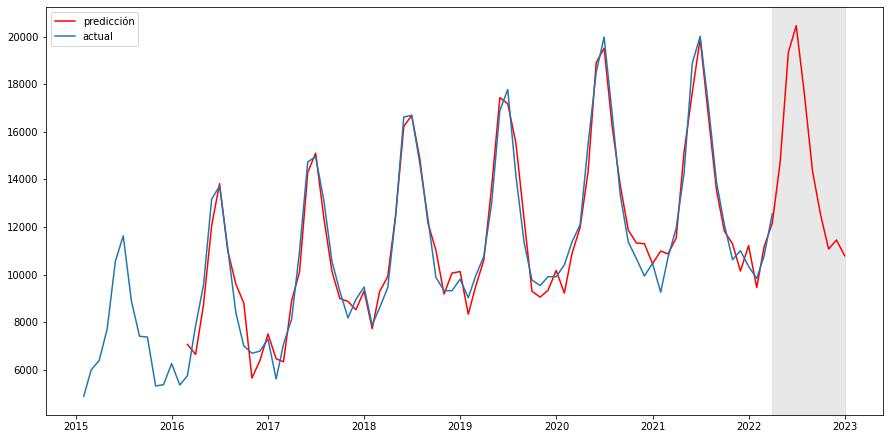

In [ ]:
cacao['arima_model'] = best_model.fittedvalues
cacao['arima_model'][:s+d] = np.NaN
forecast = best_model.predict(start=cacao.shape[0], end=cacao.shape[0] + 8)
forecast = cacao['arima_model'].append(forecast)
plt.figure(figsize=(15, 7.5))
plt.plot(forecast, color='r', label='predicción')
plt.axvspan(cacao.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
plt.plot(cacao['produccion'], label='actual')
plt.legend()
plt.show()

In [ ]:
pred_guerra = best_model.predict(start='2022-04-30', end='2022-12-31' )
print(pred_guerra)

2022-04-30    14733.701058
2022-05-31    19334.234676
2022-06-30    20464.288676
2022-07-31    17589.926676
2022-08-31    14341.086676
2022-09-30    12542.726676
2022-10-31    11074.257676
2022-11-30    11449.105676
2022-12-31    10790.646676
Freq: M, dtype: float64


Hipótesis 2: Sin considerar el efecto de la guerra

In [ ]:
sin_guerra = cacao['produccion'].drop(['2022-02-28','2022-03-31'])
sin_guerra.tail()

fecha
2021-09-30    12094.637
2021-10-31    10626.168
2021-11-30    11001.016
2021-12-31    10342.557
2022-01-31     9833.806
Name: produccion, dtype: float64

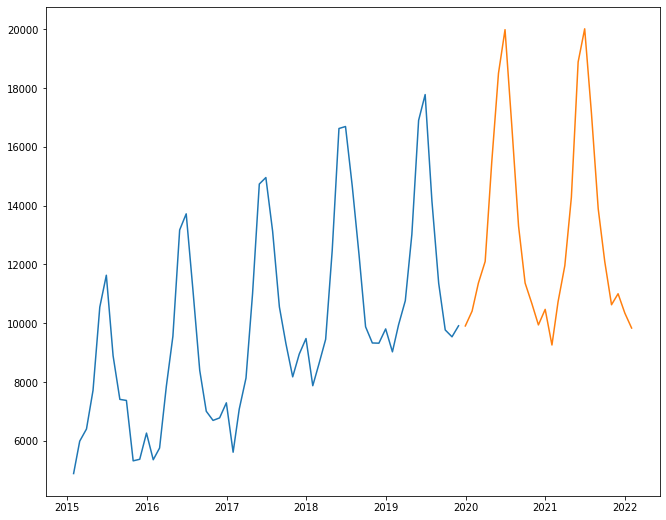

In [ ]:
#Dividimos en test de entrenamiento y validación
train, test = train_test_split(sin_guerra, shuffle=False, test_size=0.3)
plt.plot(train)
plt.plot(test)

In [ ]:
#Aplicamos AUTO ARIMA
arima_model = auto_arima(train, start_p=0, d=1, start_q=0, max_p=12, max_d=4, max_q=4, start_P=0, D=1, start_Q=0, max_P=4, max_D=4,max_Q=4, m=12, seasonal=True, error_action='warn', trace=True, supress_warnings=True, stepwise=True,random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=741.993, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=742.785, Time=0.28 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=741.166, Time=0.13 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=739.772, Time=0.07 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=741.123, Time=0.30 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=743.005, Time=0.79 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=737.014, Time=0.09 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=737.578, Time=0.23 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=737.467, Time=0.25 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=739.359, Time=0.57 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=742.095, Time=0.03 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=738.500, Time=0.16 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=738.526, Time=0.21 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=736.742, Time=0.14 sec
 ARIMA(0,1,2)(1,1,0)[12]         

In [ ]:
best_model = SARIMAX(sin_guerra, order=(0, 1, 2), seasonal_order=(0, 1, 0, 12)).fit(dis=-1)
print(best_model.summary())

                                 Statespace Model Results                                 
Dep. Variable:                         produccion   No. Observations:                   85
Model:             SARIMAX(0, 1, 2)x(0, 1, 0, 12)   Log Likelihood                -576.637
Date:                            Wed, 11 May 2022   AIC                           1159.275
Time:                                    03:03:25   BIC                           1166.105
Sample:                                01-31-2015   HQIC                          1161.994
                                     - 01-31-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3716      0.107     -3.465      0.001      -0.582      -0.161
ma.L2         -0.0275      0.111   

In [ ]:
#Gráfico de residuos
best_model.plot_diagnostics(figsize=(15,12))

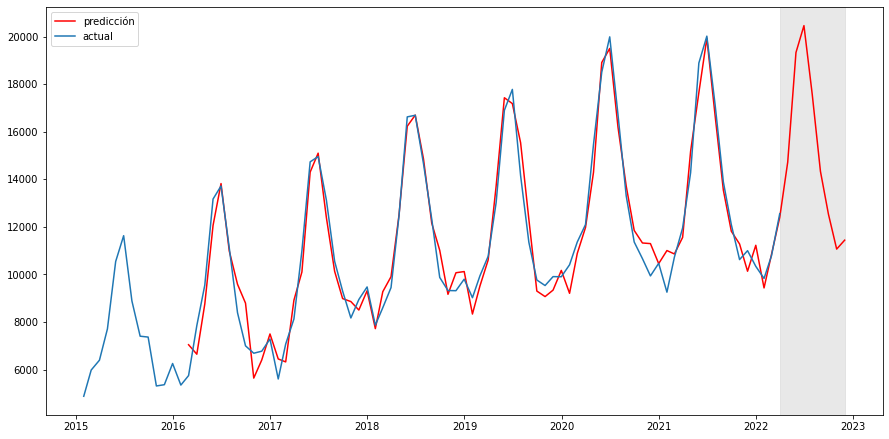

In [ ]:
sin_guerra['arima_model'] = best_model.fittedvalues
sin_guerra['arima_model'][:s+d] = np.NaN
forecast = best_model.predict(start=sin_guerra.shape[0], end=sin_guerra.shape[0] + 8)
forecast = sin_guerra['arima_model'].append(forecast)
plt.figure(figsize=(15, 7.5))
plt.plot(forecast, color='r', label='predicción')
plt.axvspan(cacao.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
plt.plot(cacao['produccion'], label='actual')
plt.legend()
plt.show()

In [ ]:
#Impacto real en la producción
pred_sin_guerra_feb_mar = best_model.predict(start='2022-02-28', end='2022-03-31' )
pred_sin_guerra_feb_mar =pd.DataFrame(pred_sin_guerra_feb_mar, columns=['Producción Estimada sin guerra'])
pred_sin_guerra = best_model.predict(start='2022-04-30', end='2022-12-31' )
feb_mar = pd.DataFrame({'Producción Real':[10786.968, 12556.19]}, index=['2022-02-28','2022-03-31'])
feb_mar.index = pd.to_datetime(feb_mar.index)
tabla = pd.concat([feb_mar,pred_sin_guerra_feb_mar], axis=1)
tabla['diferencia'] =  tabla['Producción Real'] - tabla['Producción Estimada sin guerra']
print(tabla)

            Producción Real  Producción Estimada sin guerra  diferencia
2022-02-28        10786.968                    11179.378683 -392.410683
2022-03-31        12556.190                    12398.709131  157.480869


In [ ]:
tabla.to_excel('Impacto real en la Producción cacao.xlsx')
print('File successfully exported into Excel File')

File successfully exported into Excel File


In [ ]:
#Impacto potencial en la producción
tabla = pd.concat([pred_guerra, pred_sin_guerra], axis=1)
tabla.columns = ['Con guerra', 'Sin guerra']
tabla['diferencia'] = tabla['Con guerra'] - tabla['Sin guerra']
print(tabla)

              Con guerra    Sin guerra  diferencia
2022-04-30  14733.701058  14722.379131   11.321928
2022-05-31  19334.234676  19328.236131    5.998545
2022-06-30  20464.288676  20458.290131    5.998545
2022-07-31  17589.926676  17583.928131    5.998545
2022-08-31  14341.086676  14335.088131    5.998545
2022-09-30  12542.726676  12536.728131    5.998545
2022-10-31  11074.257676  11068.259131    5.998545
2022-11-30  11449.105676  11443.107131    5.998545
2022-12-31  10790.646676  10784.648131    5.998545


In [ ]:
tabla.to_excel('Impacto Potencial en la producción de cacao.xlsx')
print('File exported into Excel File')

File exported into Excel File


# MAD

In [ ]:
mad = pd.read_excel("/content/drive/MyDrive/Agrobanco/Fertilizantes/cultivos 2015-2022.xlsx", parse_dates=True, index_col='fecha', sheet_name='maiz')
mad.drop(columns=['intencion_siembra','superficie_sembrada'], inplace=True)
mad.dropna(inplace=True)
mad.tail()

produccion  sup_cosechada  rendimiento  precio_chacra  \
fecha                                                               
2021-11-30  100116.063       20760.00     4.822546       1.262648   
2021-12-31  120337.143       25775.00     4.668754       1.341603   
2022-01-31  122056.597       29287.75     4.167497       1.366060   
2022-02-28  103266.507       24784.50     4.166576       1.266151   
2022-03-31   74382.150       14811.11     5.022051       1.379683   

            camp_grande   colocacion  provision    interes  tipo_cambio  \
fecha                                                                     
2021-11-30            1  10044494.55  199068.63  198888.20       4.0538   
2021-12-31            1  11539822.88  234548.62  170030.11       3.9852   
2022-01-31            1  11181794.56  262091.32  220874.46       3.8370   
2022-02-28            1  12146707.88  281430.83  239008.59       3.7730   
2022-03-31            1  13811213.70  293626.03  233290.28       3.6760   

            fertil_importacion  urea_importacion  nitrato_importaciones  \
fecha                                                                     
2021-11-30       103379.531000         20340.780              41365.280   
2021-12-31       175380.944000         18137.200              59836.440   
2022-01-31        57584.662206         12634.890               1010.000   
2022-02-28        57323.496000           528.650                  0.025   
2022-03-31        83691.735500          2135.441              11929.880   

            sulf_importacion   
fecha                          
2021-11-30          16368.991  
2021-12-31          25993.802  
2022-01-31          31217.990  
2022-02-28          46381.100  
2022-03-31          65133.850

## Producción

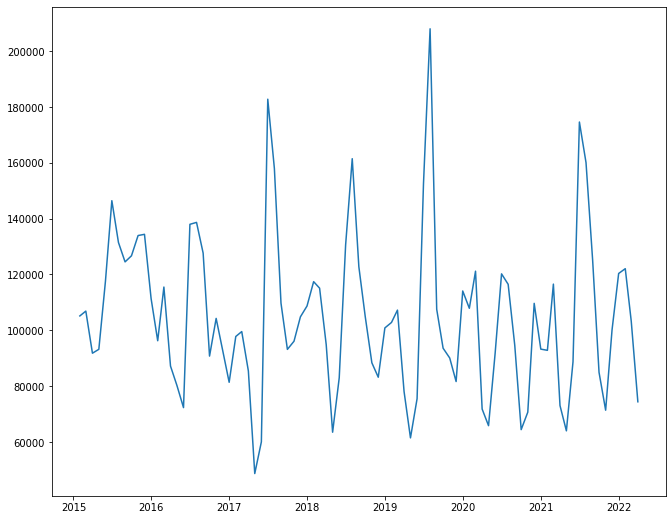

In [ ]:
plt.plot(mad['produccion'])

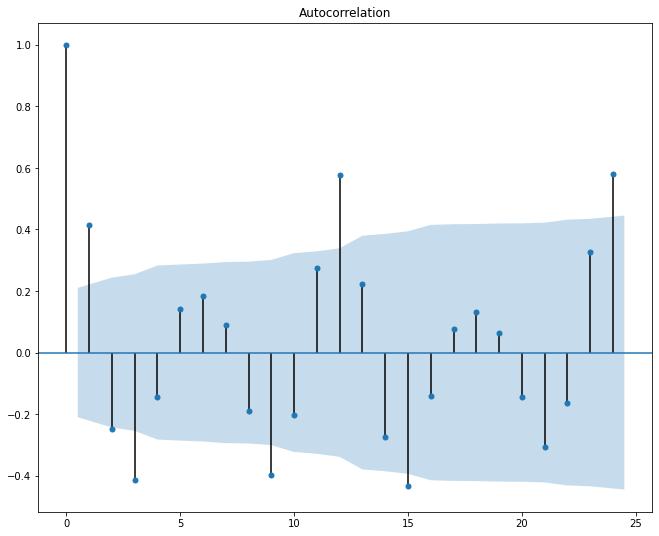

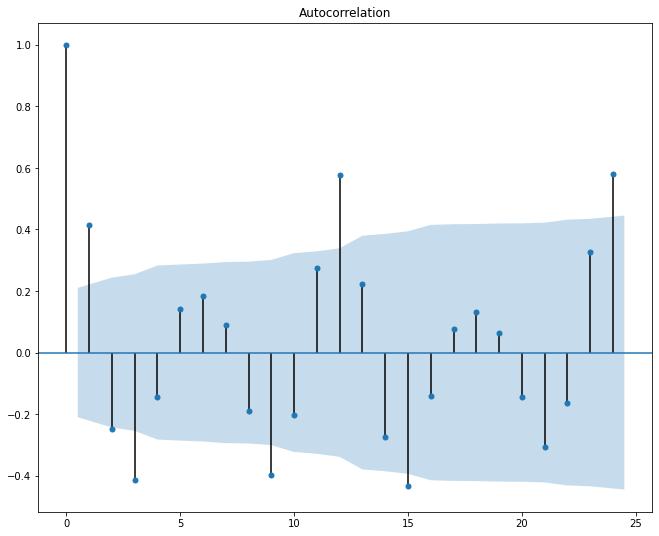

In [ ]:
#Función de autocorrelación para la producción
from statsmodels.graphics.tsaplots import plot_acf 
plot_acf(mad['produccion'], lags=24, alpha=0.05)

In [ ]:
from statsmodels.tsa.stattools import adfuller
test_adfuller = adfuller(mad['produccion'])
print("The p-value for the ADF test is ", test_adfuller[1])

The p-value for the ADF test is  0.13900166749802745


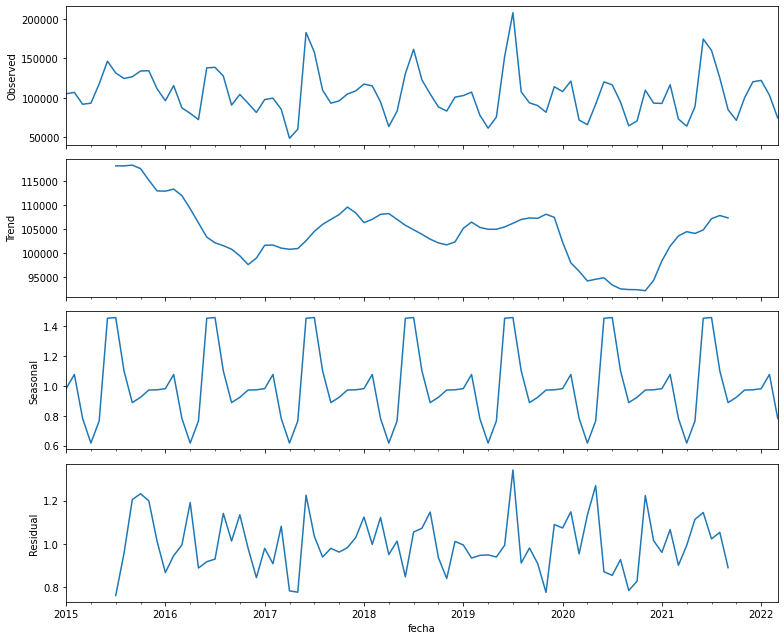

In [ ]:
#Descomposición estacional
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

decomposition = sm.tsa.seasonal_decompose(mad['produccion'], model='multiplicative')
fig = decomposition.plot()
plt.show()

In [ ]:
rcParams['figure.figsize'] = 6, 4

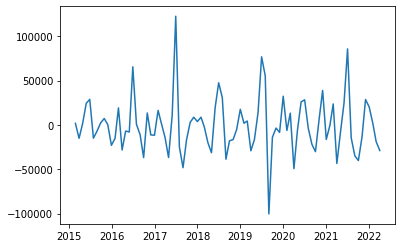

In [ ]:
#Ajustamos la producción para eliminar su estacionalidad
prod_ajustado = mad['produccion'].diff()
prod_ajustado.dropna(inplace=True)
plt.plot(prod_ajustado)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
test_adfuller = adfuller(prod_ajustado)
print("The p-value for the ADF test is ", test_adfuller[1])

The p-value for the ADF test is  9.976640257627405e-12


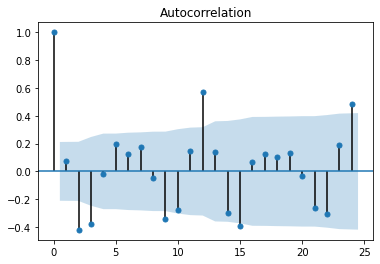

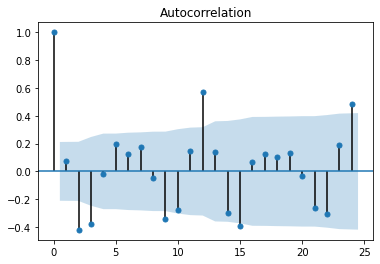

In [ ]:
#Función de autocorrelación para la producción con retraso
from statsmodels.graphics.tsaplots import plot_acf 
plot_acf(prod_ajustado, lags=24, alpha=0.05)

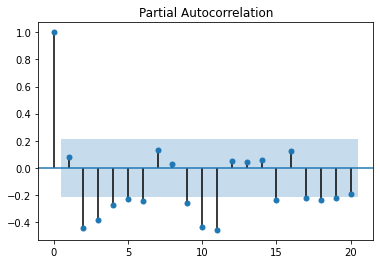

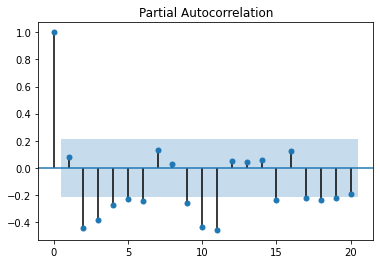

In [ ]:
#Función de autocorrelación parcial para la producción con retraso
from statsmodels.graphics.tsaplots import plot_pacf 
plot_pacf(prod_ajustado, lags=20, alpha=0.05)

In [ ]:
def optimize_SARIMA(parameters_list, d, D, s, exog):
    """
        Return dataframe with parameters, corresponding AIC and SSE
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order
        D - seasonal integration order
        s - length of season
        exog - the exogenous variable
    """
    
    results = []
    
    for param in tqdm_notebook(parameters_list):
        try: 
            model = SARIMAX(exog, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
            
        aic = model.aic
        results.append([param, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)x(P,Q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [ ]:
p = range(0, 4, 1)
d = 1
q = range(0, 4, 1)
P = range(0, 4, 1)
D = 1
Q = range(0, 4, 1)
s = 12
parameters = product(p, q, P, Q)
parameters_list = list(parameters)
print(len(parameters_list))


256


In [ ]:
result_df = optimize_SARIMA(parameters_list, 1, 1, 12, arroz['produccion'])
result_df

In [ ]:
#Gráfico de residuos
best_model.plot_diagnostics(figsize=(15,12))

Hipótesis 1: Modelo considerando el efecto de la guerra

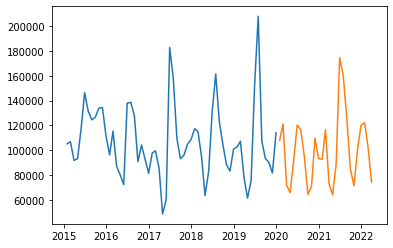

In [ ]:
#Dividimos en test de entrenamiento y validación
train, test = train_test_split(mad['produccion'], shuffle=False, test_size=0.3)
plt.plot(train)
plt.plot(test)

In [ ]:
#Aplicamos AUTO ARIMA
arima_model = auto_arima(train, start_p=0, d=1, start_q=0, max_p=12, max_d=4, max_q=4, start_P=0, D=1, start_Q=0, max_P=4, max_D=4,max_Q=4, m=12, seasonal=True, error_action='warn', trace=True, supress_warnings=True, stepwise=True,random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1090.089, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1082.470, Time=0.13 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1080.772, Time=0.15 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1084.731, Time=0.05 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1081.860, Time=0.42 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1081.920, Time=0.44 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1079.923, Time=0.14 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1081.858, Time=0.46 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=1083.856, Time=0.52 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1085.627, Time=0.13 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=1081.464, Time=0.32 sec
 ARIMA(0,1,2)(1,1,0)[12]             : AIC=1081.589, Time=0.46 sec
 ARIMA(1,1,2)(1,1,0)[12]             : AIC=1083.626, Time=0.75 sec
 ARIMA(0,1,1)(1,1,0)[12] intercept   : AIC=1082.298, Time=0.21 sec

Best model:  ARIMA

In [ ]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   60
Model:             SARIMAX(0, 1, 1)x(1, 1, [], 12)   Log Likelihood                -536.961
Date:                             Wed, 11 May 2022   AIC                           1079.923
Time:                                     21:27:17   BIC                           1085.473
Sample:                                          0   HQIC                          1082.012
                                              - 60                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3822      0.115     -3.319      0.001      -0.608      -0.157
ar.S.L12      -0.3009      0.120     -2.506      0.012      -0.536      -0.066
sigma2      5.314e+08   5.13e-11   1.04e+19      0.000    5.31e+08    5.31e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):                 3.61
Prob(Q):                              0.68   Prob(JB):                         0.16
Heteroskedasticity (H):               0.79   Skew:                             0.37
Prob(H) (two-sided):                  0.64   Kurtosis:                         4.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.04e+34. Standard errors may be unstable.
"""

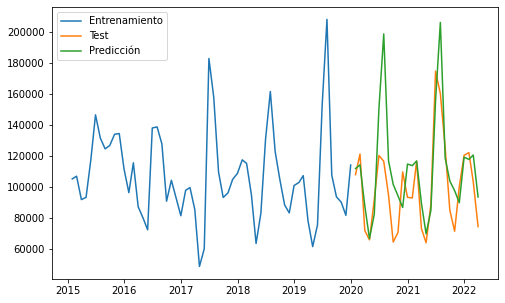

In [ ]:
#Gráfica de predicción
prediction = pd.DataFrame(arima_model.predict(n_periods = 27),index=test.index)
prediction.columns = ['pred_rendimiento']
plt.figure(figsize=(8,5))
plt.plot(train,label="Entrenamiento")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicción")
plt.legend()
plt.show()

In [ ]:
best_model = SARIMAX(mad['produccion'], order=(0, 1, 1), seasonal_order=(1, 1, 0, 12)).fit(dis=-1)
print(best_model.summary())

                                 Statespace Model Results                                 
Dep. Variable:                         produccion   No. Observations:                   87
Model:             SARIMAX(0, 1, 1)x(1, 1, 0, 12)   Log Likelihood                -847.580
Date:                            Wed, 11 May 2022   AIC                           1701.160
Time:                                    03:25:42   BIC                           1708.072
Sample:                                01-31-2015   HQIC                          1703.917
                                     - 03-31-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4667      0.105     -4.444      0.000      -0.672      -0.261
ar.S.L12      -0.4258      0.107   

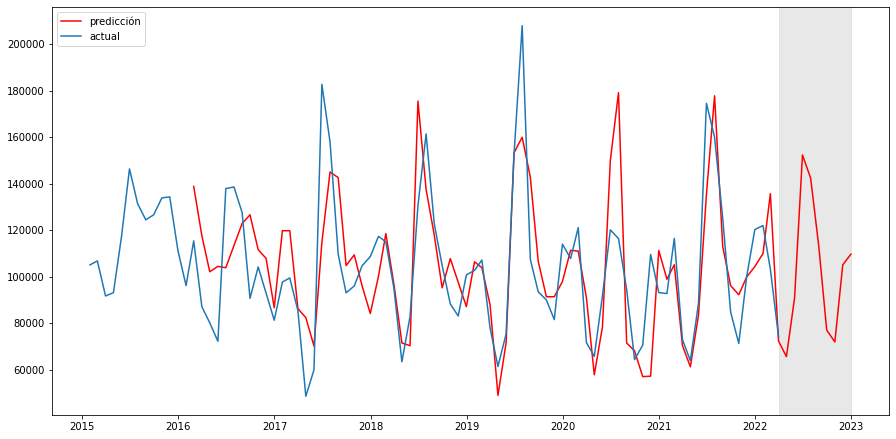

In [ ]:
mad['arima_model'] = best_model.fittedvalues
mad['arima_model'][:s+d] = np.NaN
forecast = best_model.predict(start=mad.shape[0], end=mad.shape[0] + 8)
forecast = mad['arima_model'].append(forecast)
plt.figure(figsize=(15, 7.5))
plt.plot(forecast, color='r', label='predicción')
plt.axvspan(mad.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
plt.plot(mad['produccion'], label='actual')
plt.legend()
plt.show()

In [ ]:
pred_guerra = best_model.predict(start='2022-04-30', end='2022-12-31' )
print(pred_guerra)

2022-04-30     65728.416258
2022-05-31     90989.398774
2022-06-30    152390.042676
2022-07-31    142445.590612
2022-08-31    113093.788923
2022-09-30     77158.633659
2022-10-31     72028.382345
2022-11-30    105131.767926
2022-12-31    109764.125295
Freq: M, dtype: float64


Hipótesis 2: Sin considerar el efecto de la guerra

In [ ]:
sin_guerra = mad['produccion'].drop(['2022-02-28','2022-03-31'])
sin_guerra.tail()

fecha
2021-09-30     84938.189
2021-10-31     71370.335
2021-11-30    100116.063
2021-12-31    120337.143
2022-01-31    122056.597
Name: produccion, dtype: float64

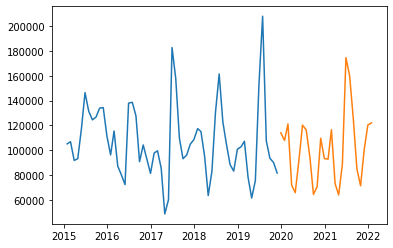

In [ ]:
#Dividimos en test de entrenamiento y validación
train, test = train_test_split(sin_guerra, shuffle=False, test_size=0.3)
plt.plot(train)
plt.plot(test)

In [ ]:
#Aplicamos AUTO ARIMA
arima_model = auto_arima(train, start_p=0, d=1, start_q=0, max_p=12, max_d=4, max_q=4, start_P=0, D=1, start_Q=0, max_P=4, max_D=4,max_Q=4, m=12, seasonal=True, error_action='warn', trace=True, supress_warnings=True, stepwise=True,random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1067.654, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1060.053, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1058.249, Time=0.12 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1062.359, Time=0.04 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1059.501, Time=0.27 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=inf, Time=nan sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1057.526, Time=0.09 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1059.502, Time=0.28 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=1061.503, Time=0.42 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1063.024, Time=0.07 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=1059.077, Time=0.20 sec
 ARIMA(0,1,2)(1,1,0)[12]             : AIC=1059.141, Time=0.31 sec
 ARIMA(1,1,2)(1,1,0)[12]             : AIC=1061.173, Time=0.43 sec
 ARIMA(0,1,1)(1,1,0)[12] intercept   : AIC=1059.673, Time=0.13 sec

Best model:  ARIMA(0,1,1

In [ ]:
best_model = SARIMAX(sin_guerra, order=(0, 1, 1), seasonal_order=(1, 1, 0, 12)).fit(dis=-1)
print(best_model.summary())

                                 Statespace Model Results                                 
Dep. Variable:                         produccion   No. Observations:                   85
Model:             SARIMAX(0, 1, 1)x(1, 1, 0, 12)   Log Likelihood                -824.611
Date:                            Wed, 11 May 2022   AIC                           1655.223
Time:                                    03:27:14   BIC                           1662.053
Sample:                                01-31-2015   HQIC                          1657.942
                                     - 01-31-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4546      0.108     -4.213      0.000      -0.666      -0.243
ar.S.L12      -0.4202      0.108   

In [ ]:
#Gráfico de residuos
best_model.plot_diagnostics(figsize=(15,12))

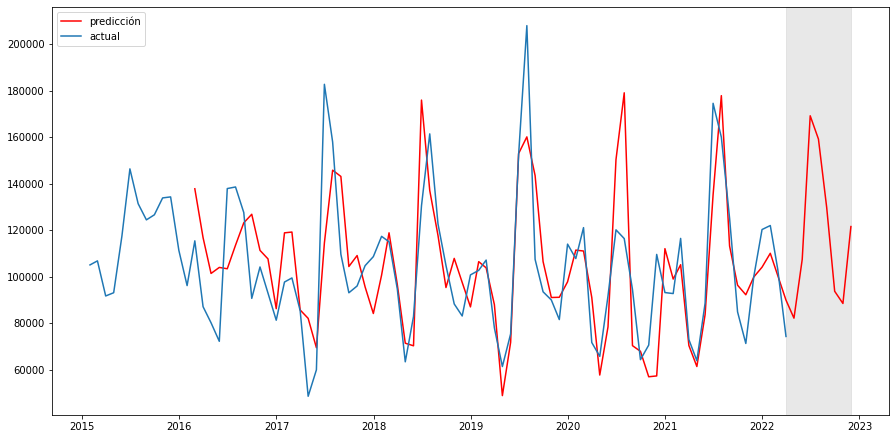

In [ ]:
sin_guerra['arima_model'] = best_model.fittedvalues
sin_guerra['arima_model'][:s+d] = np.NaN
forecast = best_model.predict(start=sin_guerra.shape[0], end=sin_guerra.shape[0] + 8)
forecast = sin_guerra['arima_model'].append(forecast)
plt.figure(figsize=(15, 7.5))
plt.plot(forecast, color='r', label='predicción')
plt.axvspan(mad.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
plt.plot(mad['produccion'], label='actual')
plt.legend()
plt.show()

In [ ]:
#Impacto real en la producción
pred_sin_guerra_feb_mar = best_model.predict(start='2022-02-28', end='2022-03-31' )
pred_sin_guerra_feb_mar =pd.DataFrame(pred_sin_guerra_feb_mar, columns=['Producción Estimada sin guerra'])
pred_sin_guerra = best_model.predict(start='2022-04-30', end='2022-12-31' )
feb_mar = pd.DataFrame({'Producción Real':[103266.507, 74382.15]}, index=['2022-02-28','2022-03-31'])
feb_mar.index = pd.to_datetime(feb_mar.index)
tabla = pd.concat([feb_mar,pred_sin_guerra_feb_mar], axis=1)
tabla['diferencia'] =  tabla['Producción Real'] - tabla['Producción Estimada sin guerra']
print(tabla)

            Producción Real  Producción Estimada sin guerra    diferencia
2022-02-28       103266.507                   135964.248965 -32697.741965
2022-03-31        74382.150                    90002.488470 -15620.338470


In [ ]:
tabla.to_excel('Impacto real en la Producción mad.xlsx')
print('File successfully exported into Excel File')

File successfully exported into Excel File


In [ ]:
#Impacto potencial en la producción
tabla = pd.concat([pred_guerra, pred_sin_guerra], axis=1)
tabla.columns = ['Con guerra', 'Sin guerra']
tabla['diferencia'] = tabla['Con guerra'] - tabla['Sin guerra']
print(tabla)

               Con guerra     Sin guerra    diferencia
2022-04-30   65728.416258   82249.825760 -16521.409501
2022-05-31   90989.398774  107503.775000 -16514.376226
2022-06-30  152390.042676  169225.225393 -16835.182718
2022-07-31  142445.590612  159220.557343 -16774.966731
2022-08-31  113093.788923  129796.291240 -16702.502316
2022-09-30   77158.633659   93804.924728 -16646.291069
2022-10-31   72028.382345   88564.092673 -16535.710329
2022-11-30  105131.767926  121610.368076 -16478.600150
2022-12-31  109764.125295  126447.026661 -16682.901365


In [ ]:
tabla.to_excel('Impacto Potencial en la producción mad.xlsx')
print('File exported into Excel File')

File exported into Excel File


## Rendimiento

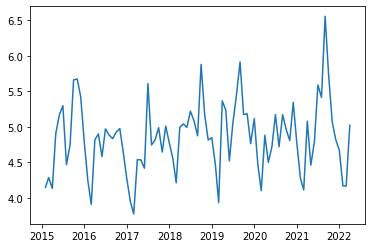

In [ ]:
plt.plot(mad['rendimiento'])

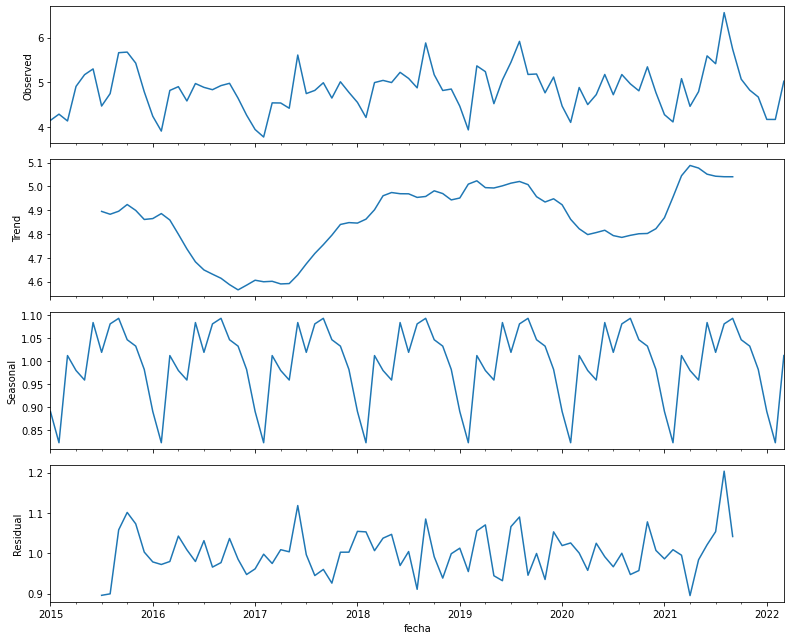

In [ ]:
#Descomposición estacional
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

decomposition = sm.tsa.seasonal_decompose(mad['rendimiento'], model='multiplicative')
fig = decomposition.plot()
plt.show()

In [ ]:
rcParams['figure.figsize'] = 6, 4

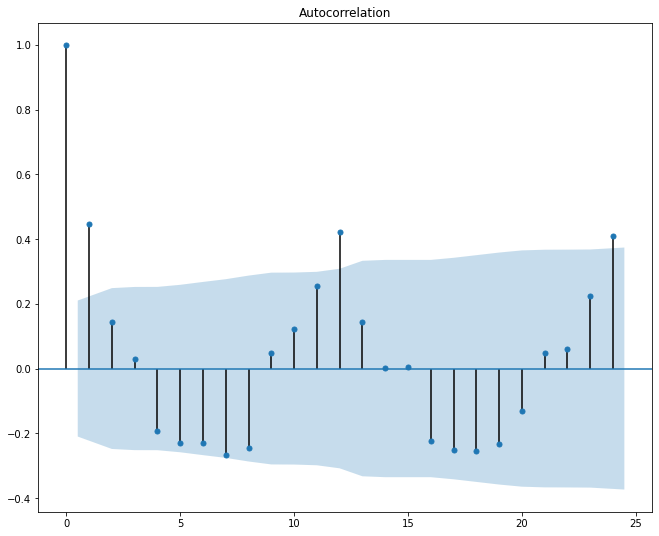

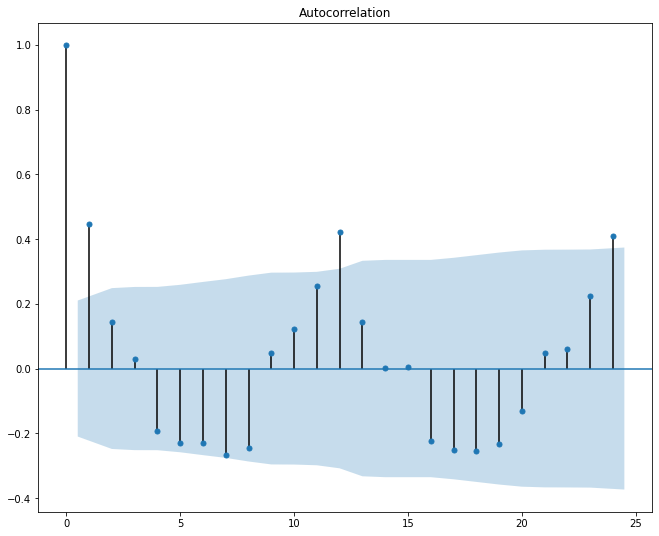

In [ ]:
#Función de autocorrelación para el rendimiento
from statsmodels.graphics.tsaplots import plot_acf 
plot_acf(mad['rendimiento'], lags=24, alpha=0.05)

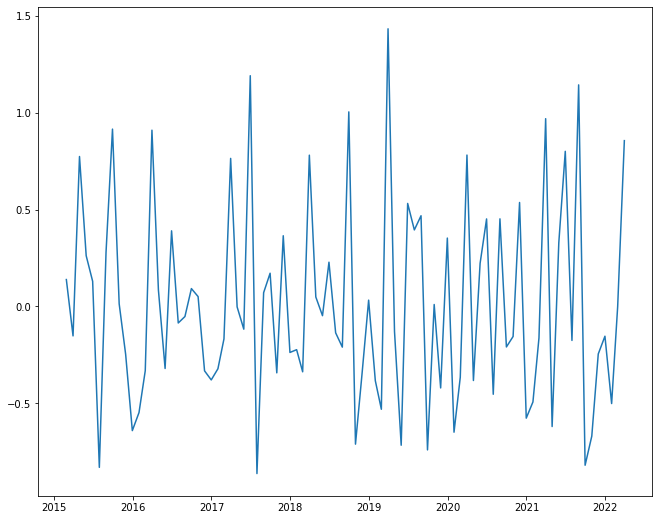

In [ ]:
#Ajustamos el rendimiento en para eliminar su estacionalidad
rend_ajustado = mad['rendimiento'].diff()
rend_ajustado.dropna(inplace=True)
plt.plot(rend_ajustado)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
test_adfuller = adfuller(rend_ajustado)
print("The p-value for the ADF test is ", test_adfuller[1])

The p-value for the ADF test is  0.00027972649081103054


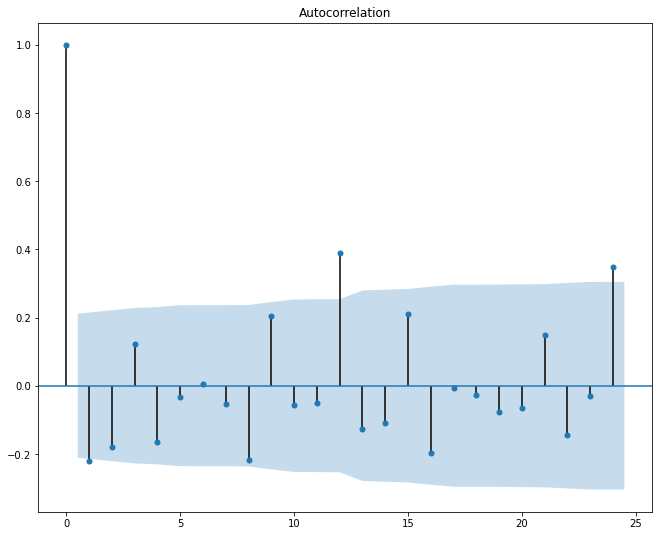

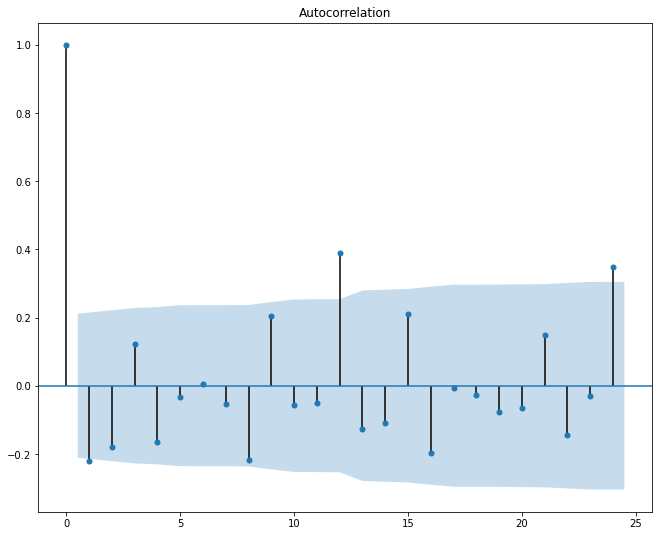

In [ ]:
#Función de autocorrelación para el rendimiento con retraso 
from statsmodels.graphics.tsaplots import plot_acf 
plot_acf(rend_ajustado, lags=24, alpha=0.05)

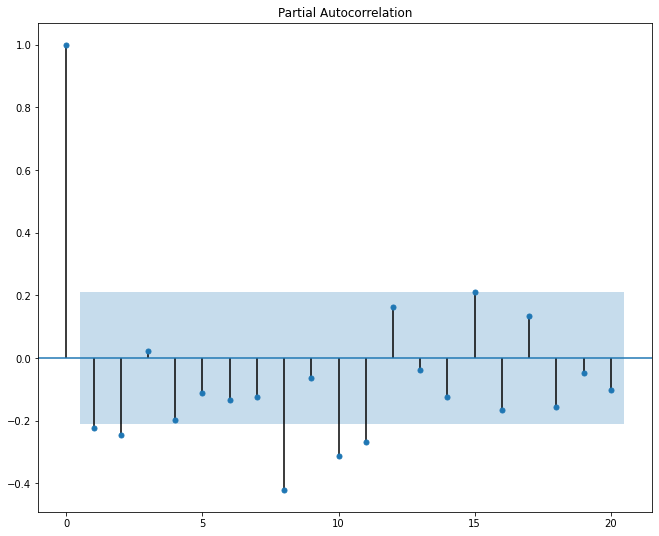

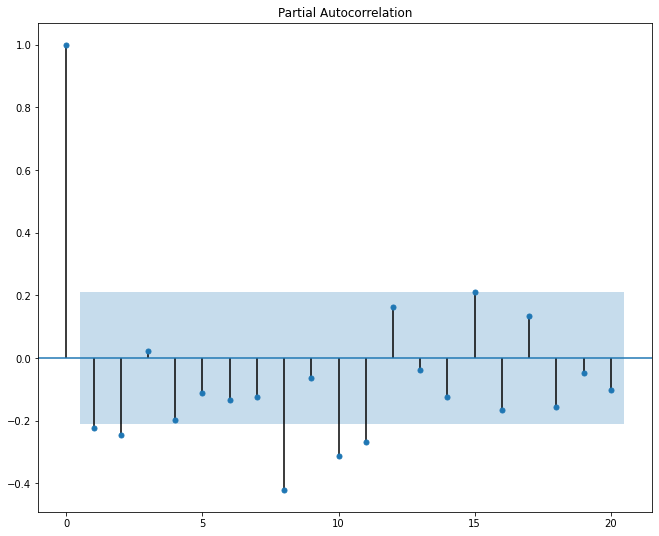

In [ ]:
#Función de autocorrelación parcial para el rendimiento
from statsmodels.graphics.tsaplots import plot_pacf 
plot_pacf(rend_ajustado, lags=20, alpha=0.05)

Hipótesis 1: Modelo considerando el efecto de la guerra

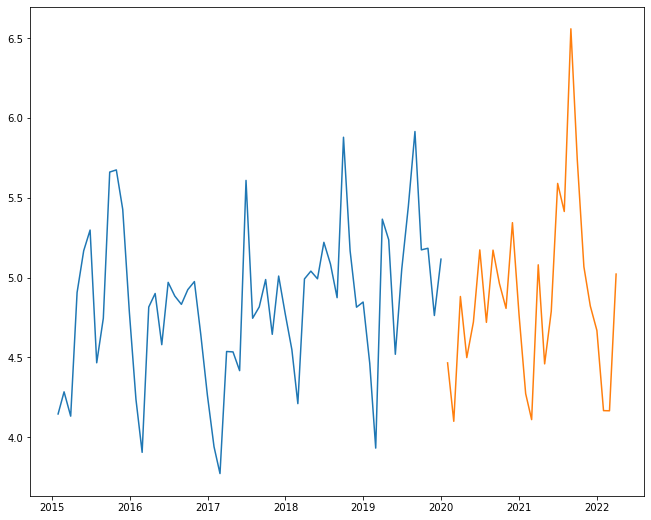

In [ ]:
#Dividimos en test de entrenamiento y validación
train, test = train_test_split(mad['rendimiento'], shuffle=False, test_size=0.3)
plt.plot(train)
plt.plot(test)

In [ ]:
#Aplicamos AUTO ARIMA
arima_model = auto_arima(train, start_p=0, d=1, start_q=0, max_p=12, max_d=4, max_q=4, start_P=0, D=1, start_Q=0, max_P=4, max_D=4,max_Q=4, m=12, seasonal=True, error_action='warn', trace=True, supress_warnings=True, stepwise=True,random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=79.086, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=70.621, Time=0.29 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=56.506, Time=0.54 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=61.531, Time=0.11 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=57.751, Time=0.77 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=inf, Time=nan sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=57.114, Time=0.68 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=nan sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=72.873, Time=0.16 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=57.849, Time=0.53 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=57.444, Time=0.29 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=69.788, Time=0.21 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=59.205, Time=0.56 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=58.037, Time=0.84 sec

Best model:  ARIMA(0,1,1)(0,1,1)[12]          
Total f

In [ ]:
best_model = SARIMAX(mad['rendimiento'], order=(0, 1, 1), seasonal_order=(0, 1, 1, 12)).fit(dis=-1)
print(best_model.summary())

                                 Statespace Model Results                                 
Dep. Variable:                        rendimiento   No. Observations:                   87
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 -37.560
Date:                            Wed, 11 May 2022   AIC                             81.121
Time:                                    03:34:47   BIC                             88.033
Sample:                                01-31-2015   HQIC                            83.878
                                     - 03-31-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7818      0.091     -8.572      0.000      -0.961      -0.603
ma.S.L12      -0.6021      0.164   

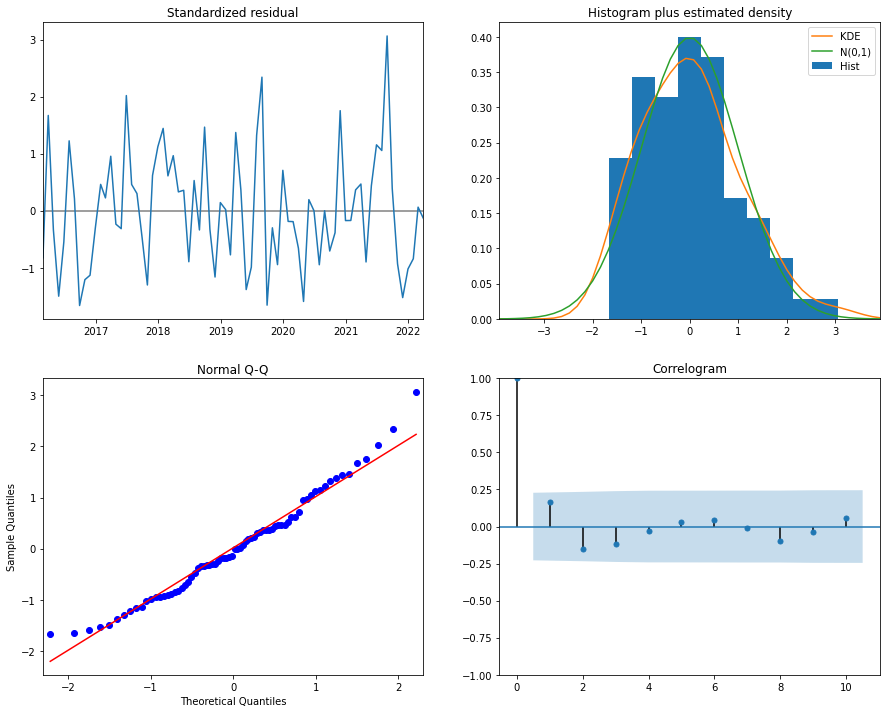

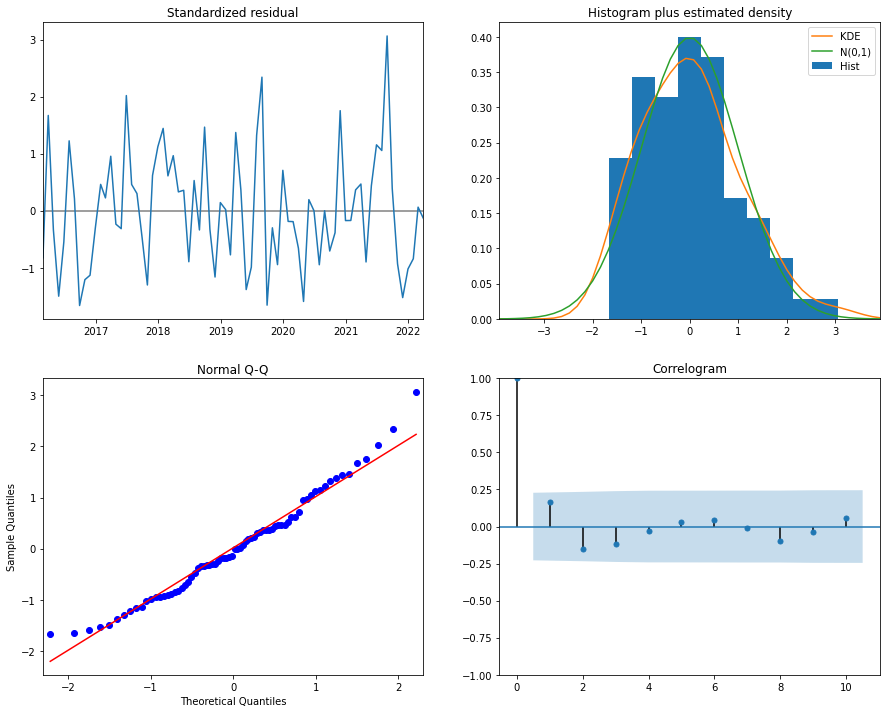

In [ ]:
#Gráfico de residuos
best_model.plot_diagnostics(figsize=(15,12))

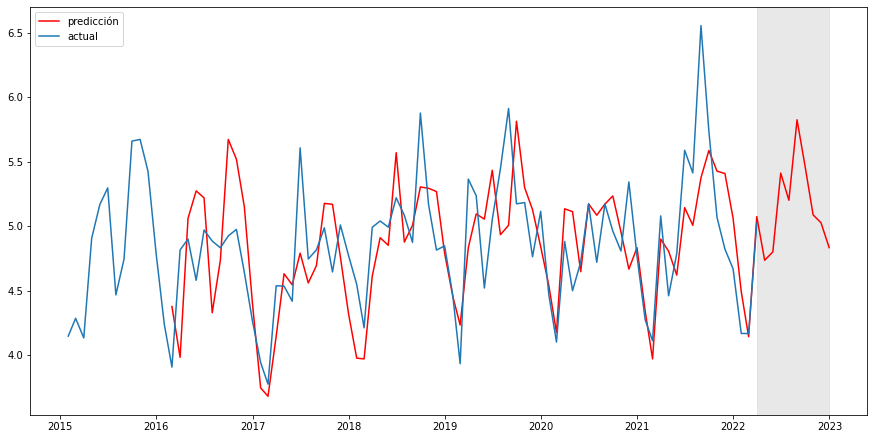

In [ ]:
mad['arima_model'] = best_model.fittedvalues
mad['arima_model'][:s+d] = np.NaN
forecast = best_model.predict(start=mad.shape[0], end=mad.shape[0] + 8)
forecast = mad['arima_model'].append(forecast)
plt.figure(figsize=(15, 7.5))
plt.plot(forecast, color='r', label='predicción')
plt.axvspan(mad.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
plt.plot(mad['rendimiento'], label='actual')
plt.legend()
plt.show()

In [ ]:
pred_guerra = best_model.predict(start='2022-04-30', end='2022-12-31' )
print(pred_guerra)

2022-04-30    4.735572
2022-05-31    4.800494
2022-06-30    5.412372
2022-07-31    5.201418
2022-08-31    5.826026
2022-09-30    5.471536
2022-10-31    5.088139
2022-11-30    5.026792
2022-12-31    4.833559
Freq: M, dtype: float64


Hipótesis 2: Sin considerar el efecto de la guerra

In [ ]:
rend_sin_guerra = mad['rendimiento'].drop(['2022-02-28','2022-03-31'])
rend_sin_guerra.tail()

fecha
2021-09-30    5.737225
2021-10-31    5.067908
2021-11-30    4.822546
2021-12-31    4.668754
2022-01-31    4.167497
Name: rendimiento, dtype: float64

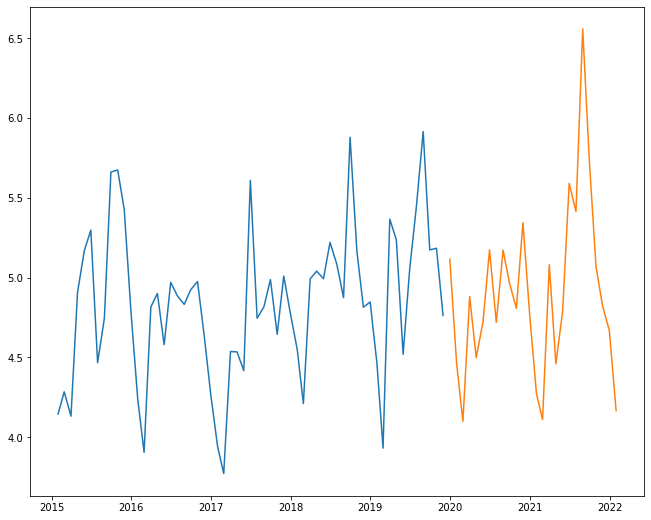

In [ ]:
#Dividimos en test de entrenamiento y validación
train, test = train_test_split(rend_sin_guerra, shuffle=False, test_size=0.3)
plt.plot(train)
plt.plot(test)

In [ ]:
#Aplicamos AUTO ARIMA
arima_model = auto_arima(train, start_p=0, d=1, start_q=0, max_p=12, max_d=4, max_q=4, start_P=0, D=1, start_Q=0, max_P=4, max_D=4,max_Q=4, m=12, seasonal=True, error_action='warn', trace=True, supress_warnings=True, stepwise=True,random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=78.101, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=69.846, Time=0.13 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=56.135, Time=0.21 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=61.036, Time=0.05 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=57.496, Time=0.34 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=inf, Time=nan sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=56.960, Time=0.29 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=nan sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=71.232, Time=0.14 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=57.355, Time=0.42 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=56.835, Time=0.31 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=68.670, Time=0.18 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=58.500, Time=0.54 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=57.868, Time=0.50 sec

Best model:  ARIMA(0,1,1)(0,1,1)[12]          
Total f

In [ ]:
best_model = SARIMAX(rend_sin_guerra, order=(0, 1, 1), seasonal_order=(0, 1, 1, 12)).fit(dis=-1)
print(best_model.summary())

                                 Statespace Model Results                                 
Dep. Variable:                        rendimiento   No. Observations:                   85
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 -37.605
Date:                            Wed, 11 May 2022   AIC                             81.210
Time:                                    03:36:13   BIC                             88.040
Sample:                                01-31-2015   HQIC                            83.929
                                     - 01-31-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7808      0.094     -8.316      0.000      -0.965      -0.597
ma.S.L12      -0.5953      0.168   

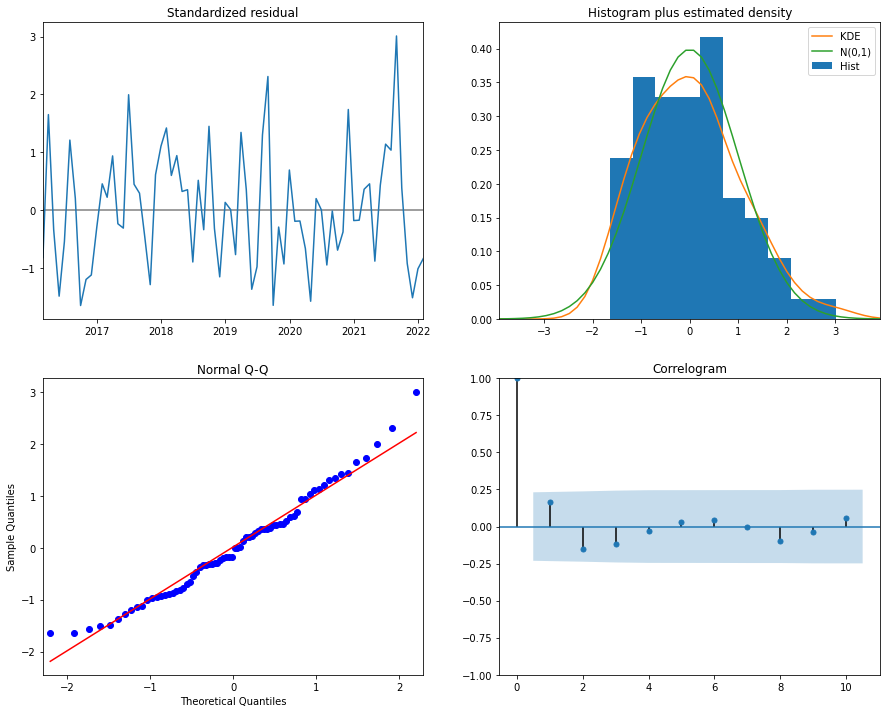

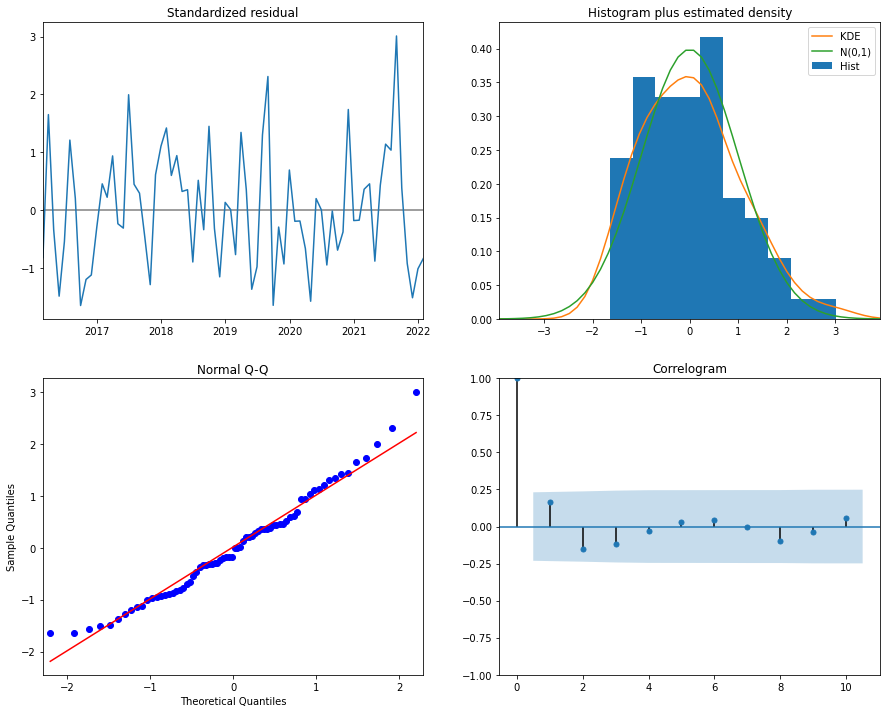

In [ ]:
#Gráfico de residuos
best_model.plot_diagnostics(figsize=(15,12))

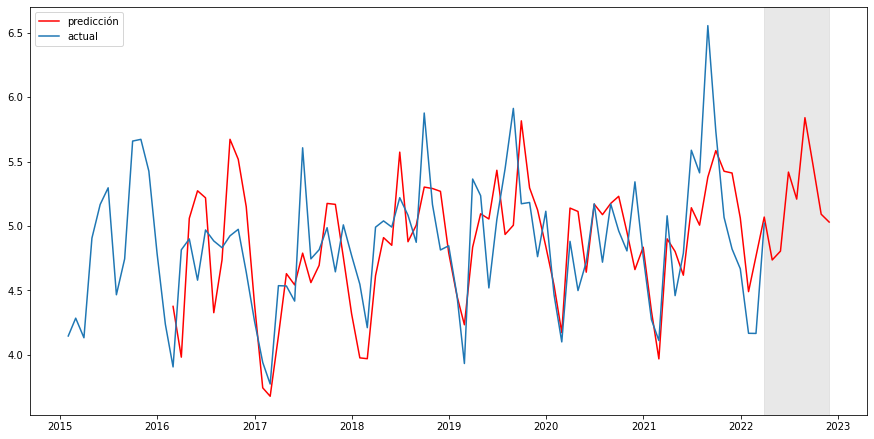

In [ ]:
rend_sin_guerra['arima_model'] = best_model.fittedvalues
rend_sin_guerra['arima_model'][:s+d] = np.NaN
forecast = best_model.predict(start=rend_sin_guerra.shape[0], end=rend_sin_guerra.shape[0] + 8)
forecast = rend_sin_guerra['arima_model'].append(forecast)
plt.figure(figsize=(15, 7.5))
plt.plot(forecast, color='r', label='predicción')
plt.axvspan(mad.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
plt.plot(mad['rendimiento'], label='actual')
plt.legend()
plt.show()

In [ ]:
#Impacto real en el rendimiento
pred_sin_guerra_feb_mar = best_model.predict(start='2022-02-28', end='2022-03-31' )
pred_sin_guerra_feb_mar =pd.DataFrame(pred_sin_guerra_feb_mar, columns=['Rendimiento Estimado sin guerra'])
pred_sin_guerra = best_model.predict(start='2022-04-30', end='2022-12-31' )
feb_mar = pd.DataFrame({'Rendimiento Real':[4.1665, 5.0220]}, index=['2022-02-28','2022-03-31'])
feb_mar.index = pd.to_datetime(feb_mar.index)
tabla = pd.concat([feb_mar,pred_sin_guerra_feb_mar], axis=1)
tabla['diferencia'] =  tabla['Rendimiento Real'] - tabla['Rendimiento Estimado sin guerra']
print(tabla)

            Rendimiento Real  Rendimiento Estimado sin guerra  diferencia
2022-02-28            4.1665                         4.141822    0.024678
2022-03-31            5.0220                         5.070263   -0.048263


In [ ]:
tabla.to_excel('Impacto real en el rendimiento del mad.xlsx')
print('File successfully exported into Excel File')

File successfully exported into Excel File


In [ ]:
#Impacto potencial en el rendimiento
tabla = pd.concat([pred_guerra, pred_sin_guerra], axis=1)
tabla.columns = ['Con guerra', 'Sin guerra']
tabla['diferencia'] = tabla['Con guerra'] - tabla['Sin guerra']
print(tabla)

            Con guerra  Sin guerra  diferencia
2022-04-30    4.735572    4.737157   -0.001585
2022-05-31    4.800494    4.805678   -0.005184
2022-06-30    5.412372    5.419483   -0.007111
2022-07-31    5.201418    5.209719   -0.008301
2022-08-31    5.826026    5.841904   -0.015877
2022-09-30    5.471536    5.478739   -0.007203
2022-10-31    5.088139    5.092405   -0.004266
2022-11-30    5.026792    5.031410   -0.004618
2022-12-31    4.833559    4.838180   -0.004621


In [ ]:
tabla.to_excel('Impacto potencial en el rendimiento del mad.xlsx')
print('File successfully exported into Excel File')

File successfully exported into Excel File


# Palto

In [ ]:
palto = pd.read_excel("/content/drive/MyDrive/Agrobanco/Fertilizantes/cultivos 2015-2022_drive.xlsx", parse_dates=True, index_col='fecha', sheet_name='palto')
palto.dropna(inplace=True)
palto.head()

produccion  precio_chacra   colocacion  provision       interes  \
fecha                                                                         
2015-01-31   15544.659       1.821096  26604721.39  357433.56  178603.07007   
2015-02-28   16103.615       2.003355  26885124.81  380261.25   50240.17000   
2015-03-31   29344.164       2.083833  28026741.04  538134.81  148879.25080   
2015-04-30   46839.810       2.352771  28523247.94  508057.09  292181.31864   
2015-05-31   69438.457       2.251321  30566829.84  823023.99  106857.24000   

            tipo_cambio  fertil_importacion  urea_importacion  \
fecha                                                           
2015-01-31       3.0610       107453.849500         20142.518   
2015-02-28       3.0930        80187.485591         34887.990   
2015-03-31       3.0832        93405.833000         63697.800   
2015-04-30       3.1210        82563.778929         32069.080   
2015-05-31       3.1434        63602.246120         24125.110   

            nitrato_importaciones  sulf_importacion   
fecha                                                 
2015-01-31               10887.08       24430.514500  
2015-02-28                   0.00       27865.295591  
2015-03-31                   0.00        7013.950000  
2015-04-30               30705.66        4751.748929  
2015-05-31                8979.23       11672.289281

## Producción

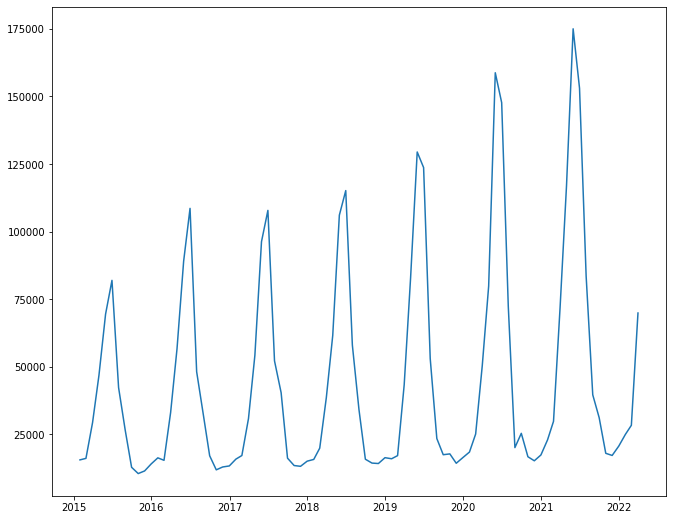

In [ ]:
plt.plot(palto['produccion'])

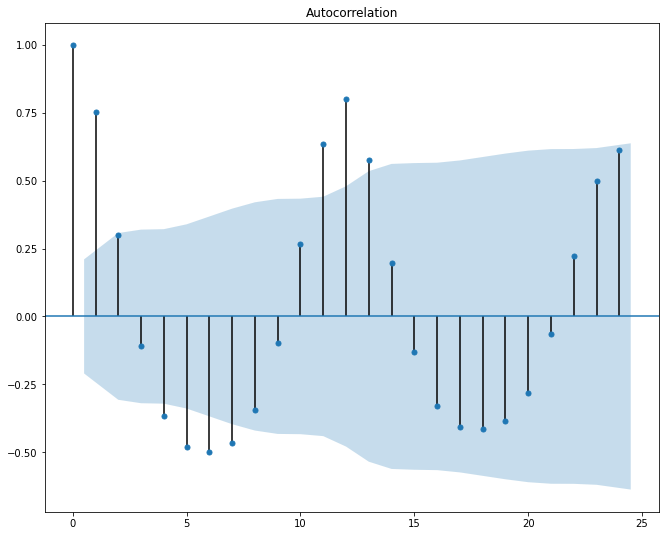

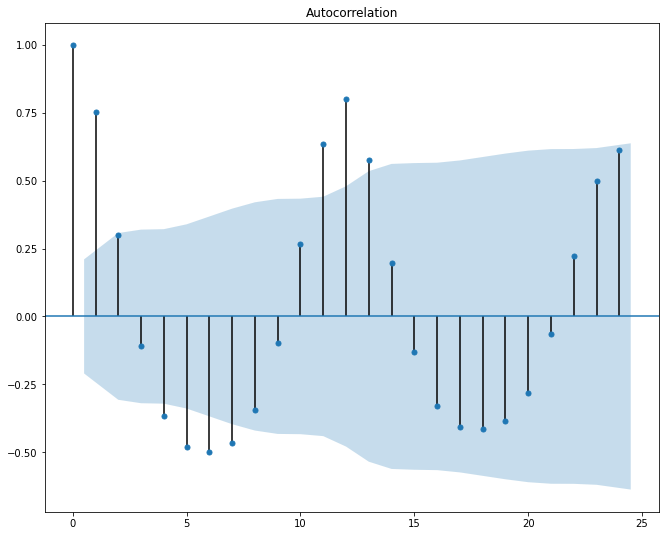

In [ ]:
#Función de autocorrelación para la producción
from statsmodels.graphics.tsaplots import plot_acf 
plot_acf(palto['produccion'], lags=24, alpha=0.05)

In [ ]:
from statsmodels.tsa.stattools import adfuller
test_adfuller = adfuller(palto['produccion'])
print("The p-value for the ADF test is ", test_adfuller[1])

The p-value for the ADF test is  0.9934583934053899


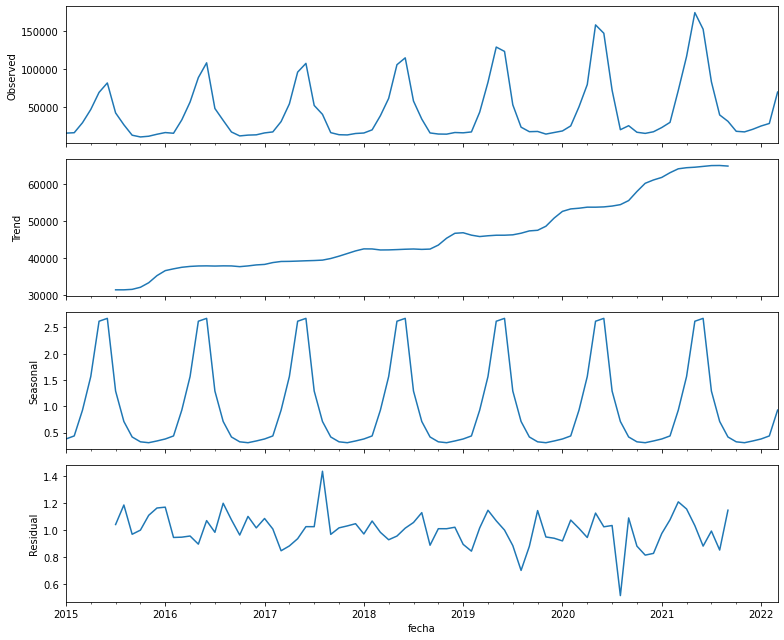

In [ ]:
#Descomposición estacional
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

decomposition = sm.tsa.seasonal_decompose(palto['produccion'], model='multiplicative')
fig = decomposition.plot()
plt.show()

In [ ]:
rcParams['figure.figsize'] = 6, 4

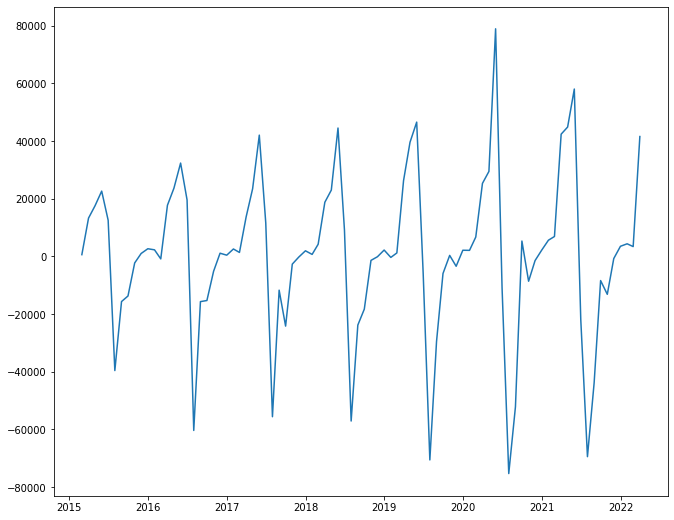

In [ ]:
#Ajustamos la producción para eliminar su estacionalidad
prod_ajustado = palto['produccion'].diff()
prod_ajustado.dropna(inplace=True)
plt.plot(prod_ajustado)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
test_adfuller = adfuller(prod_ajustado)
print("The p-value for the ADF test is ", test_adfuller[1])

The p-value for the ADF test is  1.0644878973464226e-05


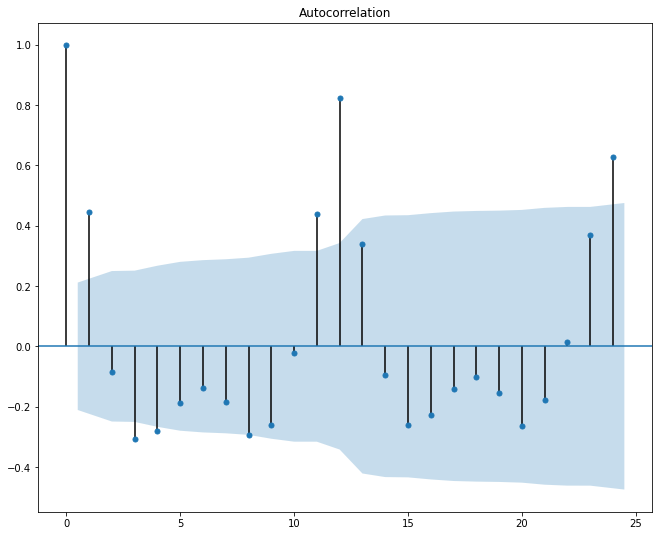

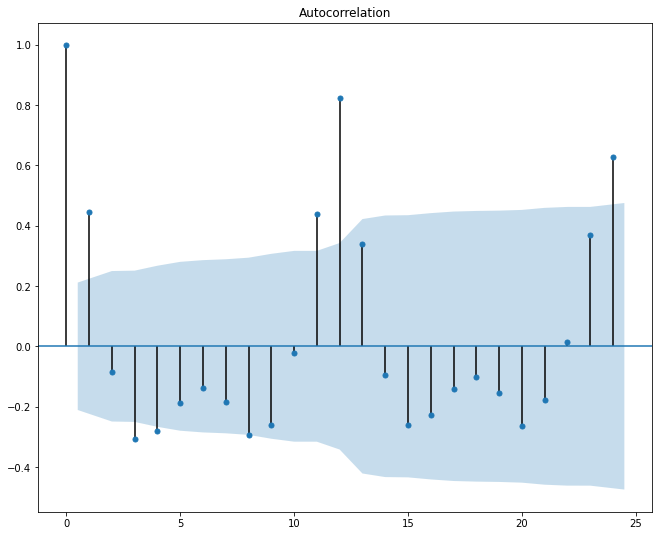

In [ ]:
#Función de autocorrelación para la producción con retraso
from statsmodels.graphics.tsaplots import plot_acf 
plot_acf(prod_ajustado, lags=24, alpha=0.05)

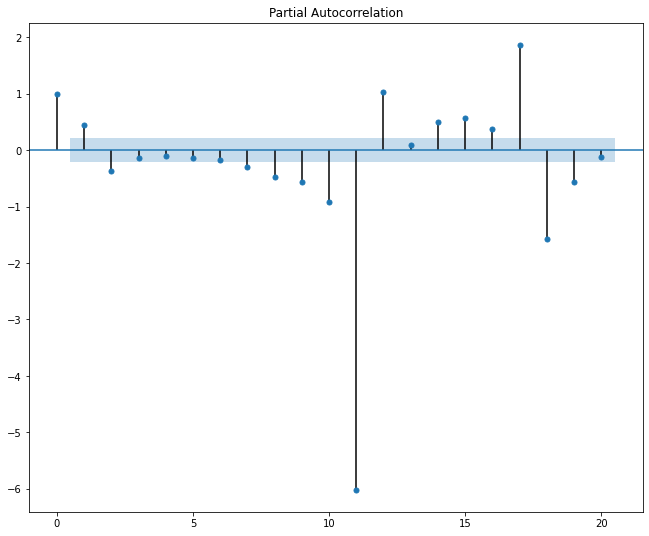

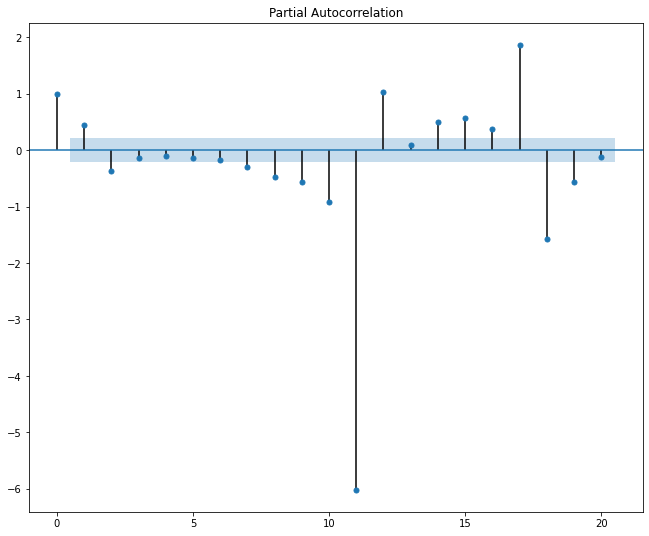

In [ ]:
#Función de autocorrelación parcial para la producción con retraso
from statsmodels.graphics.tsaplots import plot_pacf 
plot_pacf(prod_ajustado, lags=20, alpha=0.05)

In [ ]:
p = range(0, 4, 1)
d = 1
q = range(0, 4, 1)
P = range(0, 4, 1)
D = 1
Q = range(0, 4, 1)
s = 12
parameters = product(p, q, P, Q)
parameters_list = list(parameters)
print(len(parameters_list))


256


Hipótesis 1: Modelo considerando el efecto de la guerra

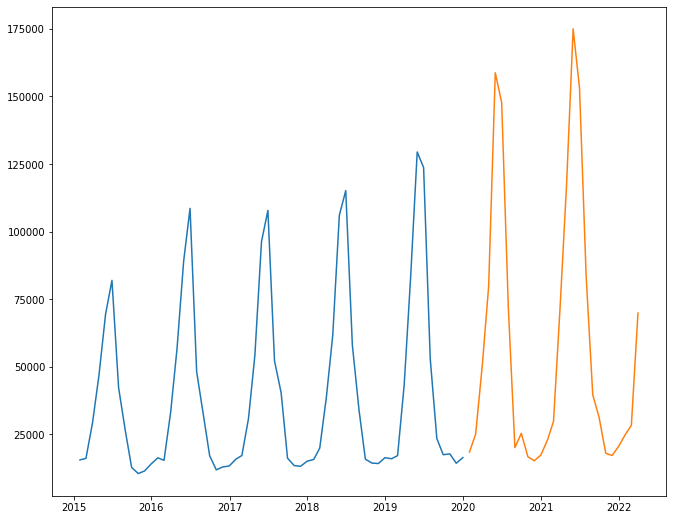

In [ ]:
#Dividimos en test de entrenamiento y validación
train, test = train_test_split(palto['produccion'], shuffle=False, test_size=0.3)
plt.plot(train)
plt.plot(test)

In [ ]:
#Aplicamos AUTO ARIMA
arima_model = auto_arima(train, start_p=0, d=1, start_q=0, max_p=12, max_d=4, max_q=4, start_P=0, D=1, start_Q=0, max_P=4, max_D=4,max_Q=4, m=12, seasonal=True, error_action='warn', trace=True, supress_warnings=True, stepwise=True,random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=964.241, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=959.049, Time=0.12 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=956.684, Time=0.44 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=965.804, Time=0.03 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=960.186, Time=0.85 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=inf, Time=nan sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=958.995, Time=0.14 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=nan sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=970.725, Time=0.08 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=953.258, Time=0.86 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=962.564, Time=0.07 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=958.044, Time=1.27 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=inf, Time=nan sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=956.720, Time=0.24 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=inf, 

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
best_model = SARIMAX(palto['produccion'], order=(2, 1, 2), seasonal_order=(0, 1, 1, 12)).fit(dis=-1)
print(best_model.summary())

                                 Statespace Model Results                                 
Dep. Variable:                         produccion   No. Observations:                   87
Model:             SARIMAX(2, 1, 2)x(0, 1, 1, 12)   Log Likelihood                -767.661
Date:                            Wed, 11 May 2022   AIC                           1547.323
Time:                                    04:06:07   BIC                           1561.147
Sample:                                01-31-2015   HQIC                          1552.837
                                     - 03-31-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5428      0.636      0.854      0.393      -0.703       1.789
ar.L2         -0.2662      0.326   

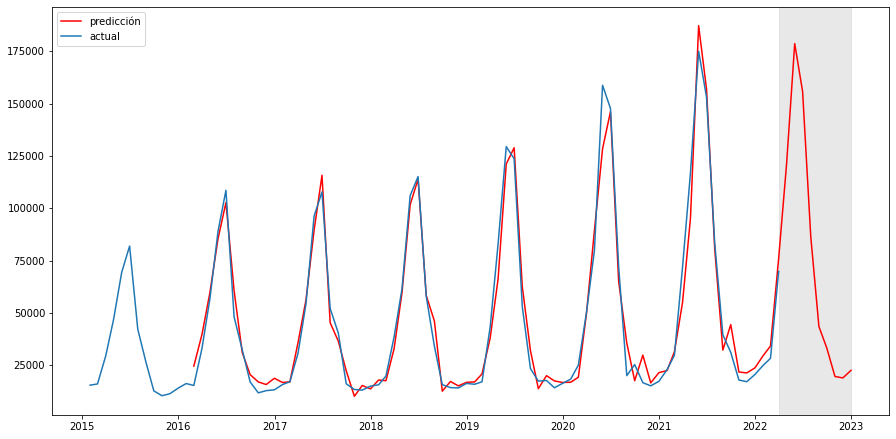

In [ ]:
palto['arima_model'] = best_model.fittedvalues
palto['arima_model'][:s+d] = np.NaN
forecast = best_model.predict(start=palto.shape[0], end=palto.shape[0] + 8)
forecast = palto['arima_model'].append(forecast)
plt.figure(figsize=(15, 7.5))
plt.plot(forecast, color='r', label='predicción')
plt.axvspan(palto.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
plt.plot(palto['produccion'], label='actual')
plt.legend()
plt.show()

In [ ]:
pred_guerra = best_model.predict(start='2022-04-30', end='2022-12-31' )
print(pred_guerra)

2022-04-30    120898.142584
2022-05-31    178622.696686
2022-06-30    155740.271823
2022-07-31     86465.428637
2022-08-31     43530.132463
2022-09-30     33226.707316
2022-10-31     19674.196386
2022-11-30     18986.786784
2022-12-31     22617.766282
Freq: M, dtype: float64


Hipótesis 2: Sin considerar el efecto de la guerra

In [ ]:
sin_guerra = palto['produccion'].drop(['2022-02-28','2022-03-31'])
sin_guerra.tail()

fecha
2021-09-30    31177.405
2021-10-31    17976.457
2021-11-30    17185.116
2021-12-31    20646.605
2022-01-31    24972.757
Name: produccion, dtype: float64

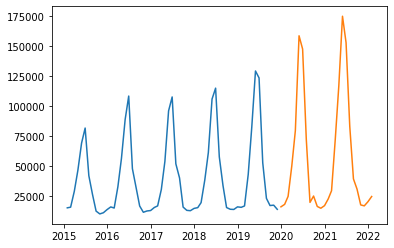

In [ ]:
#Dividimos en test de entrenamiento y validación
train, test = train_test_split(sin_guerra, shuffle=False, test_size=0.3)
plt.plot(train)
plt.plot(test)

In [ ]:
#Aplicamos AUTO ARIMA
arima_model = auto_arima(train, start_p=0, d=1, start_q=0, max_p=12, max_d=4, max_q=4, start_P=0, D=1, start_Q=0, max_P=4, max_D=4,max_Q=4, m=12, seasonal=True, error_action='warn', trace=True, supress_warnings=True, stepwise=True,random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=944.761, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=939.764, Time=0.11 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=937.451, Time=0.44 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=946.329, Time=0.03 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=940.942, Time=0.27 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=inf, Time=nan sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=939.725, Time=0.12 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=nan sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=944.198, Time=0.07 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=934.146, Time=1.01 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=943.194, Time=0.07 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=938.880, Time=0.45 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=inf, Time=nan sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=937.528, Time=0.22 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=inf, 

In [ ]:
best_model = SARIMAX(sin_guerra, order=(2, 1, 1), seasonal_order=(0, 1, 1, 12)).fit(dis=-1)
print(best_model.summary())

                                 Statespace Model Results                                 
Dep. Variable:                         produccion   No. Observations:                   85
Model:             SARIMAX(2, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -747.191
Date:                            Wed, 11 May 2022   AIC                           1504.382
Time:                                    04:07:16   BIC                           1515.765
Sample:                                01-31-2015   HQIC                          1508.914
                                     - 01-31-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4773      0.138      3.458      0.001       0.207       0.748
ar.L2         -0.2386      0.141   

In [ ]:
#Gráfico de residuos
best_model.plot_diagnostics(figsize=(15,12))

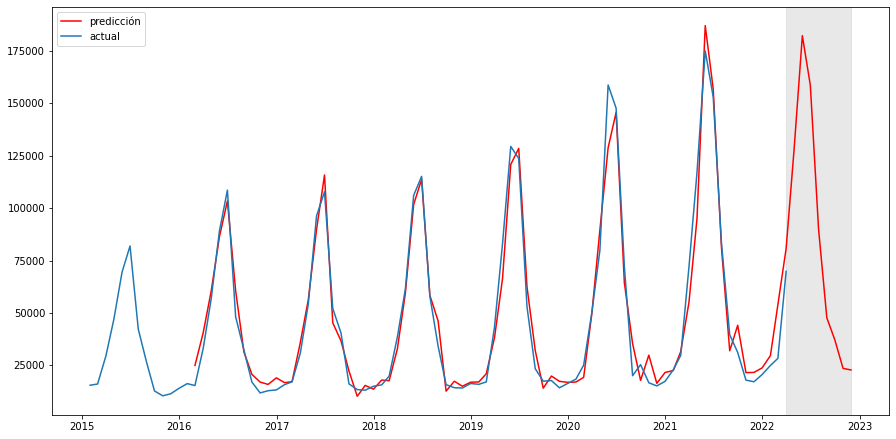

In [ ]:
sin_guerra['arima_model'] = best_model.fittedvalues
sin_guerra['arima_model'][:s+d] = np.NaN
forecast = best_model.predict(start=sin_guerra.shape[0], end=sin_guerra.shape[0] + 8)
forecast = sin_guerra['arima_model'].append(forecast)
plt.figure(figsize=(15, 7.5))
plt.plot(forecast, color='r', label='predicción')
plt.axvspan(palto.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
plt.plot(palto['produccion'], label='actual')
plt.legend()
plt.show()

In [ ]:
#Impacto real en la producción
pred_sin_guerra_feb_mar = best_model.predict(start='2022-02-28', end='2022-03-31' )
pred_sin_guerra_feb_mar =pd.DataFrame(pred_sin_guerra_feb_mar, columns=['Producción Estimada sin guerra'])
pred_sin_guerra = best_model.predict(start='2022-04-30', end='2022-12-31' )
feb_mar = pd.DataFrame({'Producción Real':[28332.779, 69862.465]}, index=['2022-02-28','2022-03-31'])
feb_mar.index = pd.to_datetime(feb_mar.index)
tabla = pd.concat([feb_mar,pred_sin_guerra_feb_mar], axis=1)
tabla['diferencia'] =  tabla['Producción Real'] - tabla['Producción Estimada sin guerra']
print(tabla)

            Producción Real  Producción Estimada sin guerra    diferencia
2022-02-28        28332.779                    34323.305321  -5990.526321
2022-03-31        69862.465                    80690.896271 -10828.431271


In [ ]:
tabla.to_excel('Impacto real en la Producción palto.xlsx')
print('File successfully exported into Excel File')

File successfully exported into Excel File


In [ ]:
#Impacto potencial en la producción
tabla = pd.concat([pred_guerra, pred_sin_guerra], axis=1)
tabla.columns = ['Con guerra', 'Sin guerra']
tabla['diferencia'] = tabla['Con guerra'] - tabla['Sin guerra']
print(tabla)

               Con guerra     Sin guerra   diferencia
2022-04-30  120898.142584  128024.440482 -7126.297898
2022-05-31  178622.696686  182245.103566 -3622.406881
2022-06-30  155740.271823  158640.528897 -2900.257074
2022-07-31   86465.428637   89978.336942 -3512.908305
2022-08-31   43530.132463   47688.384990 -4158.252527
2022-09-30   33226.707316   37216.930930 -3990.223615
2022-10-31   19674.196386   23566.376134 -3892.179749
2022-11-30   18986.786784   22821.501309 -3834.714525
2022-12-31   22617.766282   26459.031026 -3841.264744


In [ ]:
tabla.to_excel('Impacto Potencial en la producción de palto.xlsx')
print('File exported into Excel File')

File exported into Excel File


# PAPA

In [ ]:
papa = pd.read_excel("/content/drive/MyDrive/Agrobanco/Fertilizantes/cultivos 2015-2022.xlsx", parse_dates=True, index_col='fecha', sheet_name='papa')
papa.drop(columns=['intencion_siembra','superficie_sembrada'], inplace=True)
papa.dropna(inplace=True)
papa.tail()

produccion  sup_cosechada  rendimiento  precio_chacra  \
fecha                                                               
2021-11-30  262591.469       12977.40    20.234521       0.918937   
2021-12-31  298636.980       15721.25    18.995753       0.952563   
2022-01-31  298795.561       16410.50    18.207584       1.025512   
2022-02-28  357089.874       20970.00    17.028606       1.180755   
2022-03-31  542047.299       32650.00    16.601755       1.296320   

            camp_grande   colocacion  provision    interes  tipo_cambio  \
fecha                                                                     
2021-11-30            1  16888354.52  658741.13  254418.82       4.0538   
2021-12-31            1  17930347.07  680717.76  302254.55       3.9852   
2022-01-31            1  17160358.40  675348.90  314467.31       3.8370   
2022-02-28            1  17193435.78  673888.36  395080.55       3.7730   
2022-03-31            1  17532364.30  672526.60  423940.88       3.6760   

            fertil_importacion  urea_importacion  nitrato_importaciones  \
fecha                                                                     
2021-11-30       103379.531000         20340.780              41365.280   
2021-12-31       175380.944000         18137.200              59836.440   
2022-01-31        57584.662206         12634.890               1010.000   
2022-02-28        57323.496000           528.650                  0.025   
2022-03-31        83691.735500          2135.441              11929.880   

            sulf_importacion   
fecha                          
2021-11-30          16368.991  
2021-12-31          25993.802  
2022-01-31          31217.990  
2022-02-28          46381.100  
2022-03-31          65133.850

## Producción

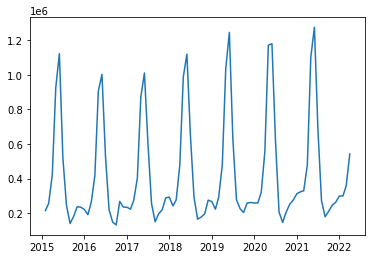

In [ ]:
plt.plot(papa['produccion'])

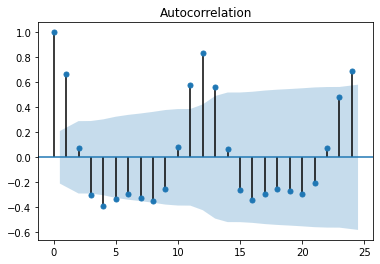

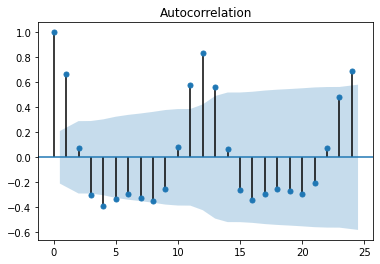

In [ ]:
#Función de autocorrelación para la producción
from statsmodels.graphics.tsaplots import plot_acf 
plot_acf(papa['produccion'], lags=24, alpha=0.05)

In [ ]:
from statsmodels.tsa.stattools import adfuller
test_adfuller = adfuller(papa['produccion'])
print("The p-value for the ADF test is ", test_adfuller[1])

The p-value for the ADF test is  0.957414391668856


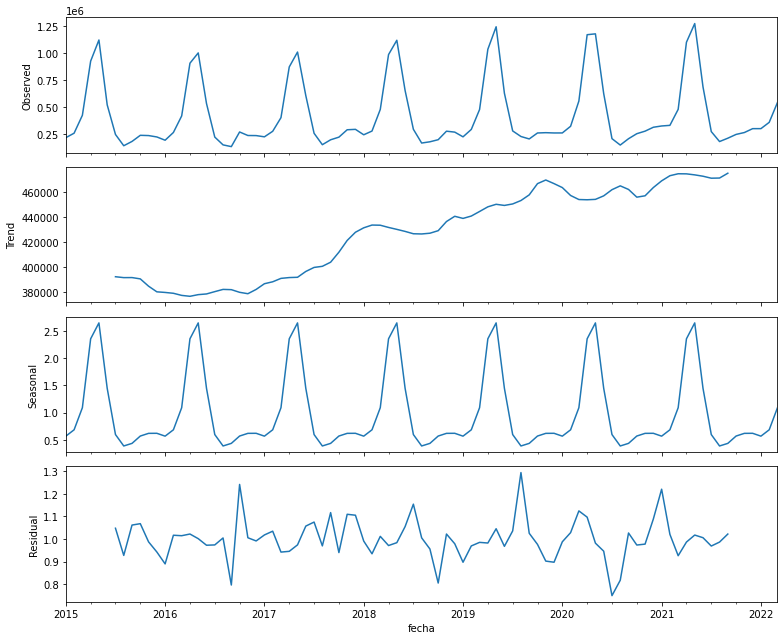

In [ ]:
#Descomposición estacional
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

decomposition = sm.tsa.seasonal_decompose(papa['produccion'], model='multiplicative')
fig = decomposition.plot()
plt.show()

In [ ]:
rcParams['figure.figsize'] = 6, 4

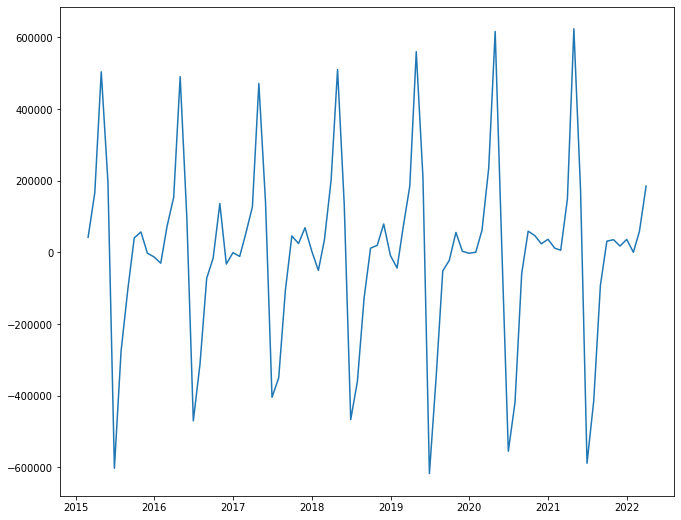

In [ ]:
#Ajustamos la producción para eliminar su estacionalidad
prod_ajustado = papa['produccion'].diff()
prod_ajustado.dropna(inplace=True)
plt.plot(prod_ajustado)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
test_adfuller = adfuller(prod_ajustado)
print("The p-value for the ADF test is ", test_adfuller[1])

The p-value for the ADF test is  2.076945873049765e-30


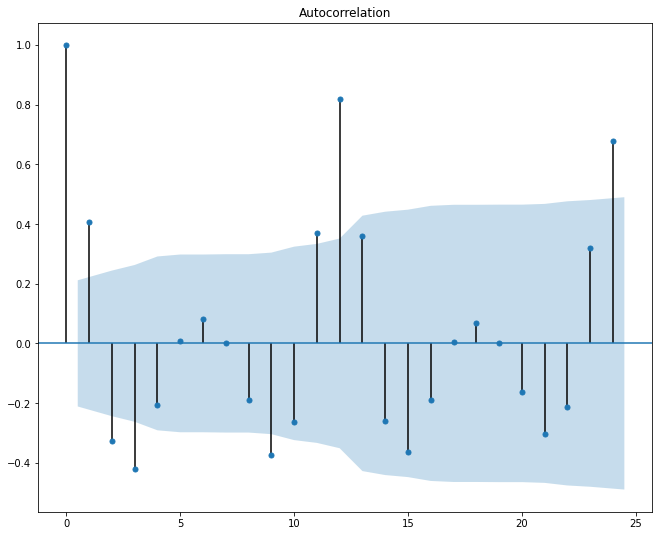

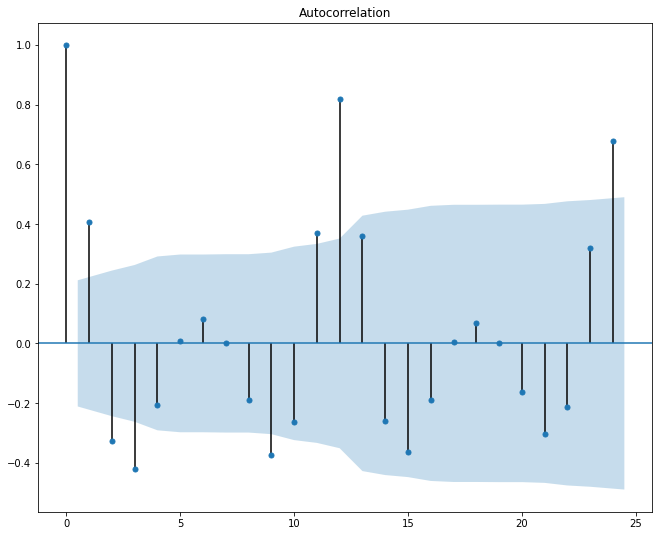

In [ ]:
#Función de autocorrelación para la producción con retraso
from statsmodels.graphics.tsaplots import plot_acf 
plot_acf(prod_ajustado, lags=24, alpha=0.05)

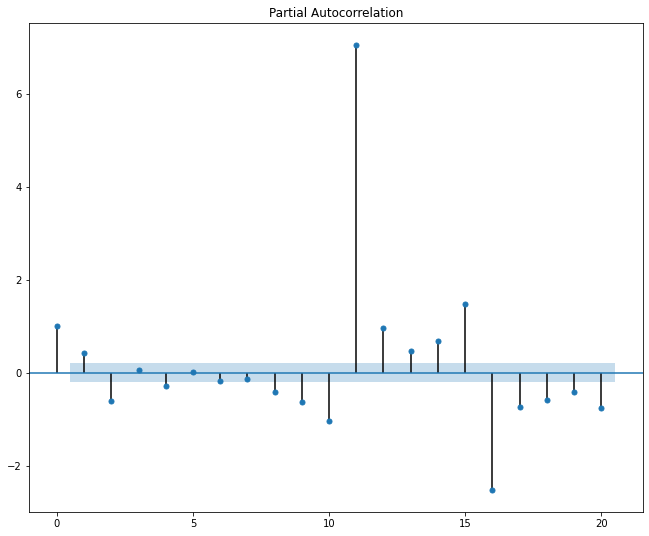

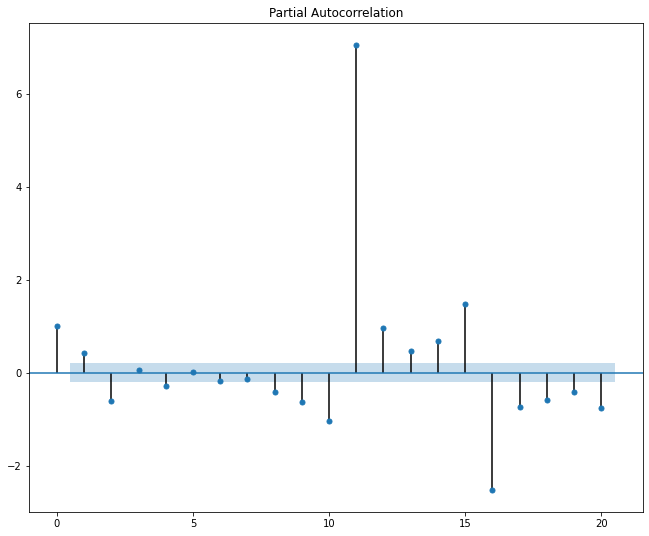

In [ ]:
#Función de autocorrelación parcial para la producción con retraso
from statsmodels.graphics.tsaplots import plot_pacf 
plot_pacf(prod_ajustado, lags=20, alpha=0.05)

In [ ]:
def optimize_SARIMA(parameters_list, d, D, s, exog):
    """
        Return dataframe with parameters, corresponding AIC and SSE
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order
        D - seasonal integration order
        s - length of season
        exog - the exogenous variable
    """
    
    results = []
    
    for param in tqdm_notebook(parameters_list):
        try: 
            model = SARIMAX(exog, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
            
        aic = model.aic
        results.append([param, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)x(P,Q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [ ]:
p = range(0, 4, 1)
d = 1
q = range(0, 4, 1)
P = range(0, 4, 1)
D = 1
Q = range(0, 4, 1)
s = 12
parameters = product(p, q, P, Q)
parameters_list = list(parameters)
print(len(parameters_list))


256


In [ ]:
result_df = optimize_SARIMA(parameters_list, 1, 1, 12, arroz['produccion'])
result_df

In [ ]:
#Gráfico de residuos
best_model.plot_diagnostics(figsize=(15,12))

Hipótesis 1: Modelo considerando el efecto de la guerra

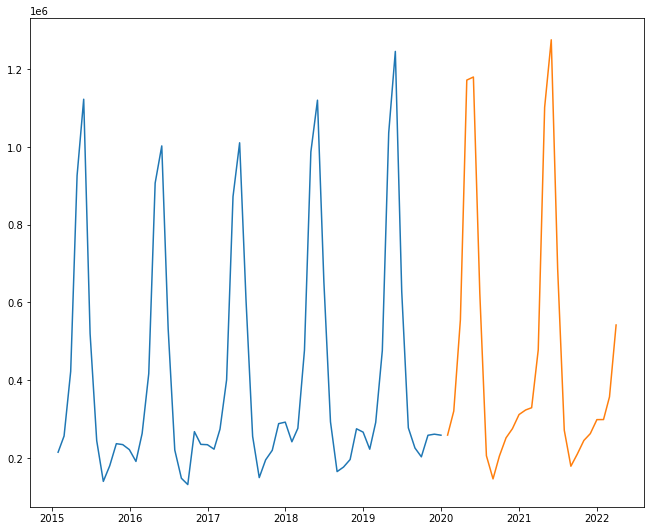

In [ ]:
#Dividimos en test de entrenamiento y validación
train, test = train_test_split(papa['produccion'], shuffle=False, test_size=0.3)
plt.plot(train)
plt.plot(test)

In [ ]:
#Aplicamos AUTO ARIMA
arima_model = auto_arima(train, start_p=0, d=1, start_q=0, max_p=12, max_d=4, max_q=4, start_P=0, D=1, start_Q=0, max_P=4, max_D=4,max_Q=4, m=12, seasonal=True, error_action='warn', trace=True, supress_warnings=True, stepwise=True,random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1162.341, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1152.211, Time=0.12 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1148.813, Time=0.18 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1154.222, Time=0.03 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1150.617, Time=0.52 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=inf, Time=nan sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1149.568, Time=0.13 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=nan sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1161.452, Time=0.08 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1150.610, Time=0.29 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=1150.613, Time=0.22 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=1151.701, Time=0.15 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=1152.609, Time=0.45 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=1151.112, Time=0.21 sec

Best model:  ARIMA(0,1,1)(0,1,

In [ ]:
best_model = SARIMAX(papa['produccion'], order=(0, 1, 1), seasonal_order=(0, 1, 1, 12)).fit(dis=-1)
print(best_model.summary())

                                 Statespace Model Results                                 
Dep. Variable:                         produccion   No. Observations:                   87
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -906.204
Date:                            Wed, 11 May 2022   AIC                           1818.408
Time:                                    04:22:15   BIC                           1825.320
Sample:                                01-31-2015   HQIC                          1821.165
                                     - 03-31-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4517      0.080     -5.679      0.000      -0.608      -0.296
ma.S.L12      -0.1591      0.050   

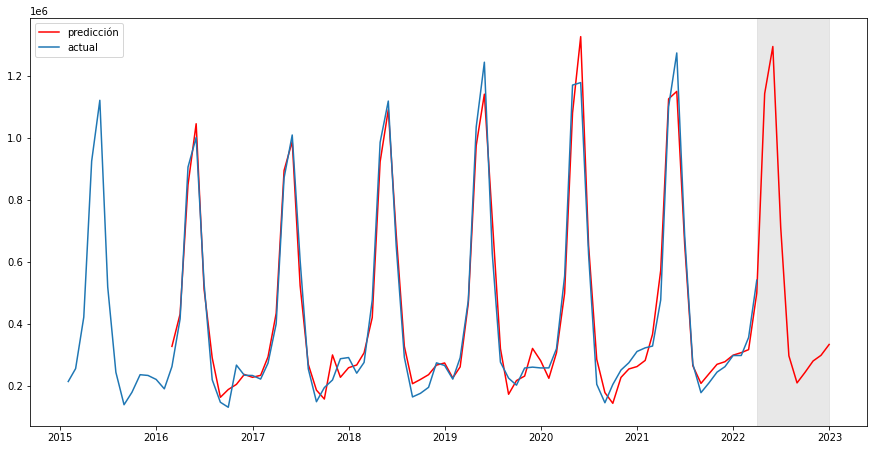

In [ ]:
papa['arima_model'] = best_model.fittedvalues
papa['arima_model'][:s+d] = np.NaN
forecast = best_model.predict(start=papa.shape[0], end=papa.shape[0] + 8)
forecast = papa['arima_model'].append(forecast)
plt.figure(figsize=(15, 7.5))
plt.plot(forecast, color='r', label='predicción')
plt.axvspan(papa.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
plt.plot(papa['produccion'], label='actual')
plt.legend()
plt.show()

In [ ]:
pred_guerra = best_model.predict(start='2022-04-30', end='2022-12-31' )
print(pred_guerra)

2022-04-30    1.144350e+06
2022-05-31    1.296394e+06
2022-06-30    7.119950e+05
2022-07-31    2.977313e+05
2022-08-31    2.103280e+05
2022-09-30    2.439572e+05
2022-10-31    2.810548e+05
2022-11-30    2.992973e+05
2022-12-31    3.343812e+05
Freq: M, dtype: float64


Hipótesis 2: Sin considerar el efecto de la guerra

In [ ]:
sin_guerra = papa['produccion'].drop(['2022-02-28','2022-03-31'])
sin_guerra.tail()

fecha
2021-09-30    209902.470
2021-10-31    245097.347
2021-11-30    262591.469
2021-12-31    298636.980
2022-01-31    298795.561
Name: produccion, dtype: float64

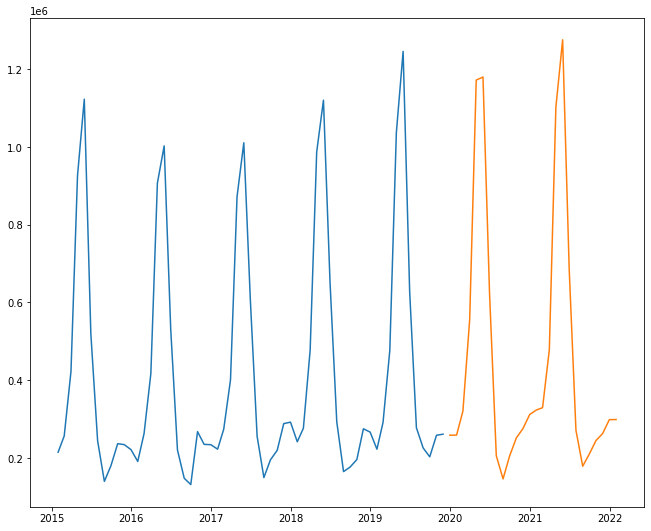

In [ ]:
#Dividimos en test de entrenamiento y validación
train, test = train_test_split(sin_guerra, shuffle=False, test_size=0.3)
plt.plot(train)
plt.plot(test)

In [ ]:
#Aplicamos AUTO ARIMA
arima_model = auto_arima(train, start_p=0, d=1, start_q=0, max_p=12, max_d=4, max_q=4, start_P=0, D=1, start_Q=0, max_P=4, max_D=4,max_Q=4, m=12, seasonal=True, error_action='warn', trace=True, supress_warnings=True, stepwise=True,random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1138.691, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1128.617, Time=0.14 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1125.275, Time=0.17 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1130.699, Time=0.03 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1127.089, Time=0.31 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=inf, Time=nan sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1126.022, Time=0.12 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=nan sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1140.652, Time=0.07 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1127.124, Time=0.30 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=1127.113, Time=0.21 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=1128.125, Time=0.14 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=1129.112, Time=0.45 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=1127.974, Time=0.19 sec

Best model:  ARIMA(0,1,1)(0,1,

In [ ]:
best_model = SARIMAX(sin_guerra, order=(0, 1, 1), seasonal_order=(0, 1, 1, 12)).fit(dis=-1)
print(best_model.summary())

                                 Statespace Model Results                                 
Dep. Variable:                         produccion   No. Observations:                   85
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -882.019
Date:                            Wed, 11 May 2022   AIC                           1770.038
Time:                                    04:24:02   BIC                           1776.868
Sample:                                01-31-2015   HQIC                          1772.757
                                     - 01-31-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4545      0.079     -5.745      0.000      -0.610      -0.299
ma.S.L12      -0.1549      0.051   

In [ ]:
#Gráfico de residuos
best_model.plot_diagnostics(figsize=(15,12))

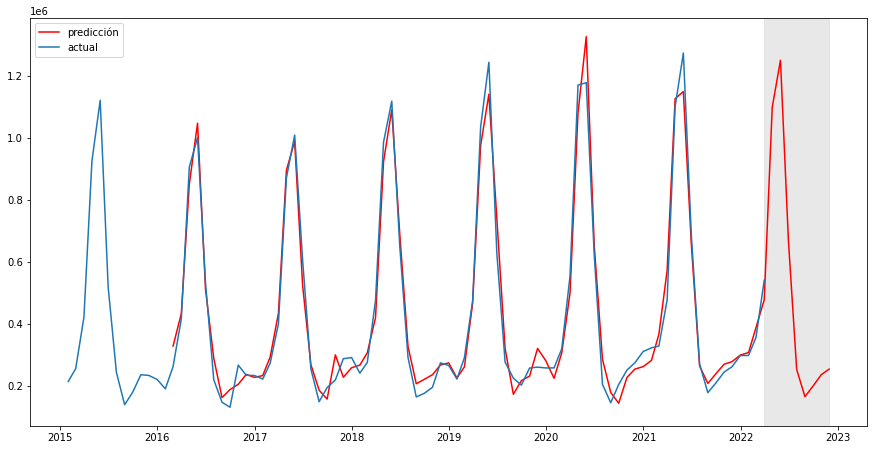

In [ ]:
sin_guerra['arima_model'] = best_model.fittedvalues
sin_guerra['arima_model'][:s+d] = np.NaN
forecast = best_model.predict(start=sin_guerra.shape[0], end=sin_guerra.shape[0] + 8)
forecast = sin_guerra['arima_model'].append(forecast)
plt.figure(figsize=(15, 7.5))
plt.plot(forecast, color='r', label='predicción')
plt.axvspan(papa.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
plt.plot(papa['produccion'], label='actual')
plt.legend()
plt.show()

In [ ]:
#Impacto real en la producción
pred_sin_guerra_feb_mar = best_model.predict(start='2022-02-28', end='2022-03-31' )
pred_sin_guerra_feb_mar =pd.DataFrame(pred_sin_guerra_feb_mar, columns=['Producción Estimada sin guerra'])
pred_sin_guerra = best_model.predict(start='2022-04-30', end='2022-12-31' )
feb_mar = pd.DataFrame({'Producción Real':[357089.874, 542047.299]}, index=['2022-02-28','2022-03-31'])
feb_mar.index = pd.to_datetime(feb_mar.index)
tabla = pd.concat([feb_mar,pred_sin_guerra_feb_mar], axis=1)
tabla['diferencia'] =  tabla['Producción Real'] - tabla['Producción Estimada sin guerra']
print(tabla)

            Producción Real  Producción Estimada sin guerra    diferencia
2022-02-28       357089.874                   317604.783438  39485.090562
2022-03-31       542047.299                   478576.264752  63471.034248


In [ ]:
tabla.to_excel('Impacto real en la Producción papa.xlsx')
print('File successfully exported into Excel File')

File successfully exported into Excel File


In [ ]:
#Impacto potencial en la producción
tabla = pd.concat([pred_guerra, pred_sin_guerra], axis=1)
tabla.columns = ['Con guerra', 'Sin guerra']
tabla['diferencia'] = tabla['Con guerra'] - tabla['Sin guerra']
print(tabla)

              Con guerra    Sin guerra    diferencia
2022-04-30  1.144350e+06  1.099742e+06  44607.994420
2022-05-31  1.296394e+06  1.252237e+06  44156.910656
2022-06-30  7.119950e+05  6.677302e+05  44264.790805
2022-07-31  2.977313e+05  2.533932e+05  44338.135649
2022-08-31  2.103280e+05  1.658636e+05  44464.362794
2022-09-30  2.439572e+05  1.994715e+05  44485.633580
2022-10-31  2.810548e+05  2.365196e+05  44535.152357
2022-11-30  2.992973e+05  2.547420e+05  44555.312299
2022-12-31  3.343812e+05  2.898770e+05  44504.250181


In [ ]:
tabla.to_excel('Impacto Potencial en la producción papa.xlsx')
print('File exported into Excel File')

File exported into Excel File


## Rendimiento

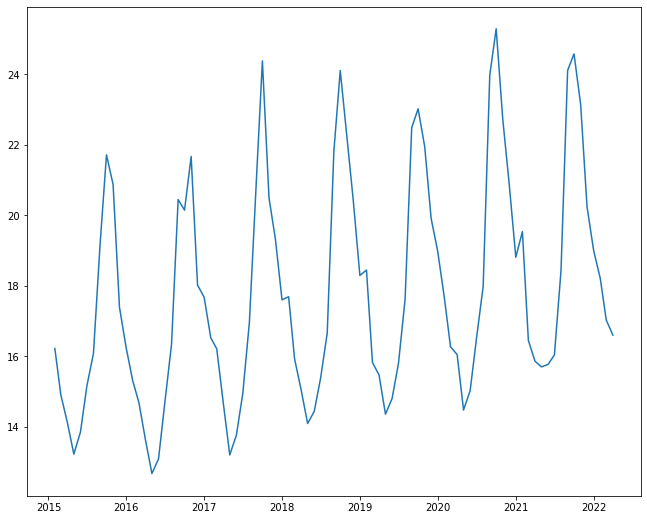

In [ ]:
plt.plot(papa['rendimiento'])

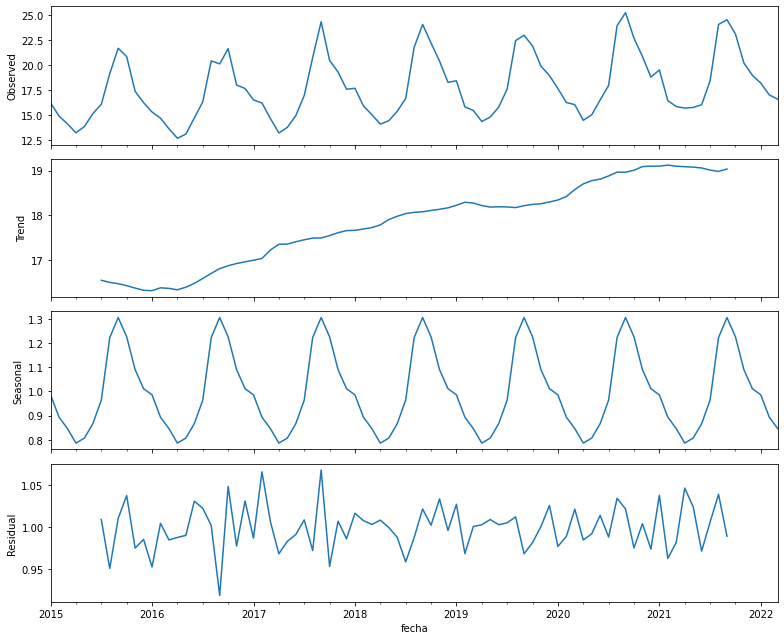

In [ ]:
#Descomposición estacional
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

decomposition = sm.tsa.seasonal_decompose(papa['rendimiento'], model='multiplicative')
fig = decomposition.plot()
plt.show()

In [ ]:
rcParams['figure.figsize'] = 6, 4

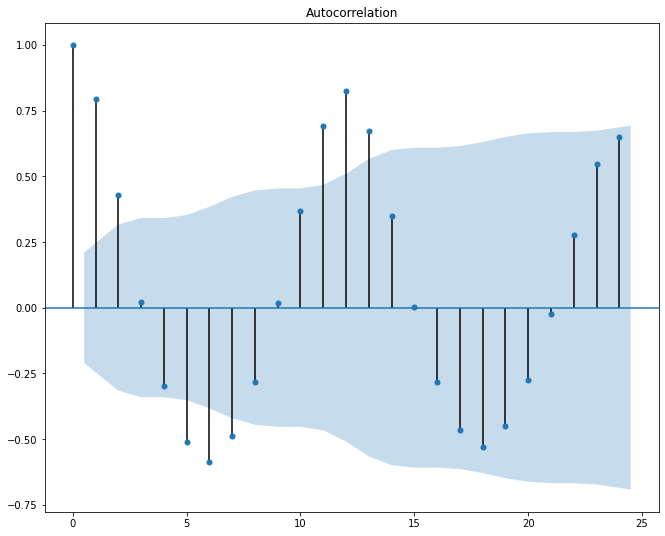

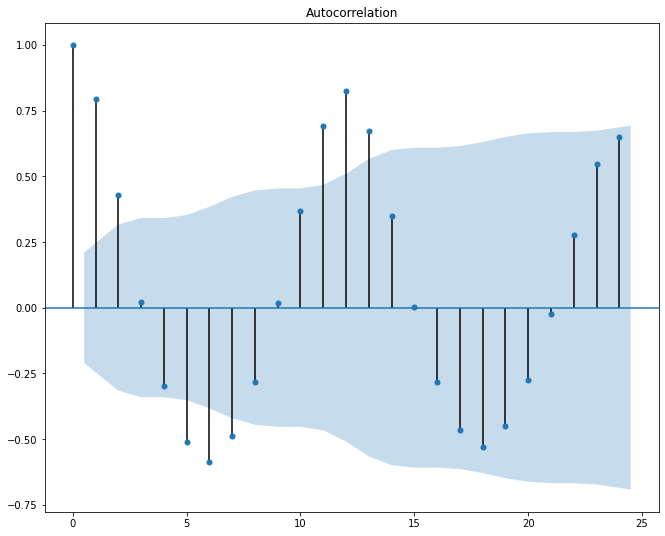

In [ ]:
#Función de autocorrelación para el rendimiento
from statsmodels.graphics.tsaplots import plot_acf 
plot_acf(papa['rendimiento'], lags=24, alpha=0.05)

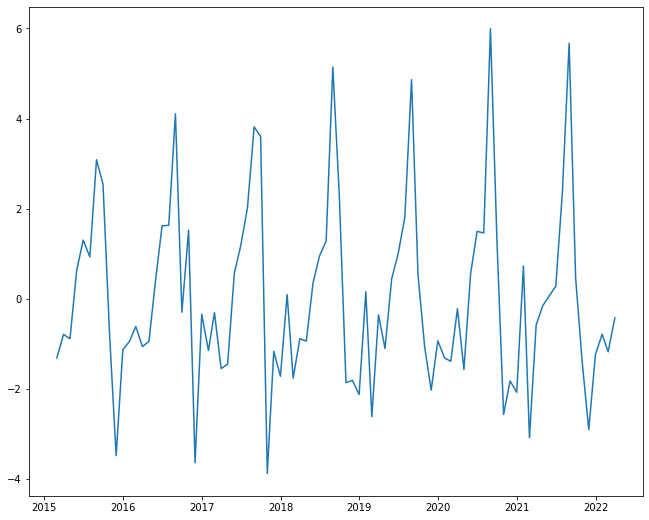

In [ ]:
#Ajustamos el rendimiento en para eliminar su estacionalidad
rend_ajustado = papa['rendimiento'].diff()
rend_ajustado.dropna(inplace=True)
plt.plot(rend_ajustado)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
test_adfuller = adfuller(rend_ajustado)
print("The p-value for the ADF test is ", test_adfuller[1])

The p-value for the ADF test is  0.0006896029539006388


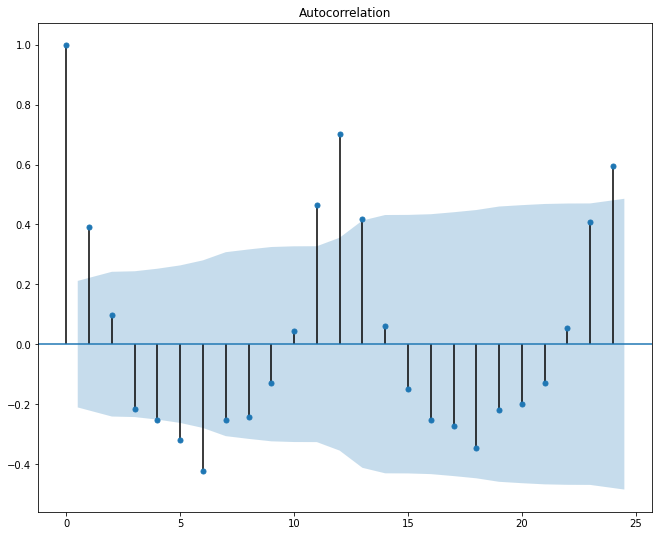

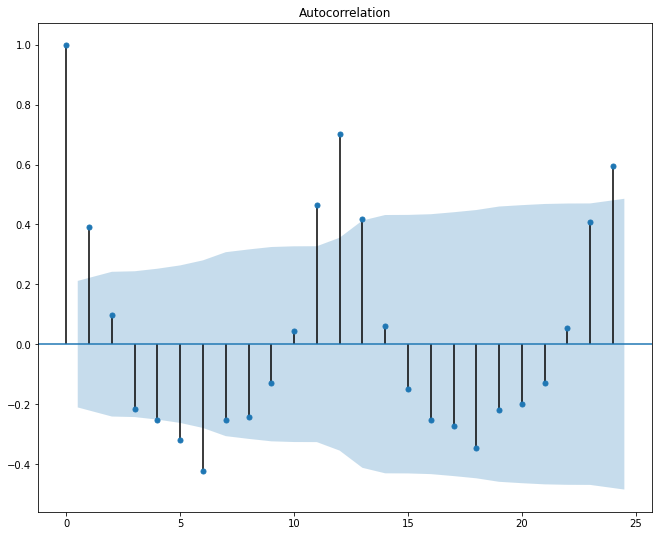

In [ ]:
#Función de autocorrelación para el rendimiento con retraso 
from statsmodels.graphics.tsaplots import plot_acf 
plot_acf(rend_ajustado, lags=24, alpha=0.05)

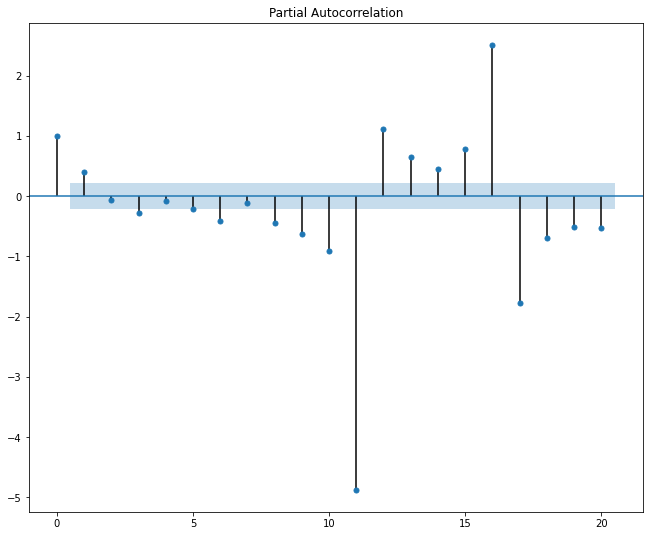

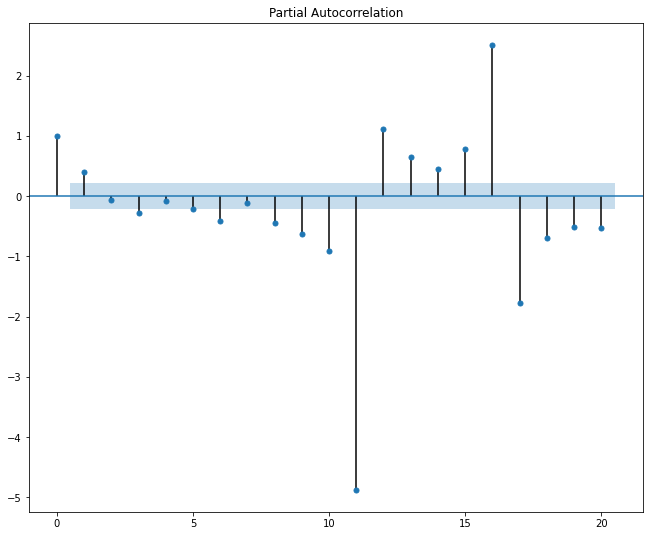

In [ ]:
#Función de autocorrelación parcial para el rendimiento
from statsmodels.graphics.tsaplots import plot_pacf 
plot_pacf(rend_ajustado, lags=20, alpha=0.05)

Hipótesis 1: Modelo considerando el efecto de la guerra

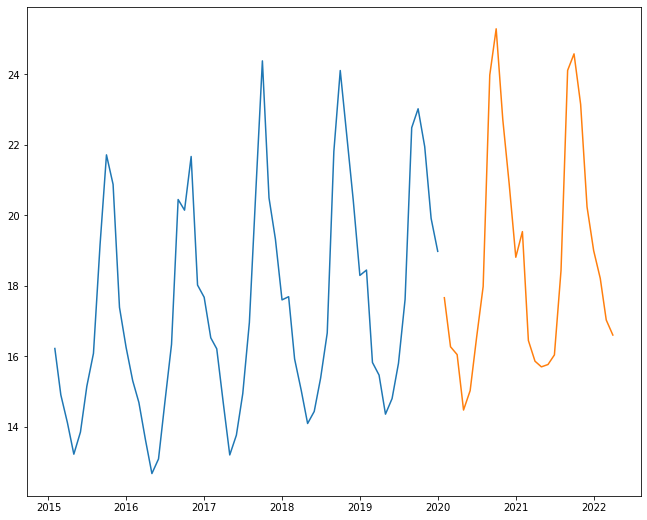

In [ ]:
#Dividimos en test de entrenamiento y validación
train, test = train_test_split(papa['rendimiento'], shuffle=False, test_size=0.3)
plt.plot(train)
plt.plot(test)

In [ ]:
#Aplicamos AUTO ARIMA
arima_model = auto_arima(train, start_p=0, d=1, start_q=0, max_p=12, max_d=4, max_q=4, start_P=0, D=1, start_Q=0, max_P=4, max_D=4,max_Q=4, m=12, seasonal=True, error_action='warn', trace=True, supress_warnings=True, stepwise=True,random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=165.791, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=132.058, Time=0.63 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=122.724, Time=0.63 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=134.447, Time=0.28 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=2.16 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=inf, Time=nan sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=127.924, Time=0.49 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=nan sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=1.35 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=123.052, Time=0.47 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=123.543, Time=0.28 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=127.797, Time=0.19 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=123.531, Time=0.68 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.60 sec

Best model:  ARIMA(0,1,1)(0,1,1)[12]          
Total f

In [ ]:
best_model = SARIMAX(papa['rendimiento'], order=(0, 1, 1), seasonal_order=(0, 1, 1, 12)).fit(dis=-1)
print(best_model.summary())

                                 Statespace Model Results                                 
Dep. Variable:                        rendimiento   No. Observations:                   87
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 -85.047
Date:                            Wed, 11 May 2022   AIC                            176.094
Time:                                    04:36:08   BIC                            183.006
Sample:                                01-31-2015   HQIC                           178.851
                                     - 03-31-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8379      0.067    -12.579      0.000      -0.968      -0.707
ma.S.L12      -0.6669      0.130   

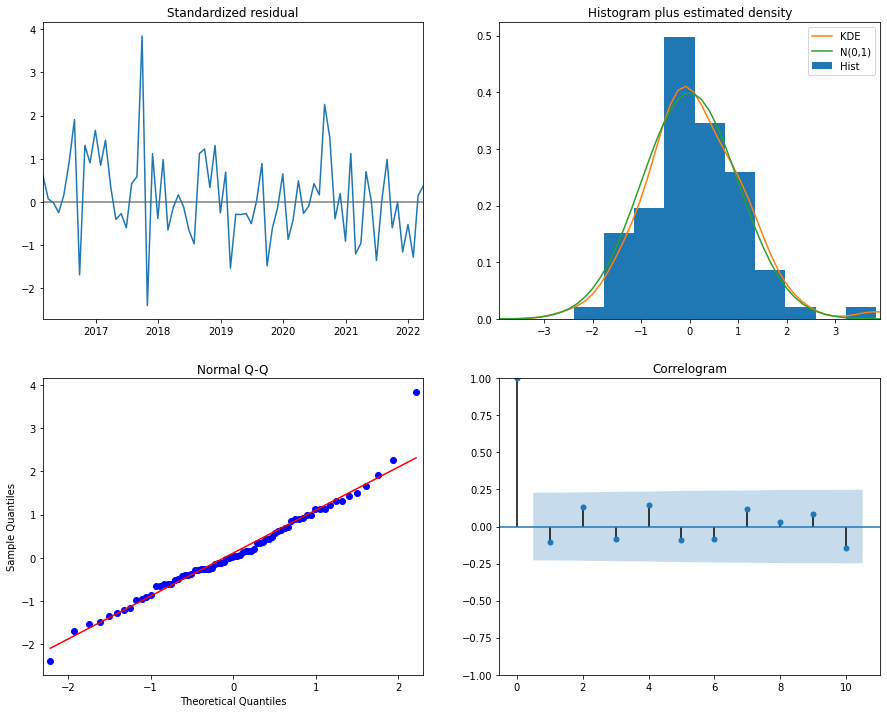

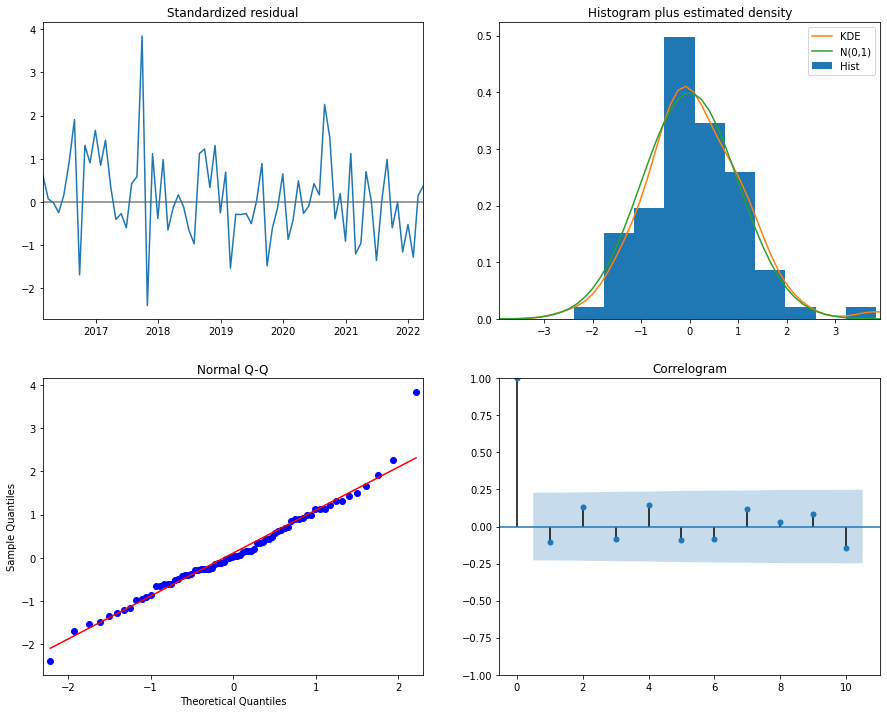

In [ ]:
#Gráfico de residuos
best_model.plot_diagnostics(figsize=(15,12))

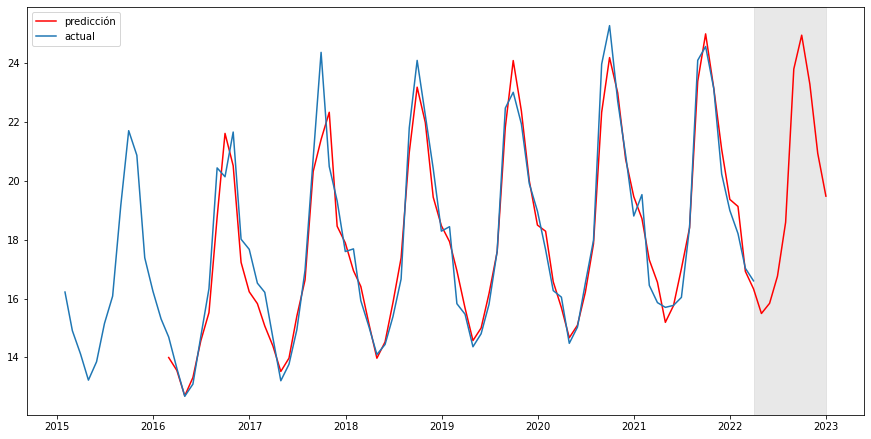

In [ ]:
papa['arima_model'] = best_model.fittedvalues
papa['arima_model'][:s+d] = np.NaN
forecast = best_model.predict(start=papa.shape[0], end=papa.shape[0] + 8)
forecast = papa['arima_model'].append(forecast)
plt.figure(figsize=(15, 7.5))
plt.plot(forecast, color='r', label='predicción')
plt.axvspan(papa.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
plt.plot(papa['rendimiento'], label='actual')
plt.legend()
plt.show()

In [ ]:
pred_guerra = best_model.predict(start='2022-04-30', end='2022-12-31' )
print(pred_guerra)

2022-04-30    15.490899
2022-05-31    15.836905
2022-06-30    16.761533
2022-07-31    18.594223
2022-08-31    23.804035
2022-09-30    24.956081
2022-10-31    23.291375
2022-11-30    20.936755
2022-12-31    19.481835
Freq: M, dtype: float64


Hipótesis 2: Sin considerar el efecto de la guerra

In [ ]:
rend_sin_guerra = papa['rendimiento'].drop(['2022-02-28','2022-03-31'])
rend_sin_guerra.tail()

fecha
2021-09-30    24.570688
2021-10-31    23.139309
2021-11-30    20.234521
2021-12-31    18.995753
2022-01-31    18.207584
Name: rendimiento, dtype: float64

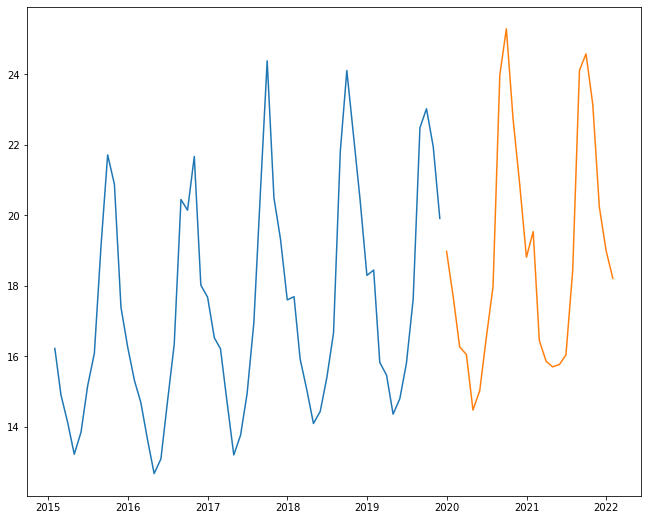

In [ ]:
#Dividimos en test de entrenamiento y validación
train, test = train_test_split(rend_sin_guerra, shuffle=False, test_size=0.3)
plt.plot(train)
plt.plot(test)

In [ ]:
#Aplicamos AUTO ARIMA
arima_model = auto_arima(train, start_p=0, d=1, start_q=0, max_p=12, max_d=4, max_q=4, start_P=0, D=1, start_Q=0, max_P=4, max_D=4,max_Q=4, m=12, seasonal=True, error_action='warn', trace=True, supress_warnings=True, stepwise=True,random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=162.559, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=129.803, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=121.045, Time=0.29 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=132.302, Time=0.09 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=1.10 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=inf, Time=nan sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=125.896, Time=0.29 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=nan sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.40 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=121.147, Time=0.33 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=121.709, Time=0.23 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=125.551, Time=0.18 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=121.799, Time=0.47 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=122.837, Time=1.01 sec

Best model:  ARIMA(0,1,1)(0,1,1)[12]          
Tot

In [ ]:
best_model = SARIMAX(rend_sin_guerra, order=(0, 1, 1), seasonal_order=(0, 1, 1, 12)).fit(dis=-1)
print(best_model.summary())

                                 Statespace Model Results                                 
Dep. Variable:                        rendimiento   No. Observations:                   85
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 -83.750
Date:                            Wed, 11 May 2022   AIC                            173.499
Time:                                    04:37:23   BIC                            180.329
Sample:                                01-31-2015   HQIC                           176.218
                                     - 01-31-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8253      0.068    -12.135      0.000      -0.959      -0.692
ma.S.L12      -0.6492      0.134   

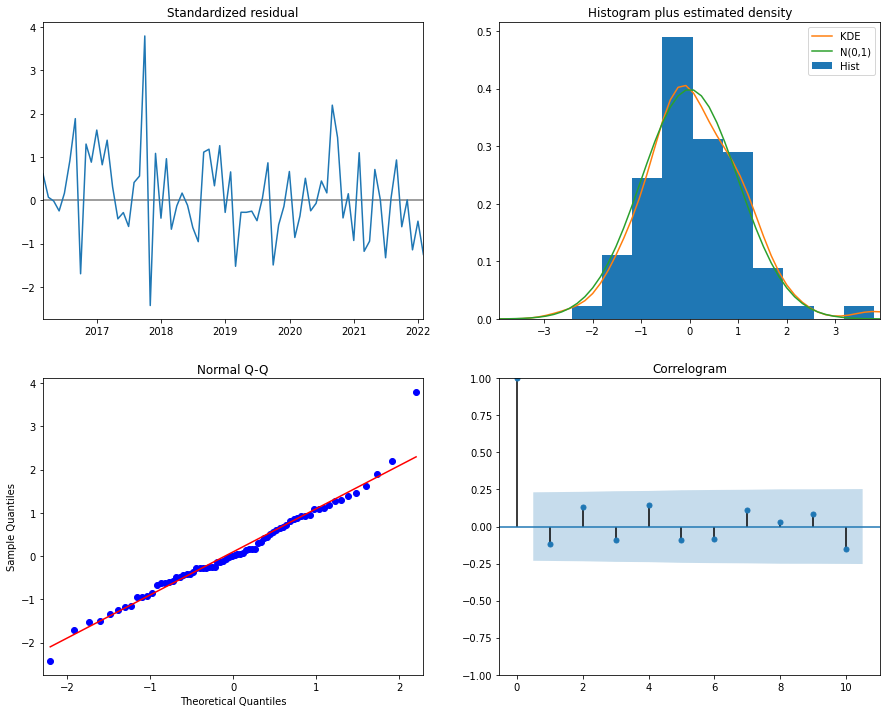

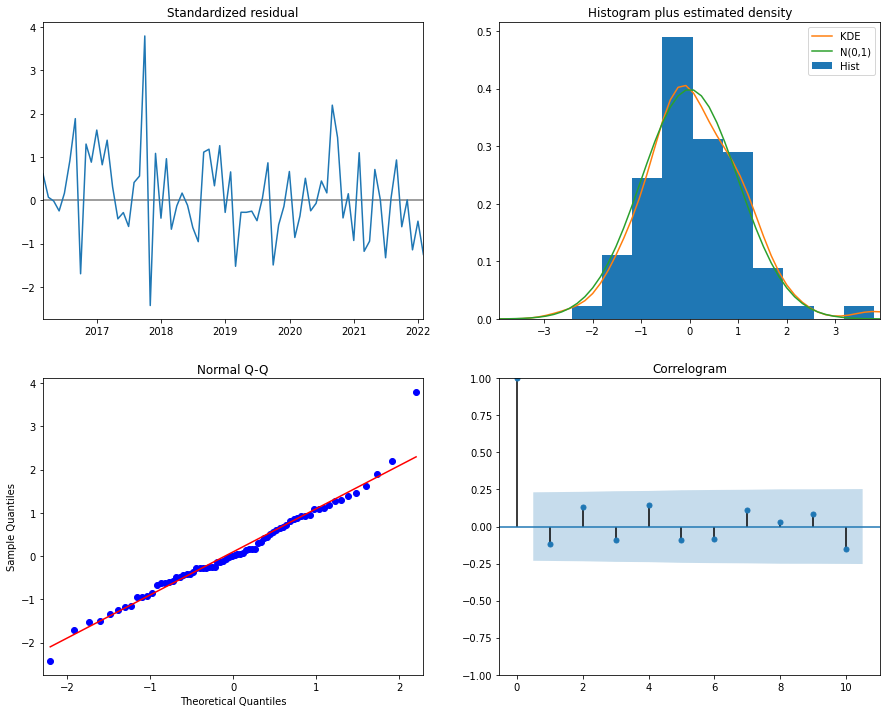

In [ ]:
#Gráfico de residuos
best_model.plot_diagnostics(figsize=(15,12))

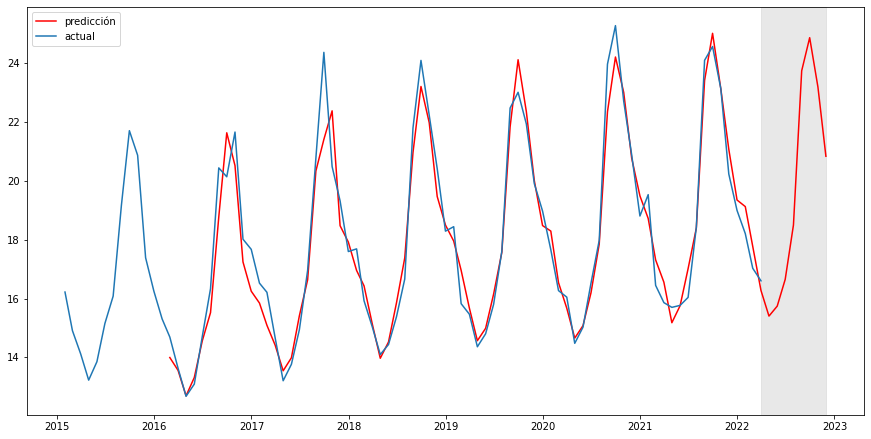

In [ ]:
rend_sin_guerra['arima_model'] = best_model.fittedvalues
rend_sin_guerra['arima_model'][:s+d] = np.NaN
forecast = best_model.predict(start=rend_sin_guerra.shape[0], end=rend_sin_guerra.shape[0] + 8)
forecast = rend_sin_guerra['arima_model'].append(forecast)
plt.figure(figsize=(15, 7.5))
plt.plot(forecast, color='r', label='predicción')
plt.axvspan(papa.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
plt.plot(papa['rendimiento'], label='actual')
plt.legend()
plt.show()

In [ ]:
#Impacto real en el rendimiento
pred_sin_guerra_feb_mar = best_model.predict(start='2022-02-28', end='2022-03-31' )
pred_sin_guerra_feb_mar =pd.DataFrame(pred_sin_guerra_feb_mar, columns=['Rendimiento Estimado sin guerra'])
pred_sin_guerra = best_model.predict(start='2022-04-30', end='2022-12-31' )
feb_mar = pd.DataFrame({'Rendimiento Real':[17.0286, 16.6017]}, index=['2022-02-28','2022-03-31'])
feb_mar.index = pd.to_datetime(feb_mar.index)
tabla = pd.concat([feb_mar,pred_sin_guerra_feb_mar], axis=1)
tabla['diferencia'] =  tabla['Rendimiento Real'] - tabla['Rendimiento Estimado sin guerra']
print(tabla)

            Rendimiento Real  Rendimiento Estimado sin guerra  diferencia
2022-02-28           17.0286                        16.871907    0.156693
2022-03-31           16.6017                        16.272554    0.329146


In [ ]:
tabla.to_excel('Impacto real en el rendimiento de la papa.xlsx')
print('File successfully exported into Excel File')

File successfully exported into Excel File


In [ ]:
#Impacto potencial en el rendimiento
tabla = pd.concat([pred_guerra, pred_sin_guerra], axis=1)
tabla.columns = ['Con guerra', 'Sin guerra']
tabla['diferencia'] = tabla['Con guerra'] - tabla['Sin guerra']
print(tabla)

            Con guerra  Sin guerra  diferencia
2022-04-30   15.490899   15.402786    0.088112
2022-05-31   15.836905   15.741888    0.095016
2022-06-30   16.761533   16.650780    0.110753
2022-07-31   18.594223   18.498629    0.095594
2022-08-31   23.804035   23.745828    0.058207
2022-09-30   24.956081   24.870866    0.085214
2022-10-31   23.291375   23.195121    0.096254
2022-11-30   20.936755   20.838398    0.098358
2022-12-31   19.481835   19.379696    0.102140


In [ ]:
tabla.to_excel('Impacto potencial en el rendimiento de la papa.xlsx')
print('File successfully exported into Excel File')

File successfully exported into Excel File
